# Dependencies and files

## Install dependencies

## Imports

In [1]:
import warnings
import scanpy as sc
import anndata as an
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

import time
from tqdm.notebook import tqdm
import requests

sc.settings.set_figure_params(dpi=80)
#sc.set_figure_params(facecolor="white", figsize=(8, 8))
warnings.simplefilter(action='ignore', category=FutureWarning)
sc.settings.verbosity = 3

# Global variables

In [2]:
de_dir_path = '../../data/DE/ANOVA_mean/'

In [3]:
layers = ['L1', 'L2', 'L3', 'L4', 'L5', "L6", 'WM']

In [4]:
cluster_color = ['red', 'yellow', 'orange', 'green', 'purple', 'blue', 'olive', 'pink', 'brown']

In [5]:
os.listdir(de_dir_path)

['anova_mamm_mean.csv',
 'cluster_spectr_anova_mean_6.csv',
 'cluster_spectr_anova_mean_7.csv',
 'cluster_spectr_anova_mean_8.csv',
 'cluster_spectr_anova_mean_9.csv',
 'ttest_mamm_mean.csv']

## Load files

### DE results

In [6]:
anova_res = pd.read_csv(de_dir_path + 'anova_mamm_mean.csv', index_col=0)
anova_genes = anova_res[anova_res.p_val_adj < 0.05].index
anova_res.head()

sum_sq    df         F    PR(>F)  p_val_adj
A1BG   0.122578  12.0  2.796490  0.003701   0.010364
AAAS   0.017527  12.0  0.944161  0.509517   0.596369
AACS   0.136394  12.0  2.729393  0.004508   0.012212
AADAT  0.057031  12.0  5.478881  0.000002   0.000016
AAGAB  0.043359  12.0  2.127609  0.026045   0.053640

In [7]:
n_clusters = 7
anova_labels = pd.read_csv(de_dir_path + f'cluster_spectr_anova_mean_{n_clusters}.csv', index_col=0)['0'].sort_values()
anova_labels = anova_labels
anova_labels.name = 'ANOVA_labels'

## Load normalized pseudobulks

In [8]:
pb_dir_path = 'results/'

In [9]:
os.listdir(pb_dir_path)

['.ipynb_checkpoints',
 'ancova_3df_res.pkl',
 'ancova_perm_res.pkl',
 'ancova_res.pkl',
 'celltypes.csv',
 'chimp_clusters_28.csv',
 'chimp_clusters_50.csv',
 'chimp_clusters_77.csv',
 'chimp_clusters_ancova.csv',
 'clusters0.01',
 'clusters0.05',
 'colors.csv',
 'constypes.csv',
 'gene_selection_df.csv',
 'hs_anova_inter_clusters.csv',
 'hs_layers.csv',
 'hs_prof.csv',
 'hs_prof_anova.csv',
 'hs_ttest_inter_clusters.csv',
 'human_clusters_28.csv',
 'human_clusters_50.csv',
 'human_clusters_67.csv',
 'human_clusters_77.csv',
 'human_clusters_ancova.csv',
 'human_clusters_ancova_01_cos_all_10.csv',
 'human_clusters_ancova_01_cos_all_6.csv',
 'human_clusters_ancova_01_cos_all_7.csv',
 'human_clusters_ancova_01_cos_all_8.csv',
 'human_clusters_ancova_05_cos_all_10.csv',
 'human_clusters_ancova_05_cos_all_15.csv',
 'human_clusters_ancova_05_nn_all_12.csv',
 'human_clusters_ancova_05_nn_all_13.csv',
 'human_clusters_ancova_05_nn_all_15.csv',
 'human_clusters_ancova_cosall7.csv',
 'human_cl

In [10]:
adata_pb_norm = sc.read_h5ad(pb_dir_path + 'pb_mammals_samplenorm_mean_filtered.h5ad')
#adata_pb_norm_mean.var = anova_res
adata_pb_norm

AnnData object with n_obs × n_vars = 89 × 5390
    obs: 'layer', 'sample_id', 'psbulk_n_cells', 'psbulk_counts', 'condition', 'lib_size', 'log_lib_size'
    var: 'feature_types', 'mt', 'hb', 'ribo'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'psbulk_props'

In [11]:
background_genes = adata_pb_norm.var_names.tolist()
len(background_genes)

5390

## Specie-specific genes

In [12]:
model_res = pd.read_csv('results/gene_selection_df.csv', index_col=0)
model_res.head()

human     chimp   macaque
AACS   0.001206  0.014287  0.318736
AAGAB  0.731575  0.661344  0.024143
AAK1   0.000658  0.699175  0.069657
AAMP   0.762617  0.530339  0.947528
AAR2   0.312623  0.436571  0.343371

In [13]:
import pickle
with open("results/ancova_perm_res.pkl", "rb") as file:
    ancova_results = pickle.load(file)

In [14]:
# import pickle
# with open("./results/specie_specific_genes_tr50.pkl", "rb") as file:
#     genes_dict77 = pickle.load(file)

In [15]:
sign_genes = {key:value[value['p-value'] < 0.01].index for key, value in ancova_results.items()}
sign_genes

{'human-chimp': Index(['ABI2', 'ABLIM3', 'ACTN2', 'ADAM15', 'ADGRB2', 'ADGRL1', 'AK1', 'AKT3',
        'ALCAM', 'ALKBH5',
        ...
        'WDR7', 'WLS', 'YES1', 'YWHAE', 'ZBTB17', 'ZBTB18', 'ZBTB46', 'ZCCHC17',
        'ZMYND8', 'ZNF706'],
       dtype='object', length=322),
 'human-macaque': Index(['AAGAB', 'AARS1', 'AATK', 'ABAT', 'ABCD4', 'ABHD10', 'ABHD6', 'ABHD8',
        'ABLIM3', 'ABT1',
        ...
        'ZNF140', 'ZNF184', 'ZNF189', 'ZNF304', 'ZNF511', 'ZNF536', 'ZNF592',
        'ZNF703', 'ZNF706', 'ZNFX1'],
       dtype='object', length=1355),
 'chimp-macaque': Index(['AATK', 'ABAT', 'ABCC10', 'ABCD4', 'ABHD10', 'ABLIM3', 'ACAD9',
        'ACADVL', 'ACO1', 'ACOT7',
        ...
        'ZC2HC1A', 'ZDHHC22', 'ZDHHC8', 'ZDHHC9', 'ZNF140', 'ZNF184', 'ZNF189',
        'ZNF536', 'ZNF655', 'ZNF703'],
       dtype='object', length=874)}

Попробуем определить человеко-специфичные гены как $(HC\bigcap HM)\setminus CM$

In [16]:
hs_genes = sign_genes['human-chimp'].intersection(sign_genes['human-macaque']).difference(sign_genes['chimp-macaque'])
hs_genes, hs_genes.size

(Index(['ADAM15', 'AKT3', 'ALCAM', 'AMFR', 'APLP2', 'ASAH1', 'ASAP2', 'ATAD1',
        'BLVRA', 'CADM3', 'CCSER2', 'CD99L2', 'CNKSR2', 'COTL1', 'CPNE2',
        'CPNE6', 'DAAM1', 'DCLK1', 'DKK3', 'DLC1', 'DNM2', 'DNPEP', 'DPYSL5',
        'DYNLL2', 'EEF1G', 'EIF1B', 'EIF3F', 'EIF4G3', 'ELOC', 'ENC1',
        'EPB41L3', 'ETFB', 'FADS2', 'FAM171B', 'FBXO9', 'FGF9', 'FOXP1', 'GDE1',
        'GNAZ', 'GNPTAB', 'GRM3', 'ID2', 'IGFBP2', 'IGFBP6', 'IGSF21', 'JAM2',
        'KHDRBS3', 'KIF21B', 'KLF6', 'KRT222', 'LINGO1', 'LPL', 'MARCKS',
        'MAU2', 'NCAM2', 'NOL10', 'NRXN1', 'NRXN2', 'OCIAD2', 'OTUD4', 'PCDH9',
        'PCGF2', 'PCP4', 'PDE1A', 'PES1', 'PHACTR3', 'PPP2R2C', 'PTPRK',
        'RAB10', 'RAB3GAP1', 'RALYL', 'RBM23', 'RNF40', 'RSPH9', 'SCD5',
        'SCN3B', 'SEZ6L2', 'SIAH1', 'SLC17A7', 'SLC25A29', 'SLC38A10',
        'SLC38A3', 'SLC39A10', 'SLC9A3R2', 'SMARCA1', 'SND1', 'SNRPD2', 'STAU2',
        'SYNGAP1', 'TECR', 'TMED3', 'TMEM108', 'TMOD1', 'USP6NL', 'VAT1L',
        'WD

## Helpful functions

In [17]:
def p_val_group(value):
    if value >= 0.05:
        return 'No significance'
    elif  0.01 <= value < 0.05:
        return 'p < 0.05'
    elif  0.001 <= value < 0.01:
        return 'p < 0.01'
    else:
        return 'p < 0.001'

In [18]:
color_discrete_map = {'No significance': 'darkblue',
                      'p < 0.05': 'purple',
                      'p < 0.01': 'darkorange',
                      'p < 0.001': 'yellow'}

In [19]:
class GeneCluster:
    def __init__(self, genes, descr, label, background_genes, **kwargs):
        self.label = label
        self.genes = genes
        self.descr = descr
        self.background_genes = background_genes
        self.userlist_id = self._get_userlist_id()
        self.background_id = self._get_background_id()
        self.enrichment_res = dict()

    
    def _get_userlist_id(self):
        base_url = "https://maayanlab.cloud/speedrichr"

        description = "sample gene set with background"

        res = requests.post(
            base_url+'/api/addList',
            files=dict(
              list=(None, '\n'.join(self.genes)),
              description=(None, description),
            )
          )
        if res.ok:
            userlist_response = res.json()
        else:
            raise Exception('Error analyzing gene list')
        return userlist_response['userListId']
    
    def _get_background_id(self):
        base_url = "https://maayanlab.cloud/speedrichr"

        res = requests.post(
            base_url+'/api/addbackground',
            data=dict(background='\n'.join(self.background_genes))
        )

        if res.ok:
            background_response = res.json()
        else:
            raise Exception('Error analyzing gene list')
        return background_response['backgroundid']

    def enrich(self, gene_set_library):
        # get enrichment results
        base_url = "https://maayanlab.cloud/speedrichr"

        res = requests.post(
                base_url+'/api/backgroundenrich',
                data=dict(
                userListId=self.userlist_id,
                backgroundid=self.background_id,
                backgroundType=gene_set_library,
                )
            )
        if res.ok:
            data = res.json()
        else:
            raise Exception('Error analyzing gene list')
        # convert results to df
        columns = ['Rank', 'Term', 'p-val', 'Z-score', 'Combined score', 'Overlapping genes', 'Adjusted P-value', 'Old p-value', 'Old adjusted p-value']
        results = pd.DataFrame(data[gene_set_library], columns=columns)
        # preprocess df
        results.Term = results.Term.astype(str)
        results['num_overlap_genes'] = results['Overlapping genes'].apply(lambda x: len(x))
        results['neg_log10(p_adj)'] = - np.log10(results['Adjusted P-value'])
        results['cluster_label'] = self.label
        # save to enrichment_res
        self.enrichment_res[gene_set_library] = results

    @staticmethod
    def enrich_geneclusters(geneclusters, gene_set_library):
        for gc in geneclusters:
            gc.enrich(gene_set_library)

# Clusterisation

In [20]:
df = pd.DataFrame(adata_pb_norm.X, index=adata_pb_norm.obs_names, columns=adata_pb_norm.var_names)

In [21]:
sample_order = dict()
for cond in ['human', 'chimp', 'macaque']:
    samples = df.loc[df.index.str.contains(cond)].index
    order = sorted(samples.tolist(), key=lambda x: x[-2:])
    order_laminar = list(filter(lambda x: 'L' in x, order))
    order_wm = list(filter(lambda x: 'WM' in x, order))
    sample_order[cond] = order_wm + order_laminar
sample_order['all'] = sample_order['human'] + sample_order['chimp'] + sample_order['macaque']
df = df.loc[sample_order['all']]
df_hs = df[hs_genes].copy()

## Hierarchial

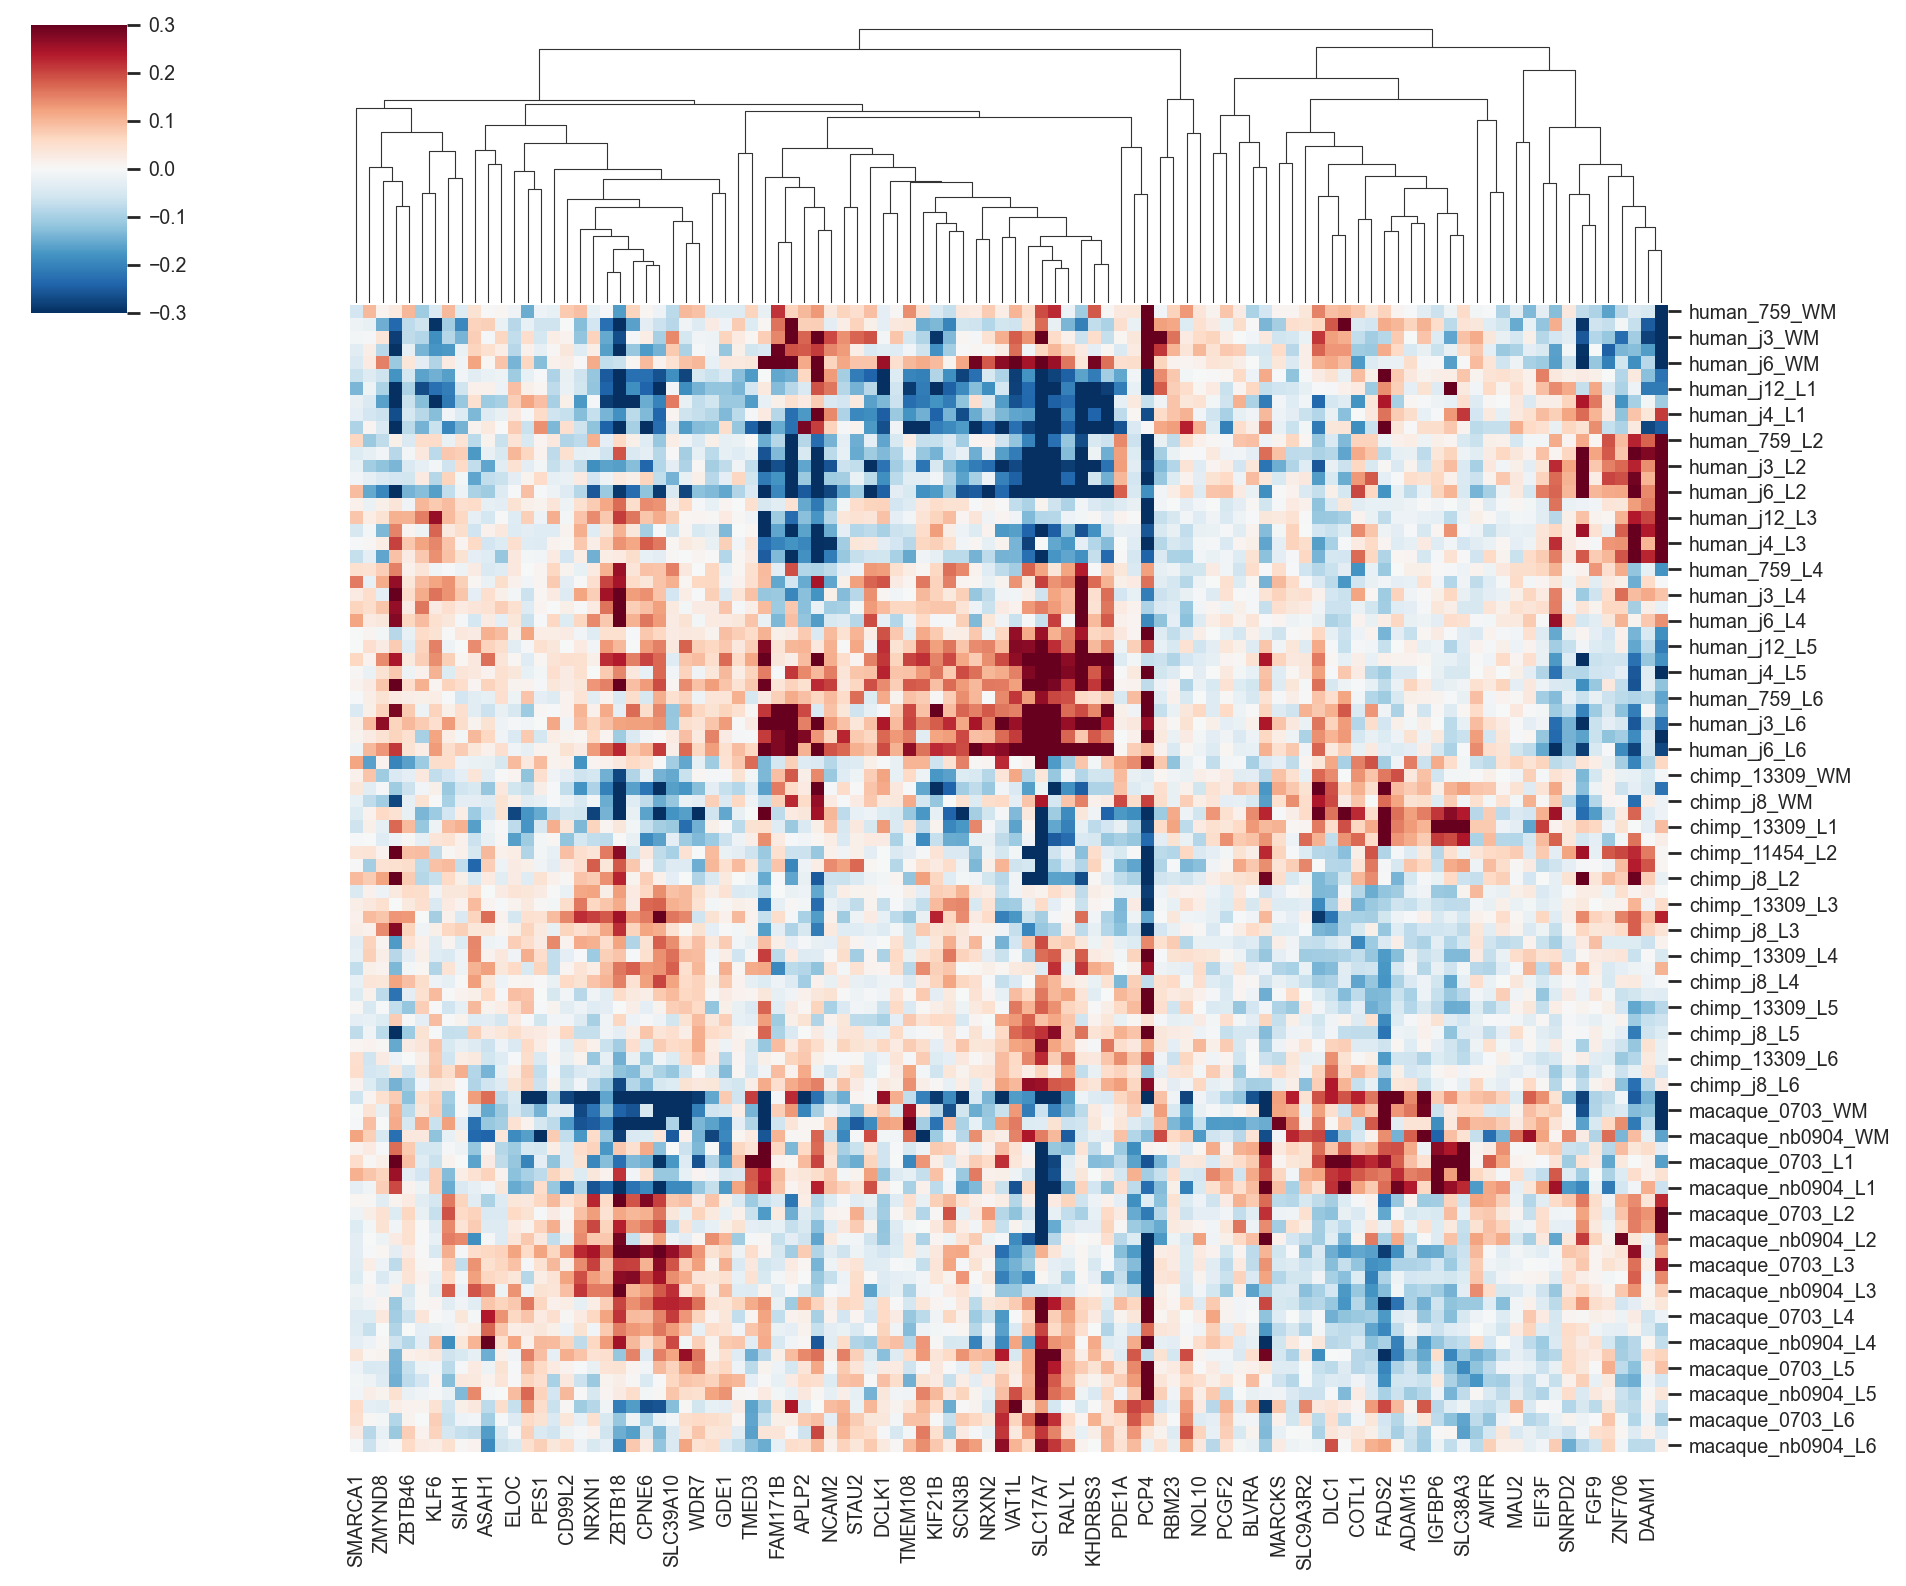

In [22]:
sns.set(font_scale=0.8)
sns.clustermap(df_hs, figsize=(12, 10), cmap="RdBu_r", center=0, vmax=0.3, vmin=-0.3, metric='cosine', annot_kws={"size": 2}, row_cluster=False)

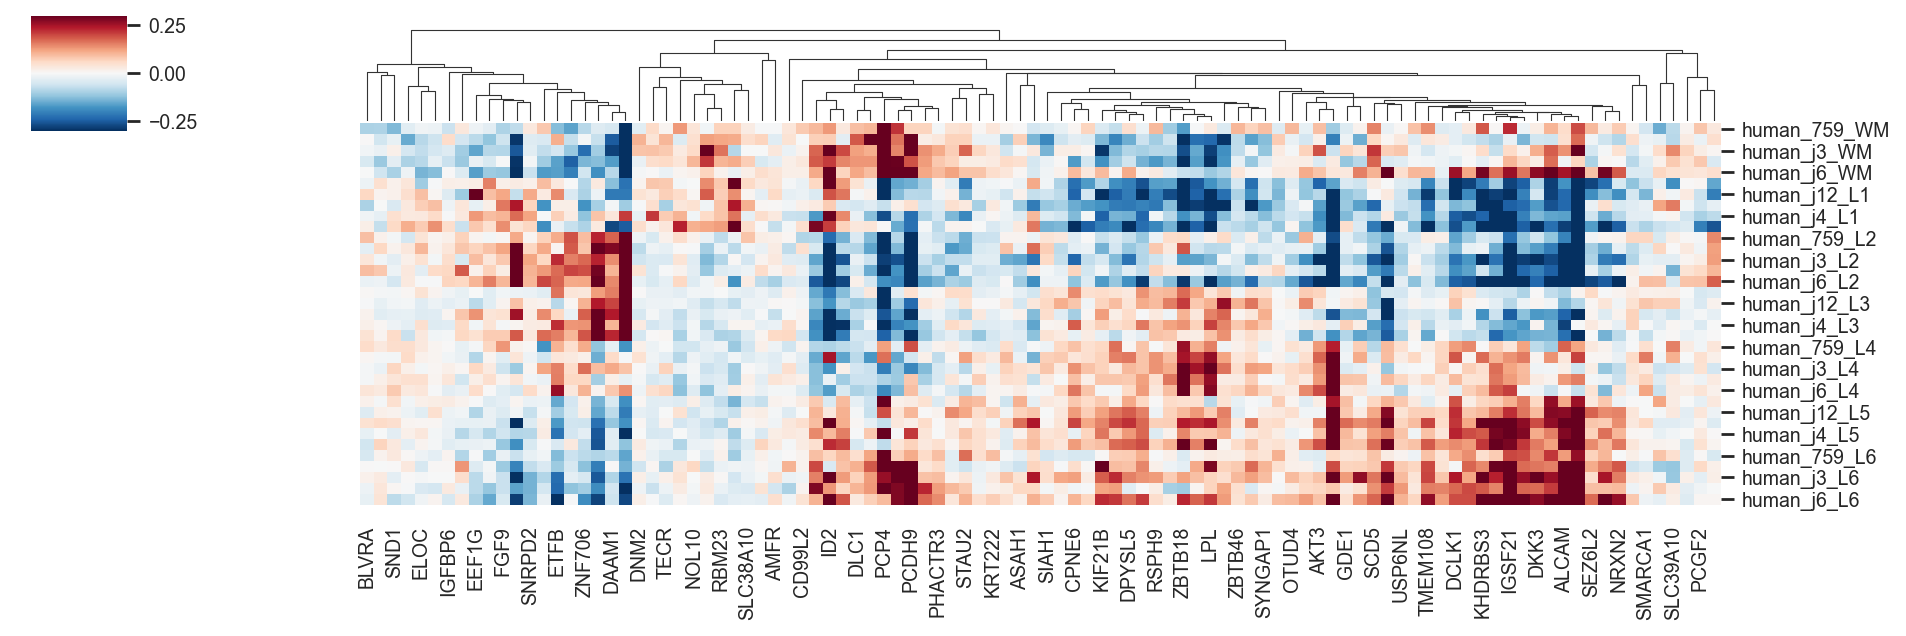

In [23]:
sns.clustermap(df_hs.loc[sample_order['human']], figsize=(12, 4), cmap="RdBu_r", center=0, vmax=0.3, vmin=-0.3, metric='cosine', annot_kws={"size": 2}, row_cluster=False)

## Spectral clusterisation

In [24]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics.pairwise import pairwise_kernels
aff_matrix = pairwise_kernels(df_hs.T, metric='cosine') + 1
n_clusters = 8
#clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=4)
clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=4)
clustering.fit(aff_matrix)
#clustering.fit(df_hs.T[sample_order['human']])
#clustering.fit(df_hs.T)

SpectralClustering(affinity='precomputed', random_state=4)

In [25]:
labels = pd.Series(clustering.labels_, index=hs_genes).sort_values()
order = labels.sort_values().index

In [26]:
labels.to_csv(f'./results/human_clusters_ancova_01_cos_all_{n_clusters}.csv')

In [27]:
cluster_color = ['red', 'yellow', 'orange', 'green', 'purple', 'blue', 'olive', 'pink', 'brown', 'cyan', 'pink', 'violet', 'crimson']

In [28]:
colors = cluster_color[:n_clusters]
clusters = np.arange(n_clusters)

[Text(0, 18.666666666666664, 'macaque'),
 Text(0, 45.333333333333336, 'chimp'),
 Text(0, 77.33333333333333, 'human')]

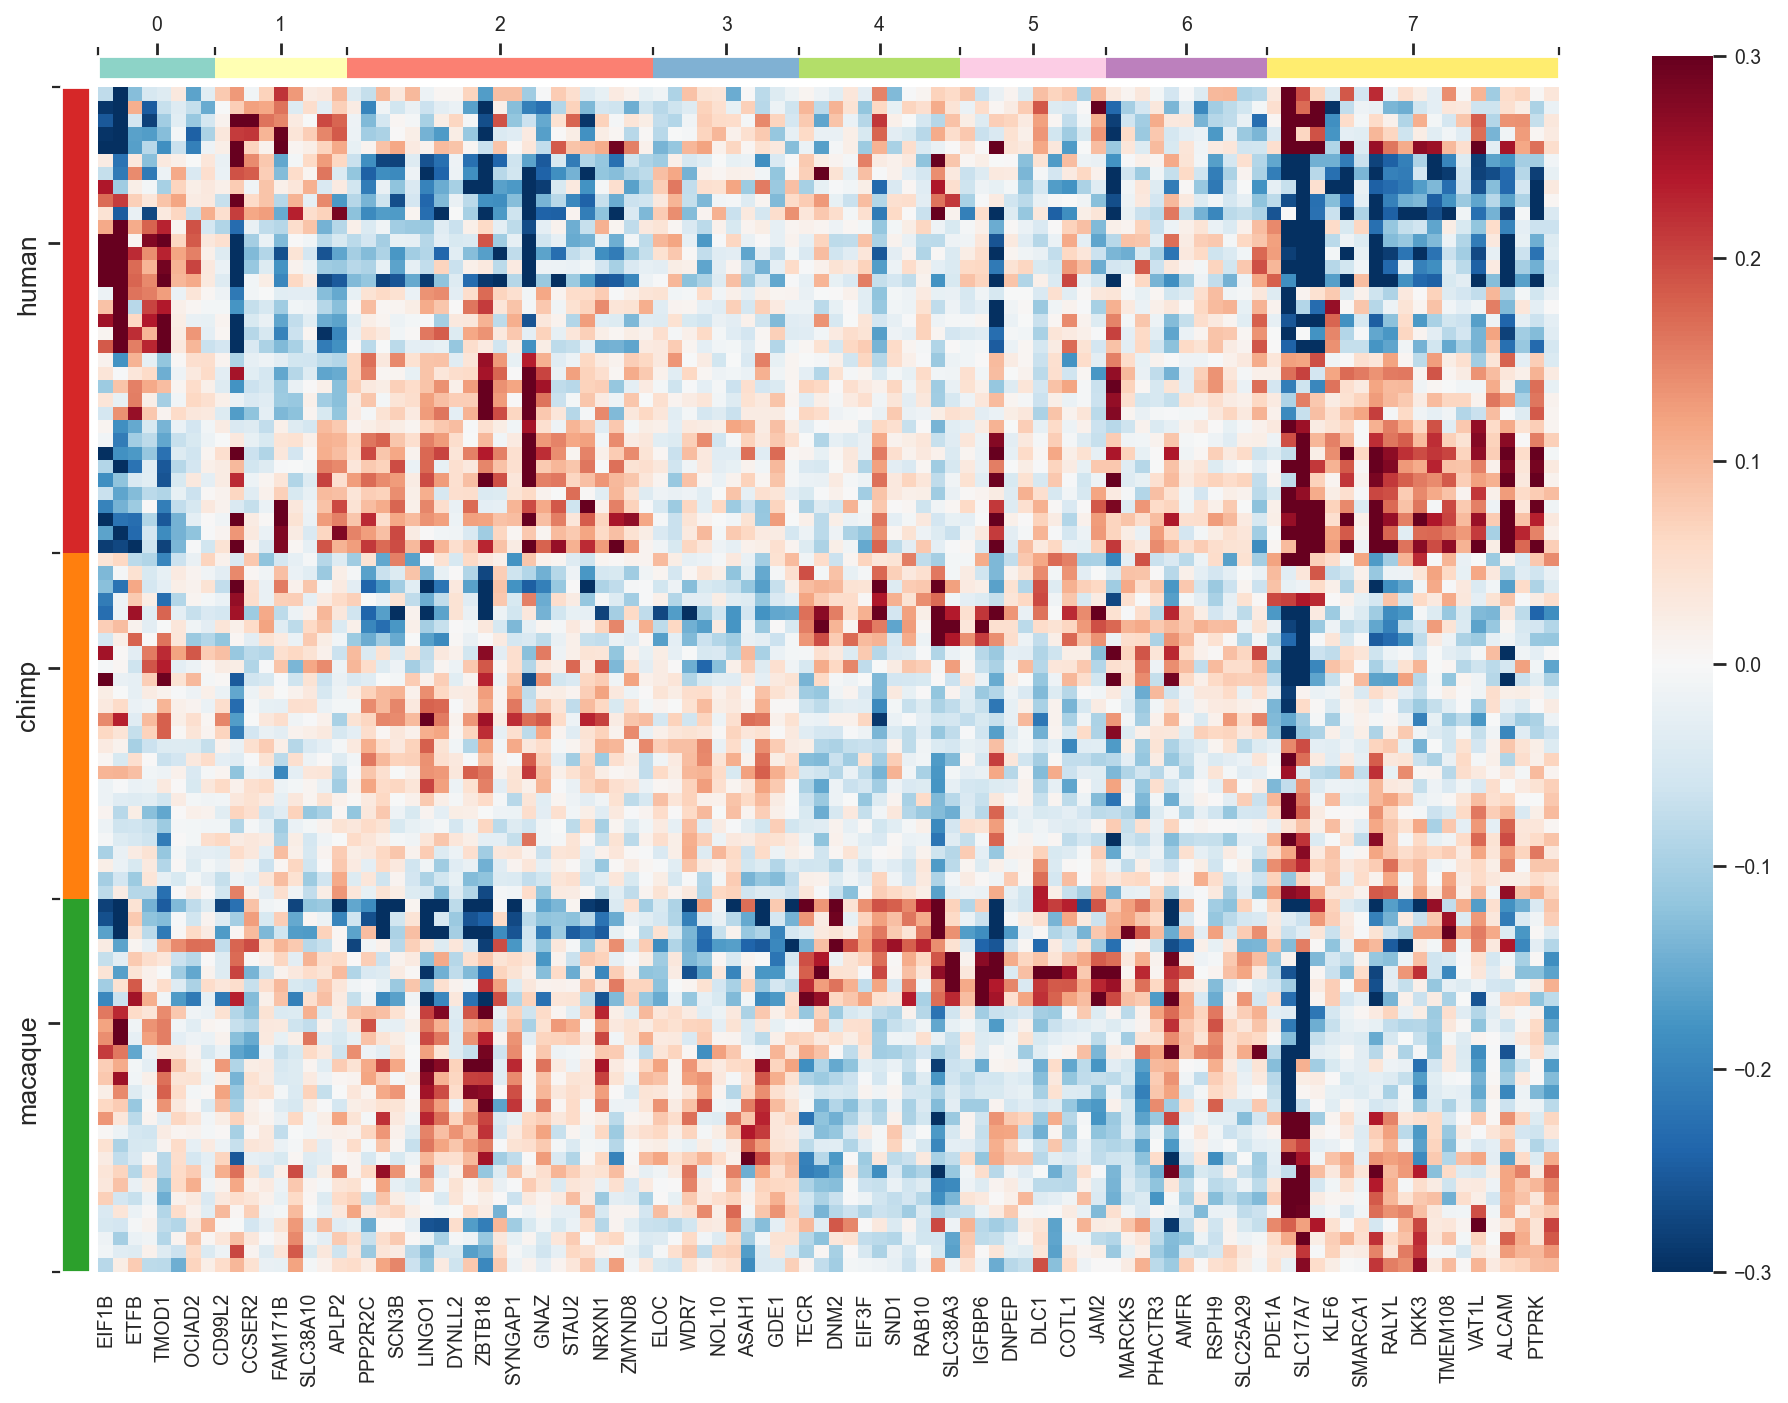

In [29]:
from matplotlib.patches import bbox_artist
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import ticker

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_hs[order], ax=ax, cmap="RdBu_r", vmax=0.3, vmin=-0.3, center=0, cbar=True)
#ax.set_xticks([])
ax.set_yticks([])


divider = make_axes_locatable(ax)
cax = divider.append_axes('top', size='2%', pad=0.05)
cmap = plt.get_cmap('Set3')

cluster_size = labels.value_counts().loc[clusters].values
cluster_pos = cluster_size.cumsum()
bounds = [0] + list(cluster_pos)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
fig.colorbar(
    mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
    cax=cax,
    ticks=bounds,
    orientation='horizontal',
    spacing='proportional'
)
cax.xaxis.set_major_locator(ticker.FixedLocator(cluster_pos - cluster_size / 2))
cax.xaxis.set_major_formatter(ticker.FixedFormatter(clusters))
cax.xaxis.tick_top()

# horisontal
cax = divider.append_axes('left', size='2%', pad=0.05)

cmap = mpl.colors.ListedColormap(['tab:red', 'tab:orange', 'tab:green'][::-1])
cond_size = adata_pb_norm.obs.condition.value_counts().loc[['human', 'chimp', 'macaque'][::-1]].values
cond_pos = cond_size.cumsum()
bounds = [0] + list(cond_pos)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig.colorbar(
    mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
    cax=cax,
    ticks=bounds,
    orientation='vertical',
    spacing='proportional'
)

cax.yaxis.set_major_locator(ticker.FixedLocator(cond_pos - cond_size / 3))
cax.yaxis.set_major_formatter(ticker.FixedFormatter(['human', 'chimp', 'macaque'][::-1]))
cax.yaxis.tick_left()
cax.set_yticklabels(cax.get_yticklabels(), rotation=90, fontsize=12)

## Cluster profiles

In [30]:
df_annotation = df_hs.copy()
df_annotation['layer'] = adata_pb_norm.obs.layer
df_annotation['condition'] = adata_pb_norm.obs.condition

In [31]:
layer_mean = df_annotation.groupby(['condition', 'layer']).mean()
layer_mean.head()

ADAM15      AKT3     ALCAM      AMFR     APLP2     ASAH1  \
condition layer                                                               
chimp     L1     0.120247 -0.012988  0.009130  0.083703 -0.006447 -0.031851   
          L2    -0.003475 -0.013202 -0.242804  0.070298 -0.034986  0.066117   
          L3    -0.044347  0.004795 -0.066325 -0.016274 -0.042810  0.052351   
          L4    -0.039034 -0.005160  0.006249 -0.060398 -0.058964  0.038820   
          L5    -0.052907 -0.032334  0.134409 -0.049253  0.015875  0.015541   

                    ASAP2     ATAD1     BLVRA     CADM3  ...     TMED3  \
condition layer                                          ...             
chimp     L1    -0.038598 -0.050247  0.120435 -0.017511  ...  0.020563   
          L2    -0.045958  0.049210  0.051300  0.012095  ... -0.013718   
          L3     0.015554  0.006307 -0.002456  0.063143  ... -0.001658   
          L4    -0.018668  0.008142 -0.034010  0.033154  ...  0.015202   
          L5     0.026730 -0.006081 -0.038976  0.012888  ... -0.015029   

                  TMEM108     TMOD1    USP6NL     VAT1L      WDR7    ZBTB18  \
condition layer                                                               
chimp     L1    -0.029963  0.111496 -0.062848 -0.134595 -0.191448 -0.154330   
          L2    -0.048334  0.251171 -0.040401 -0.027984 -0.079114  0.229193   
          L3    -0.046289  0.118402 -0.022866 -0.090556  0.021327  0.178206   
          L4    -0.052551 -0.023878  0.035887 -0.019777  0.088189  0.129230   
          L5     0.007268 -0.132953  0.032619  0.138460  0.082006  0.023022   

                   ZBTB46    ZMYND8    ZNF706  
condition layer                                
chimp     L1     0.026107 -0.001521  0.020416  
          L2     0.072883  0.059591  0.121583  
          L3     0.070541  0.063579  0.067006  
          L4     0.024286  0.019230 -0.001815  
          L5    -0.064324 -0.050828 -0.035676  

[5 rows x 100 columns]

In [32]:
# fig, axes = plt.subplots(2, 2,  figsize=(14, 3.5 * 2), gridspec_kw={'hspace': 0.4})
# for gene, ax in zip(layer_mean.columns, axes.flatten()):
#     (
#             layer_mean[gene]
#             .reorder_levels(['layer', 'condition'])
#             .unstack().loc[layers]
#             .plot
#             .line(color={'human': 'tab:red', 'chimp': 'tab:orange', 'macaque': 'tab:green'}, ax=ax, marker='.')
#     )
#     ax.grid(False)

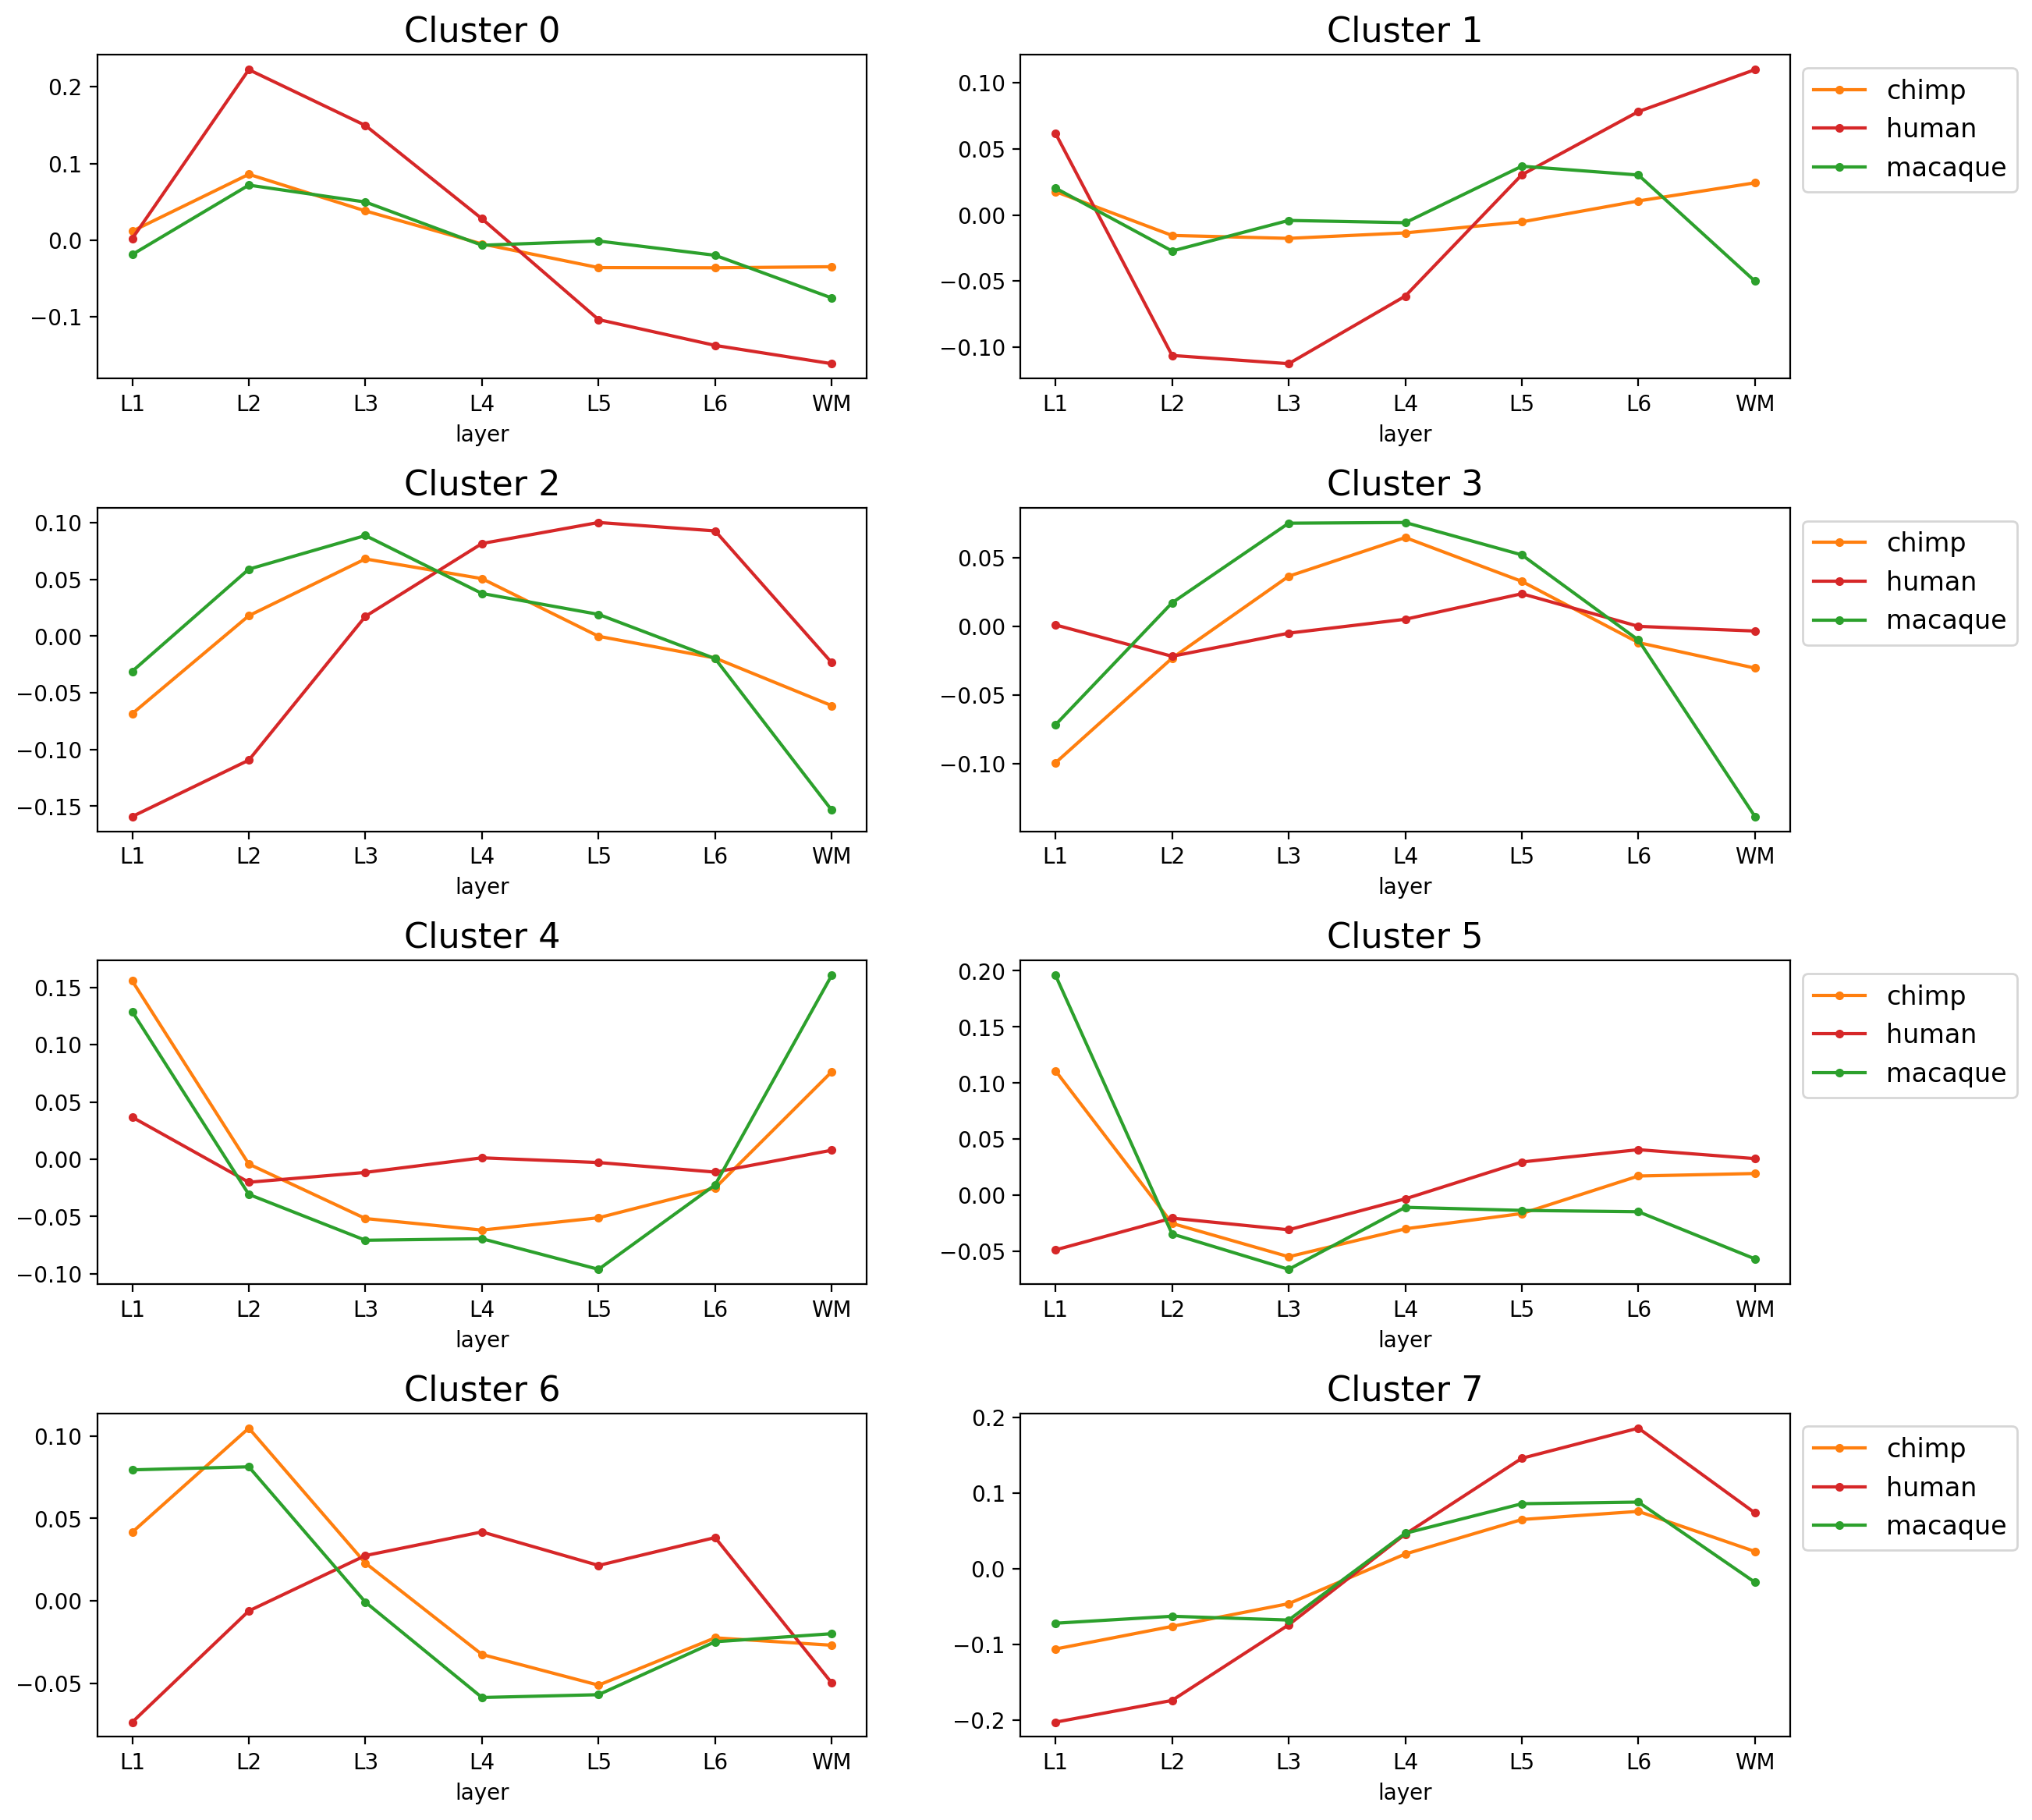

In [33]:
mpl.rcdefaults()
fig, axes = plt.subplots((n_clusters + 1) // 2, 2,  figsize=(14, 3.5 * n_clusters // 2), gridspec_kw={'hspace': 0.4})
for label, ax in zip(labels.unique(), axes.flatten()):
    genes = labels[labels == label].index.tolist()

    (
        layer_mean[genes]
        .mean(axis=1)
        .reorder_levels(['layer', 'condition'])
        .unstack().loc[layers]
        .plot
        .line(color={'human': 'tab:red', 'chimp': 'tab:orange', 'macaque': 'tab:green'}, ax=ax, marker='.')
    )
    
    ax.legend(fontsize=10, loc="upper left", bbox_to_anchor=(1, 1), prop={"size":12})
    if label % 2 == 0:
        ax.get_legend().remove()
    ax.set_title(f'Cluster {label}', fontsize=16)
    ax.grid(False)
    #ax.hlines(0, xmin=0, xmax=6, colors='gray', linestyles='dashed')

In [34]:
grid = np.linspace(1, 7, 400)
conditions = ['human', 'chimp', 'macaque']
cond_colors = ['tab:red', 'tab:orange', 'tab:green']

In [35]:
df_cont = df_annotation.copy()
df_cont['layer'] = df_cont.layer.map(dict(zip(sorted(df_cont.layer.unique()), range(1, 8)))).astype(int)

In [36]:
from scipy.interpolate import UnivariateSpline

array = np.zeros((grid.size, hs_genes.size))
df_list = []

for specie in conditions:
    for i, gene in enumerate(hs_genes.to_list()):
        #fit spline
        subs_index = df_cont[df_cont.condition == specie].index
        targ_dataset = df_cont.loc[subs_index].copy().sort_values(by='layer')
        x = targ_dataset['layer'].values
        y = targ_dataset[gene].values
        spl = UnivariateSpline(x, y, k=3)
        array[:, i] = spl(grid)
    df_specie = pd.DataFrame(array, columns=hs_genes)
    df_specie['condition'] = specie
    df_list.append(df_specie.copy())
df_spline = pd.concat(df_list)

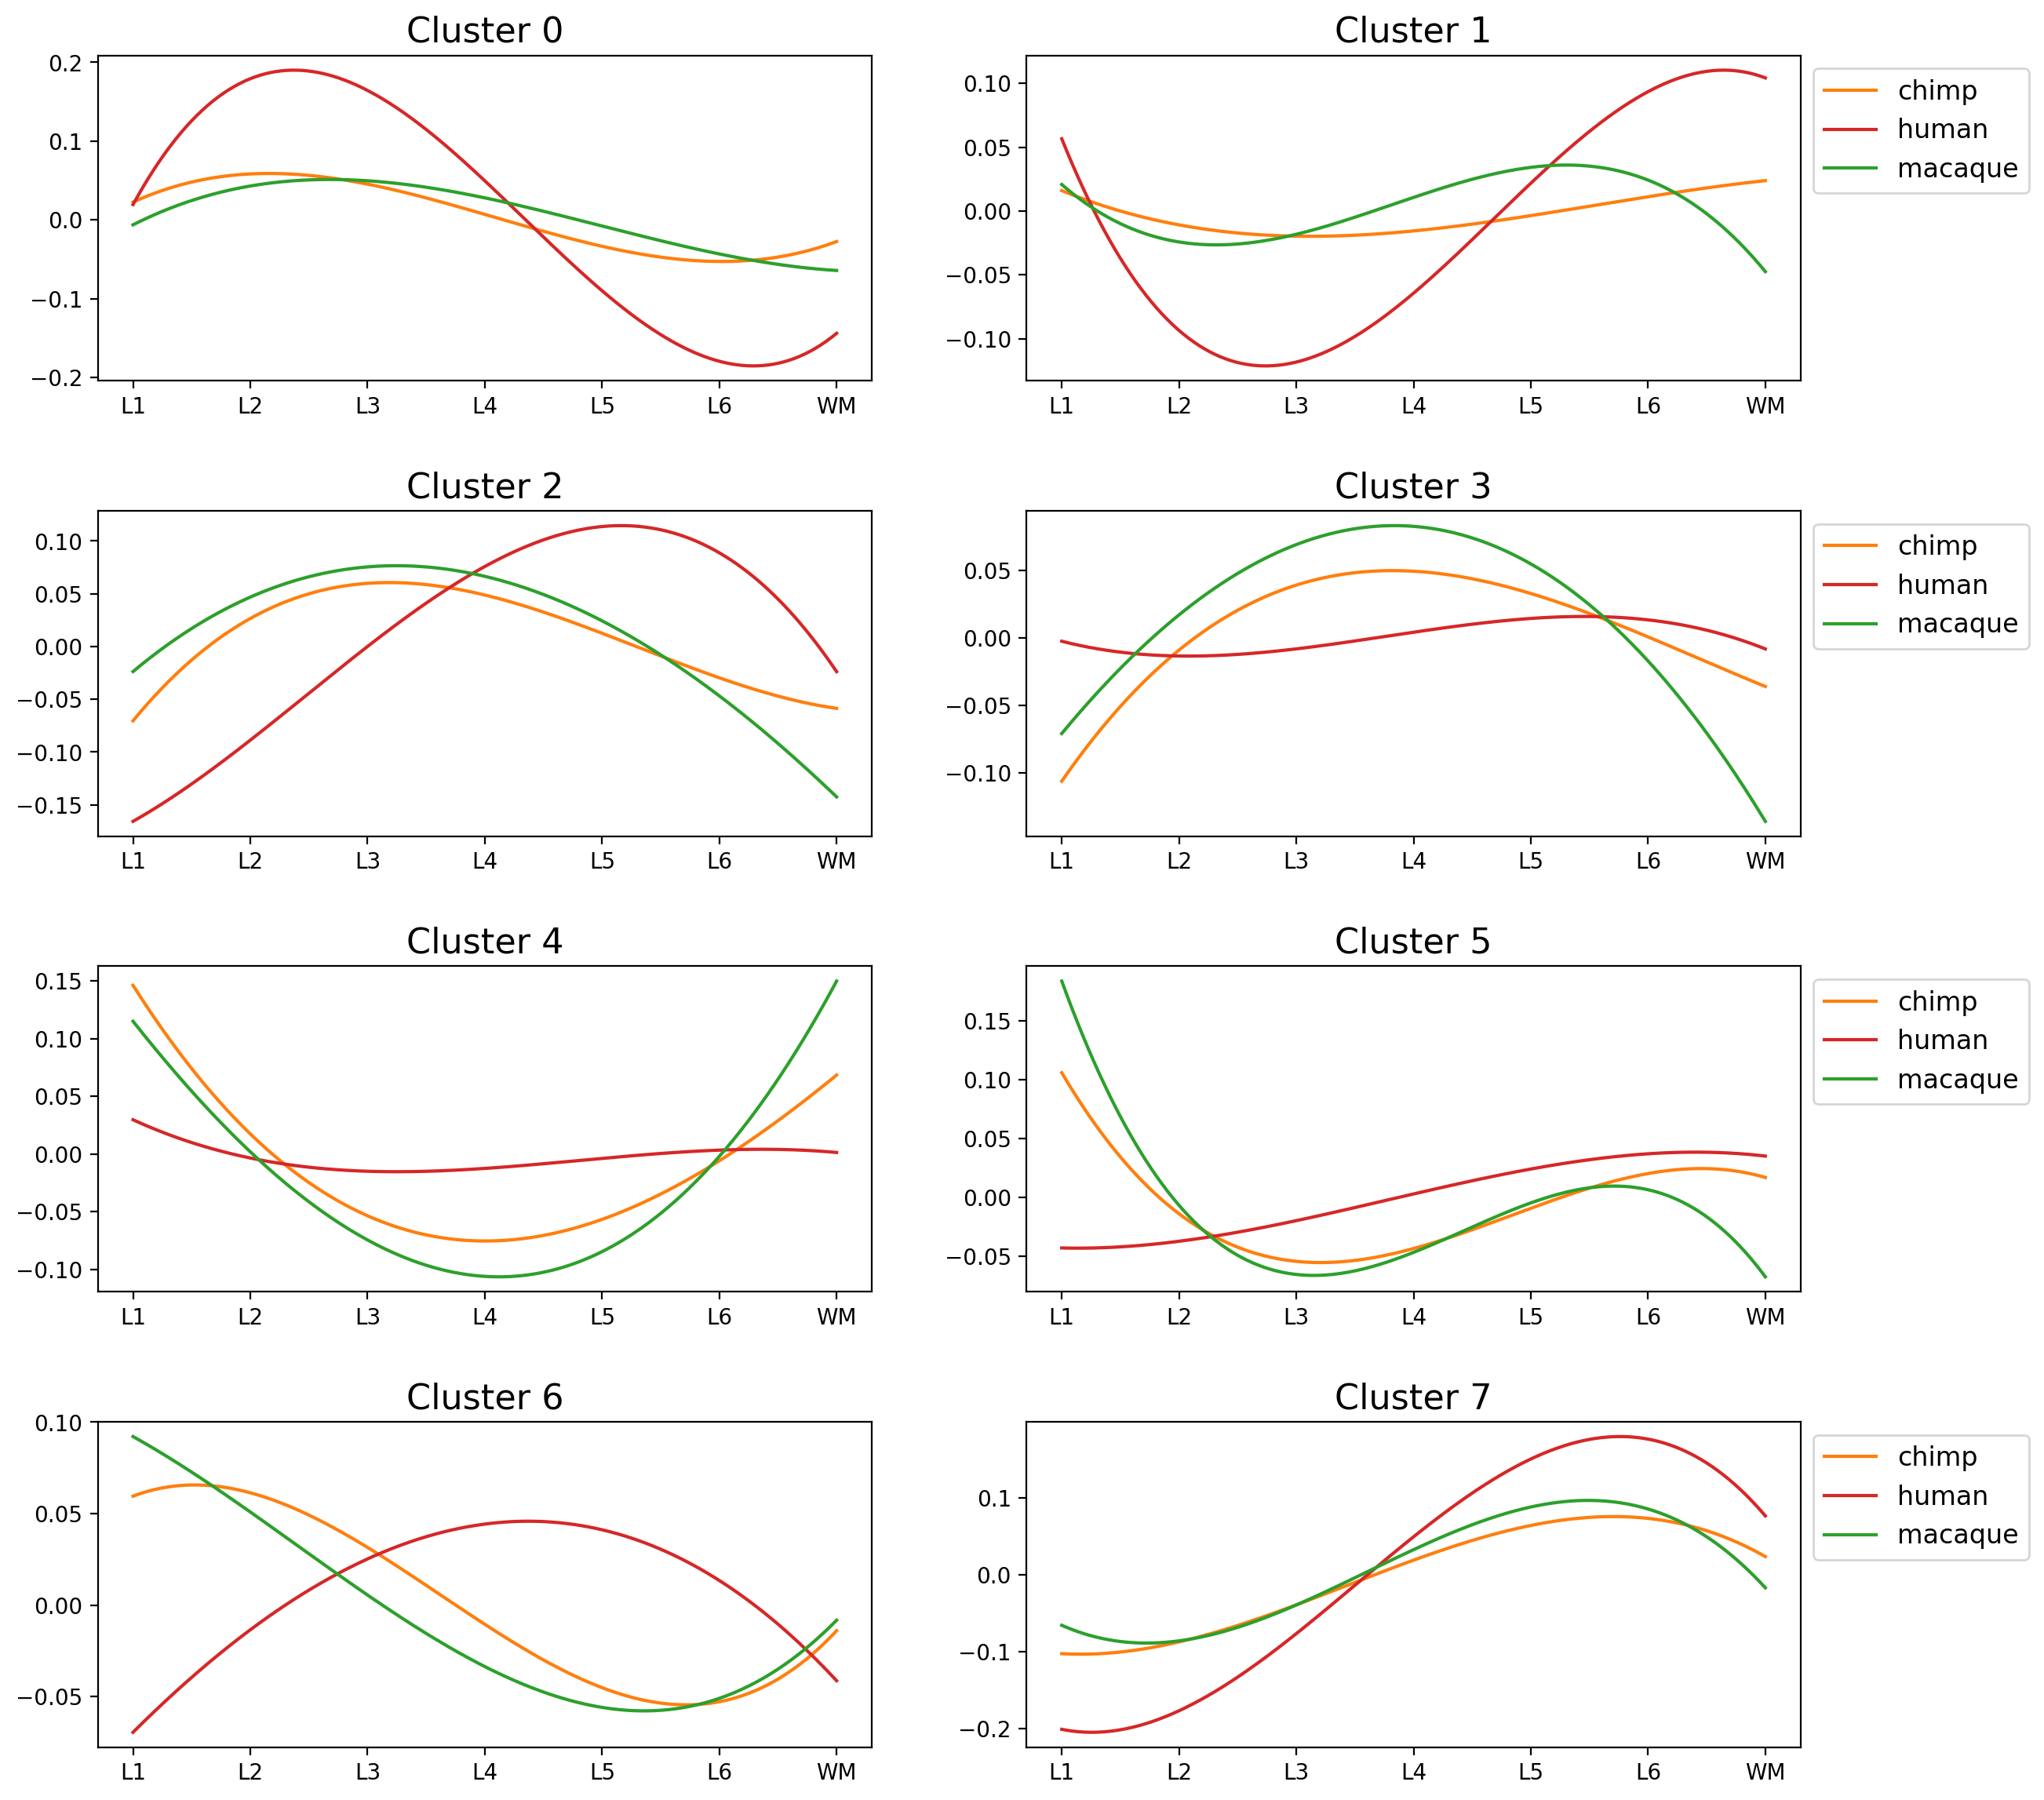

In [37]:
mpl.rcdefaults()
fig, axes = plt.subplots((n_clusters + 1) // 2, 2,  figsize=(14, 3.5 * n_clusters // 2), gridspec_kw={'hspace': 0.4})
for label, ax in zip(labels.unique(), axes.flatten()):
    genes = labels[labels == label].index.tolist()
    # plot the splines
    genes = labels[labels == label].index.tolist()
    df_cluster_spline = df_spline[genes].mean(axis=1).to_frame()
    df_cluster_spline['condition'] = df_spline['condition']
    df_cluster_spline = df_cluster_spline.pivot(columns='condition', values=0)
    df_cluster_spline.index = grid
    df_cluster_spline.plot.line(color={'human': 'tab:red', 'chimp': 'tab:orange', 'macaque': 'tab:green'}, ax=ax)

    # plot the dots
    # df_layers = layer_mean[genes].mean(axis=1).reorder_levels(['layer', 'condition']).unstack().loc[layers][conditions]
    # df_layers.index = np.arange(1, 8)
    # ax.set_prop_cycle(color=['tab:red', 'tab:orange', 'tab:green'])
    # ax.plot(df_layers, 'o', alpha=0.7)
    # ax.legend(conditions)
    
    
    ax.legend(fontsize=10, loc="upper left", bbox_to_anchor=(1, 1), prop={"size":12})
    ax.xaxis.set_major_locator(ticker.FixedLocator(np.arange(1, 8)))
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(layers))
    
    if label % 2 == 0:
        ax.get_legend().remove()
    ax.set_title(f'Cluster {label}', fontsize=16)
    ax.grid(False)
    #ax.hlines(0, xmin=1, xmax=6, colors='gray', linestyles='dashed')

Text(0.5, 0.98, 'Median averaging for profiles')

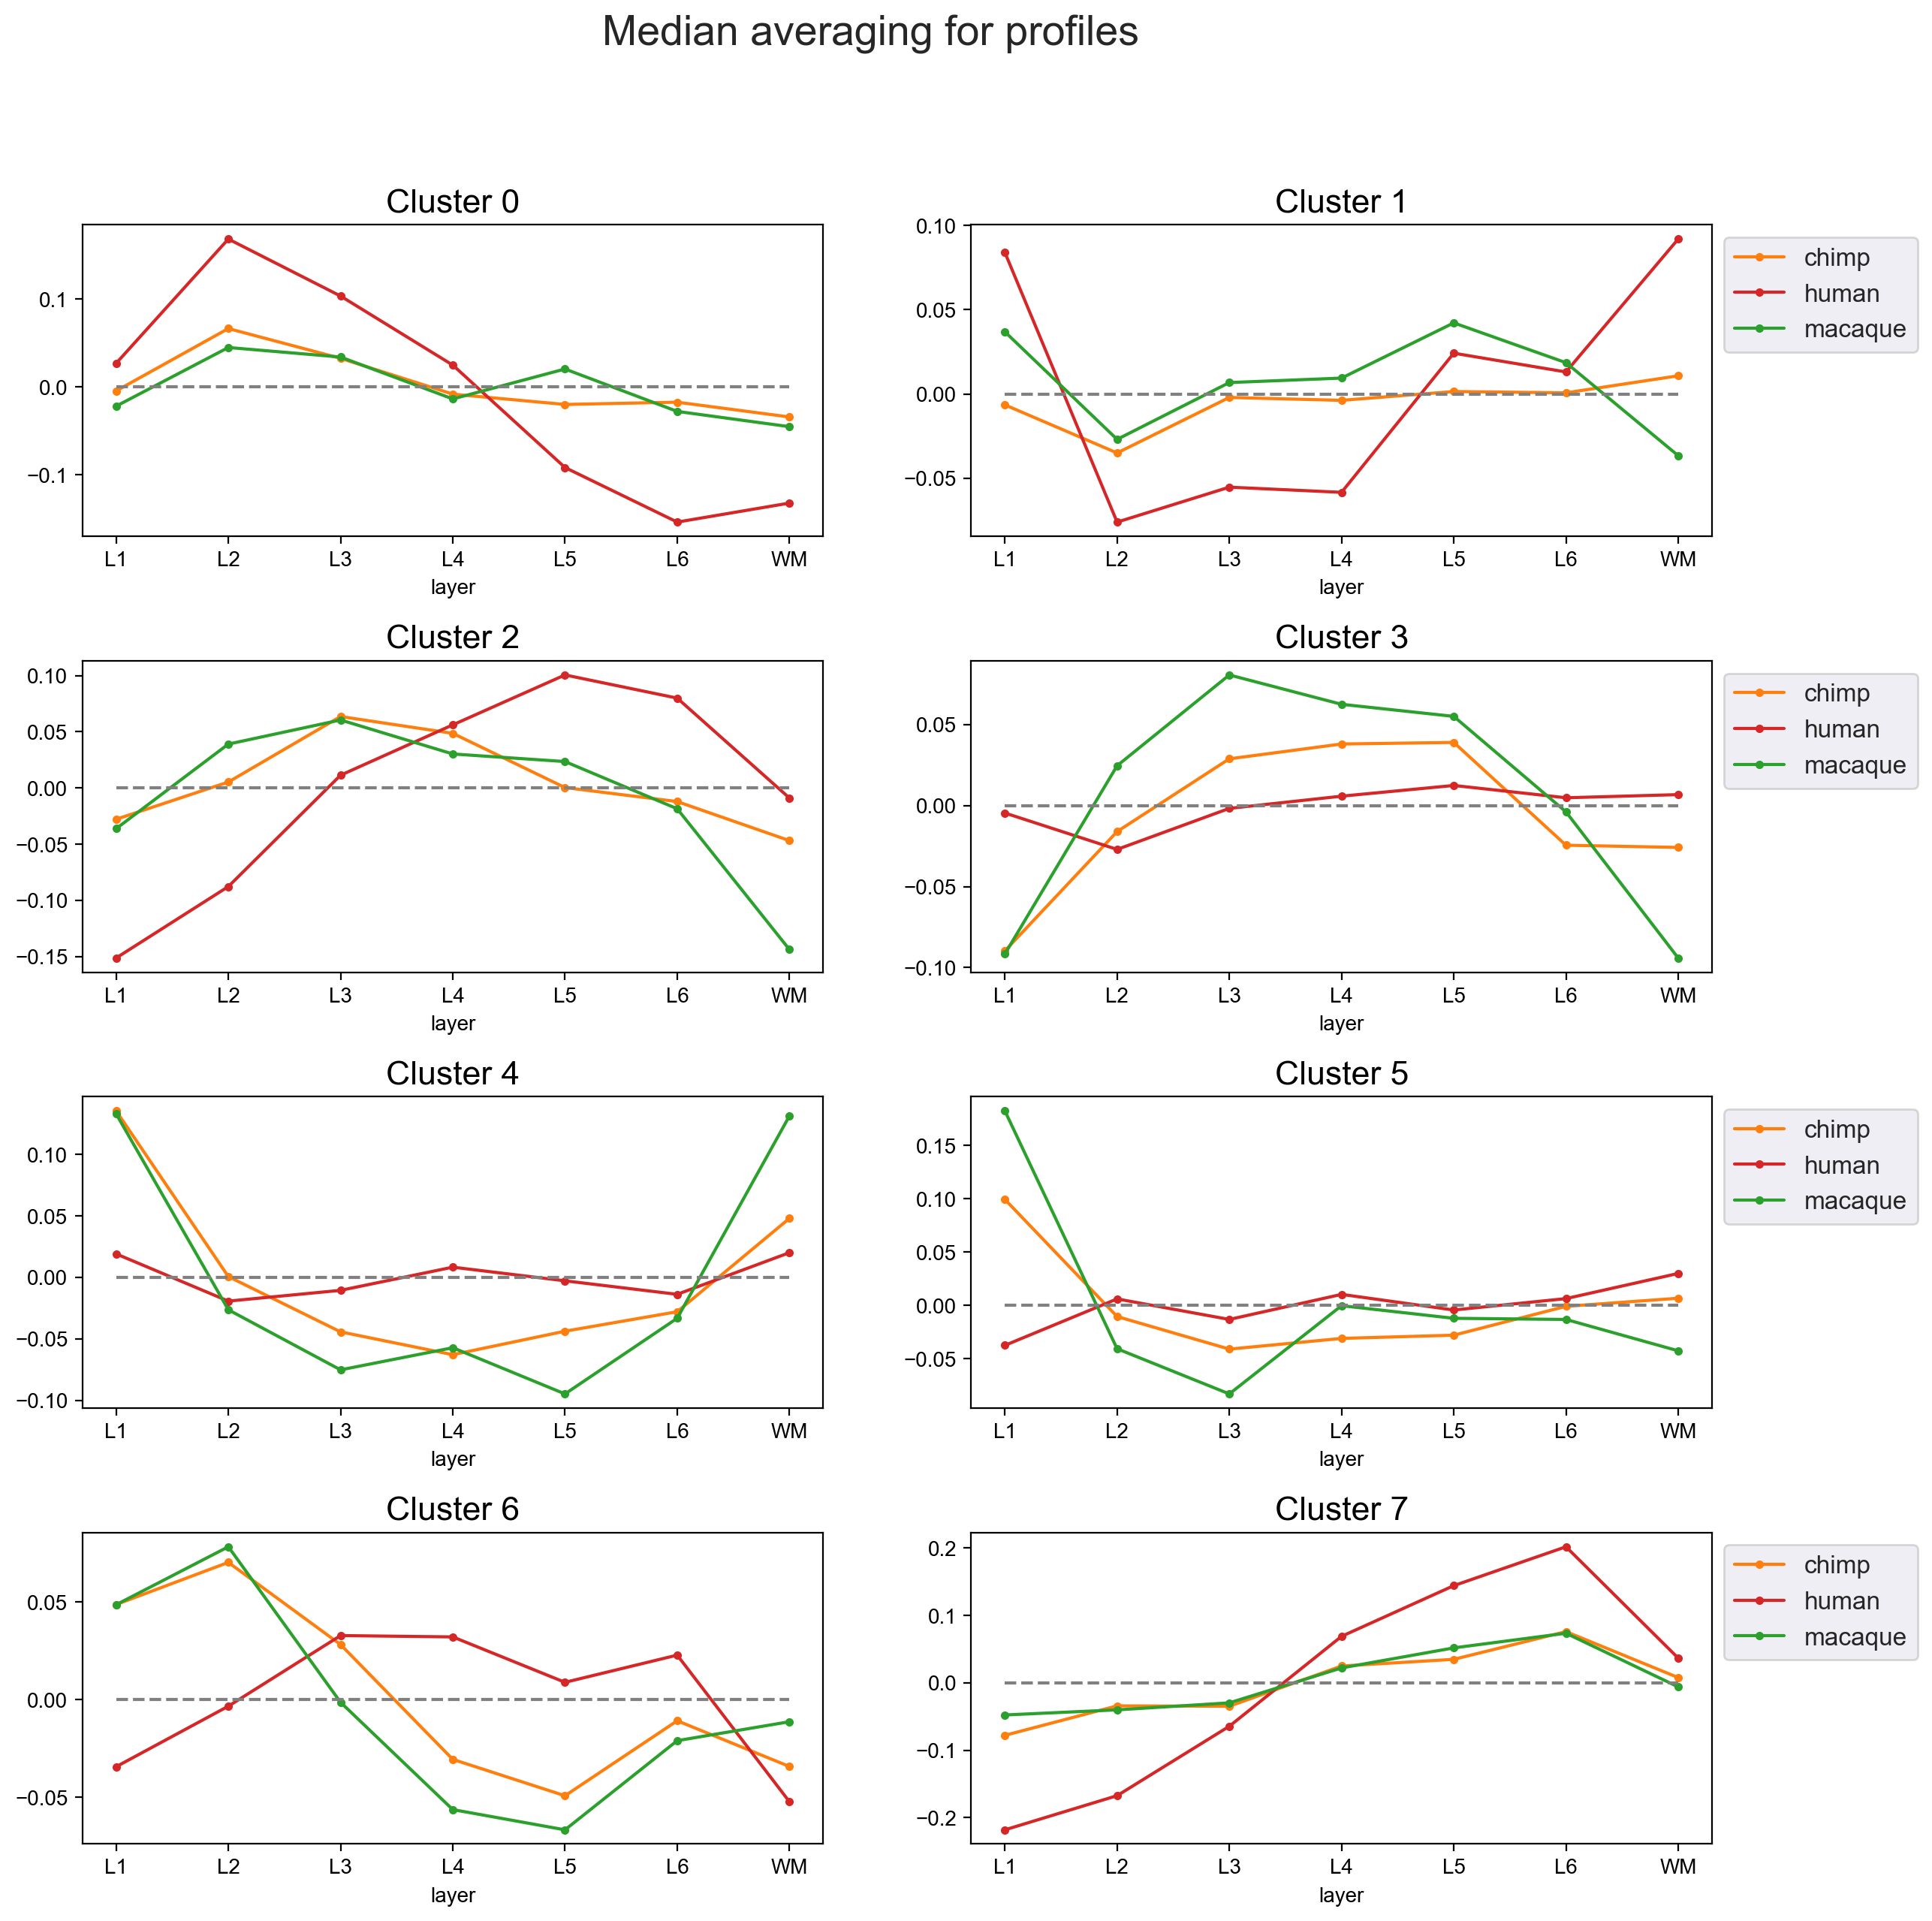

In [38]:
mpl.rcdefaults()
fig, axes = plt.subplots((n_clusters + 1) // 2, 2,  figsize=(14, 3.5 * n_clusters // 2), gridspec_kw={'hspace': 0.4})
sns.set(font_scale=1)
for label, ax in zip(labels.unique(), axes.flatten()):
    genes = labels[labels == label].index.tolist()

    (
        layer_mean[genes]
        .median(axis=1)
        .reorder_levels(['layer', 'condition'])
        .unstack().loc[layers]
        .plot
        .line(color={'human': 'tab:red', 'chimp': 'tab:orange', 'macaque': 'tab:green'}, ax=ax, marker='.')
    )
    ax.legend(fontsize=10)
    ax.set_title(f'Cluster {label}', fontsize=16)
    ax.grid(False)
    ax.hlines(0, xmin=0, xmax=6, colors='gray', linestyles='dashed')

    ax.legend(fontsize=10, loc="upper left", bbox_to_anchor=(1, 1), prop={"size":12})
    if label % 2 == 0:
        ax.get_legend().remove()

fig.suptitle('Median averaging for profiles', fontsize=20)

### Cell types

# 4 Species

In [39]:
pb_dir_path = '../../data/pseudobulks/'
adata_pb_4spe = sc.read_h5ad(pb_dir_path + '4spe_pb_mean_filt_nor_mean.h5ad')
#adata_pb_norm_mean.var = anova_res
adata_pb_4spe

AnnData object with n_obs × n_vars = 116 × 6523
    obs: 'layer', 'sample_id', 'condition', 'lib_size', 'log_lib_size'
    var: 'gene_name'
    uns: 'log1p'

In [40]:
df_4spe = pd.DataFrame(adata_pb_4spe.X, index=adata_pb_4spe.obs_names, columns=adata_pb_4spe.var_names)

In [41]:
hs_genes_inter = df_4spe.columns.intersection(hs_genes)
hs_genes_inter.size

67

In [42]:
sample_order = dict()
for cond in ['human', 'chimp', 'macaque', 'treeshrew']:
    samples = df_4spe.loc[df_4spe.index.str.contains(cond)].index
    order_s = sorted(samples.tolist(), key=lambda x: x[:2])
    order_laminar = list(filter(lambda x: 'L' in x, order_s))
    order_wm = list(filter(lambda x: 'WM' in x, order_s))
    sample_order[cond] = order_wm + order_laminar
sample_order['all'] = sample_order['human'] + sample_order['chimp'] + sample_order['macaque'] + sample_order['treeshrew']
df_4spe = df_4spe.loc[sample_order['all']]
df_4spe_hs = df_4spe[hs_genes_inter]

In [43]:
order_4spe = order.intersection(hs_genes_inter)

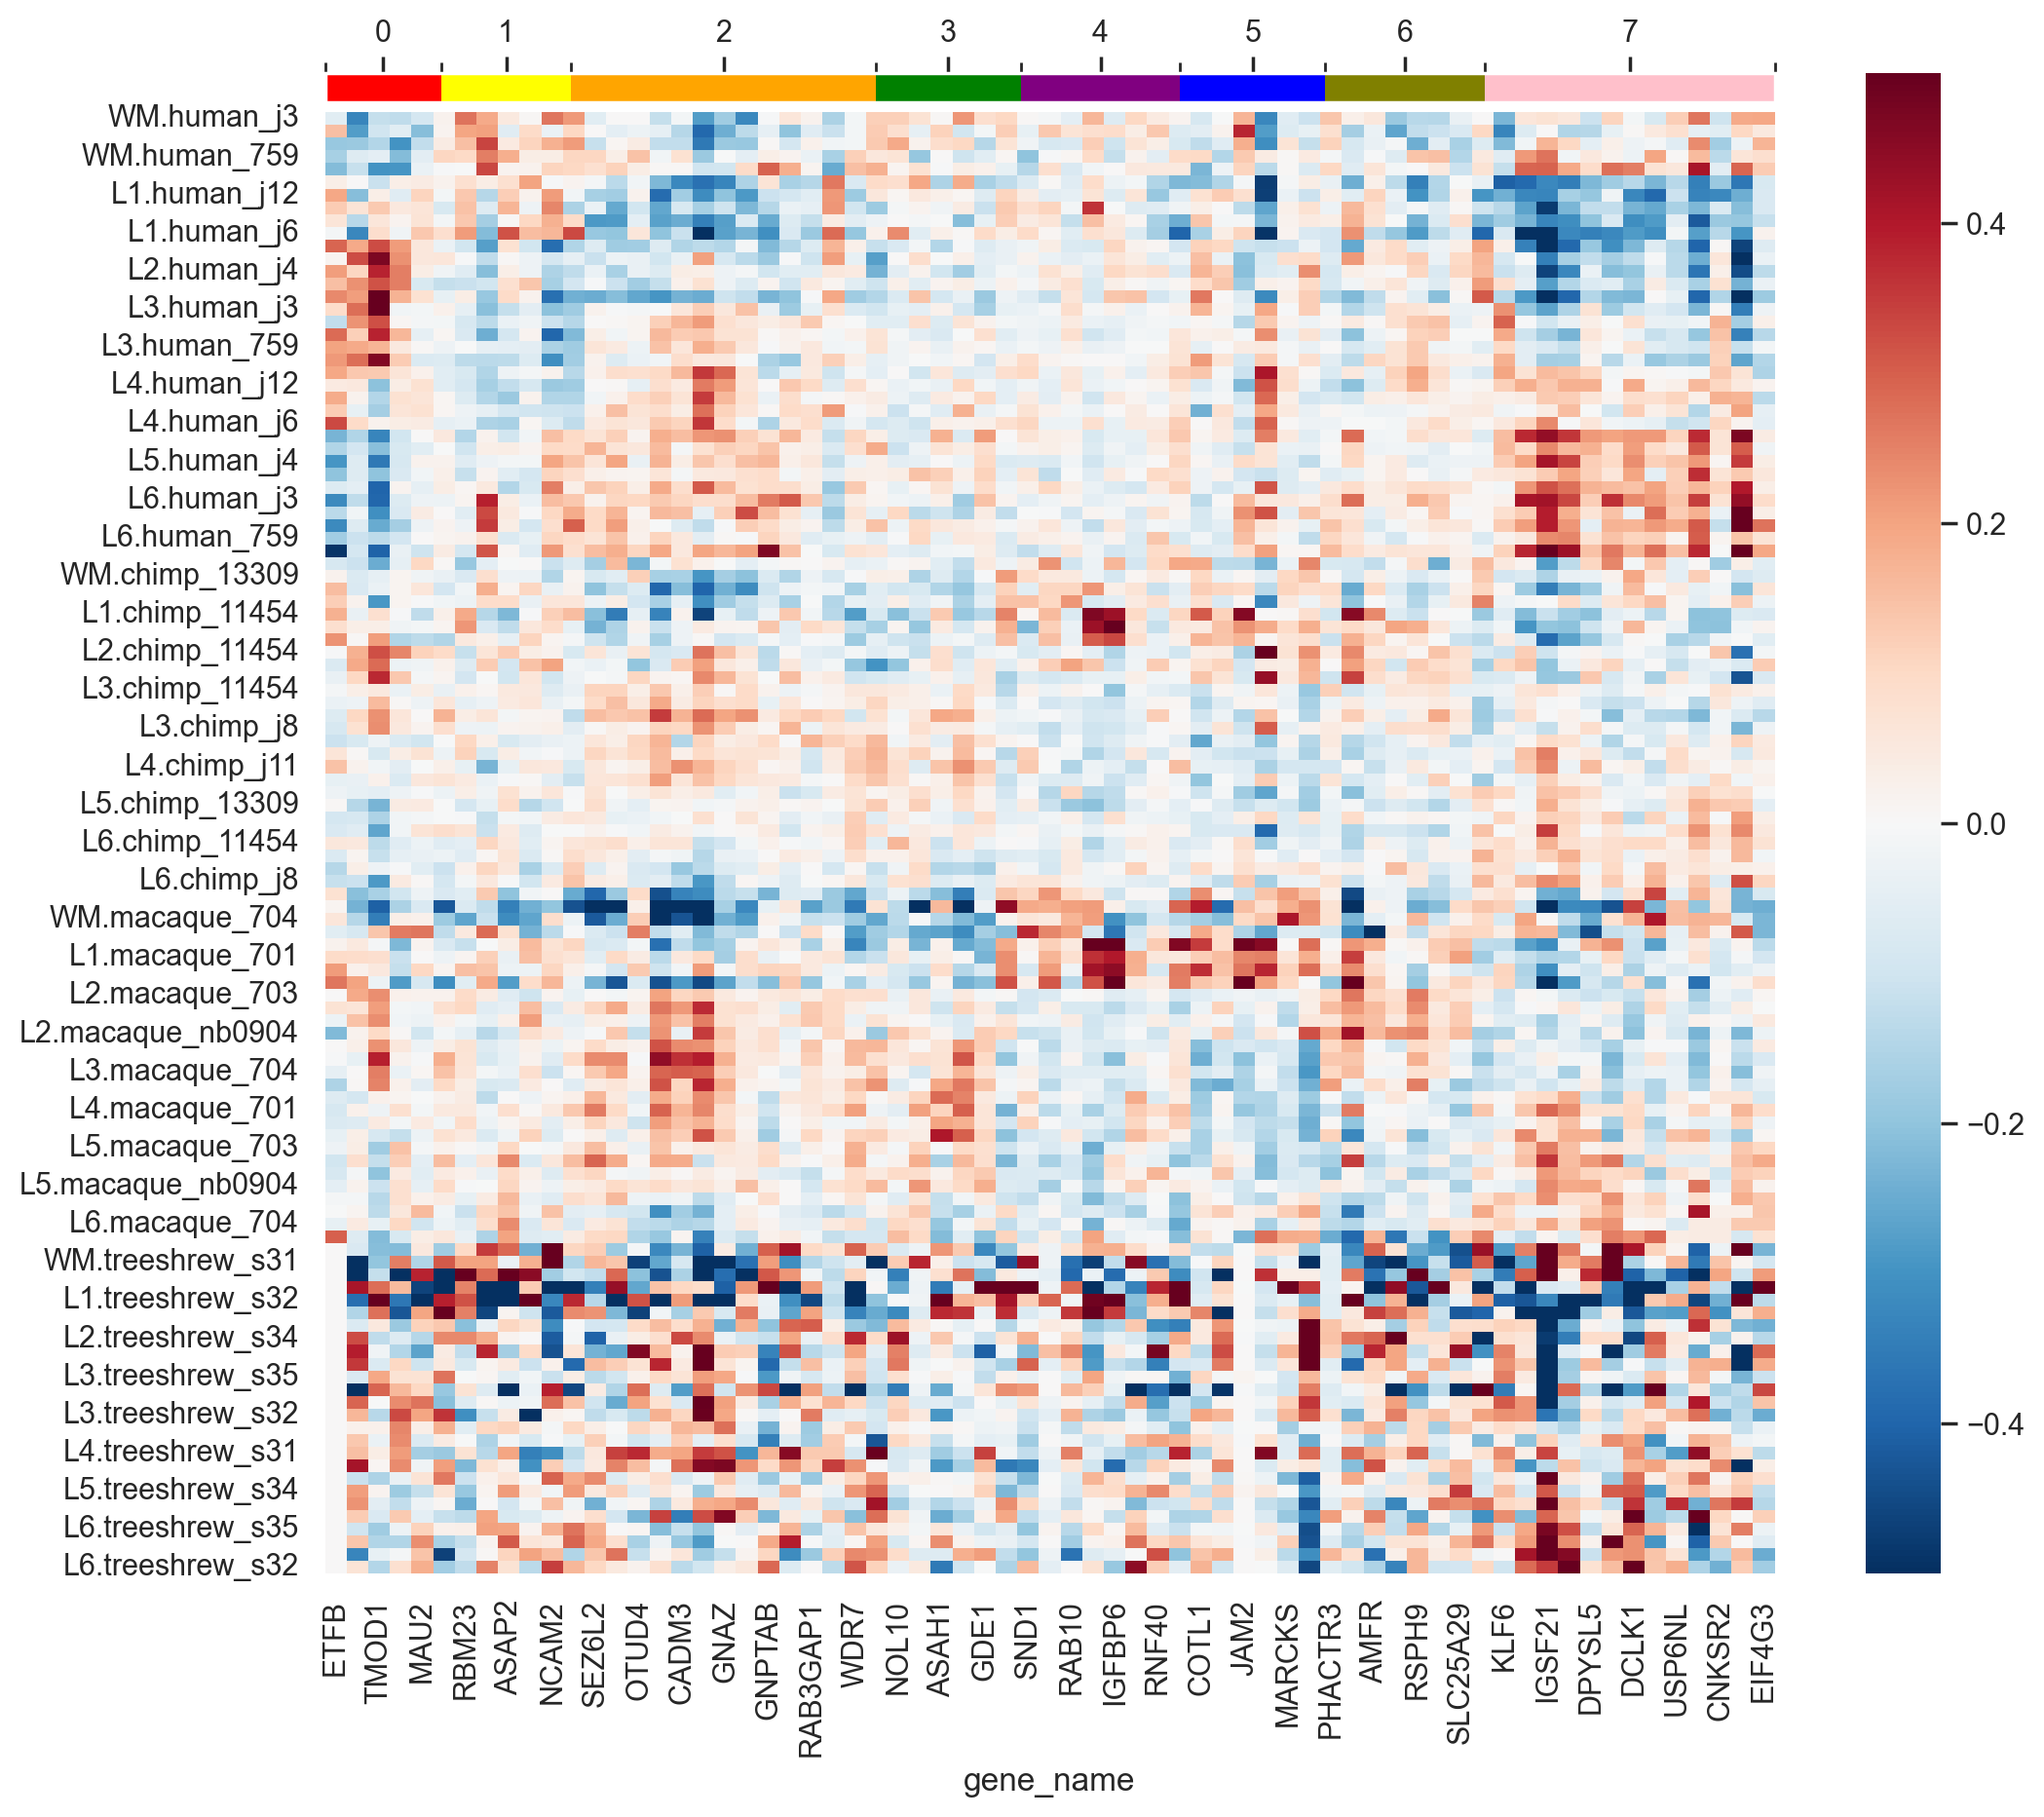

In [44]:
from matplotlib.patches import bbox_artist
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import ticker

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df_4spe_hs[order_4spe], ax=ax, cmap="RdBu_r", vmax=0.5, vmin=-0.5, center=0)
divider = make_axes_locatable(ax)
cax = divider.append_axes('top', size='2%', pad=0.05)
cmap = mpl.colors.ListedColormap(colors)

cluster_size = labels.value_counts().loc[clusters].values
cluster_pos = cluster_size.cumsum()
bounds = [0] + list(cluster_pos)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
fig.colorbar(
    mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
    cax=cax,
    ticks=bounds,
    orientation='horizontal',
    spacing='proportional'
)
cax.xaxis.set_major_locator(ticker.FixedLocator(cluster_pos - cluster_size / 2))
cax.xaxis.set_major_formatter(ticker.FixedFormatter(clusters))
cax.xaxis.tick_top()

## Cluster profiles (mean)

In [45]:
df_annotation = df_4spe_hs.copy()
df_annotation['layer'] = adata_pb_4spe.obs.layer
df_annotation['condition'] = adata_pb_4spe.obs.condition

In [46]:
layer_mean = df_annotation.groupby(['condition', 'layer']).mean()
layer_mean.head()

gene_name          IGSF21    EIF4G3    ADAM15     CADM3    KIF21B    ZBTB18  \
condition layer                                                               
chimp     6a          NaN       NaN       NaN       NaN       NaN       NaN   
          L1    -0.231617 -0.038050  0.142487 -0.009694 -0.061434 -0.137080   
          L2    -0.164320  0.012132 -0.007318  0.019649  0.055080  0.238887   
          L3    -0.013440 -0.050283 -0.062504  0.087419  0.114423  0.185809   
          L4     0.176425  0.033634 -0.046611  0.043859  0.066458  0.131912   

gene_name           ASAP2     NOL10     RAB10    DPYSL5  ...      WDR7  \
condition layer                                          ...             
chimp     6a          NaN       NaN       NaN       NaN  ...       NaN   
          L1    -0.131812 -0.099869 -0.048186 -0.167690  ... -0.193049   
          L2    -0.019229 -0.095543  0.046563  0.068464  ... -0.102755   
          L3     0.024485  0.016631 -0.031884 -0.008634  ...  0.010263   
          L4    -0.022616  0.054456 -0.058043  0.050328  ...  0.111340   

gene_name          ZMYND8   PHACTR3    ZBTB46      TECR      MAU2      ETFB  \
condition layer                                                               
chimp     6a          NaN       NaN       NaN       NaN       NaN       NaN   
          L1     0.012081 -0.045866  0.019432  0.192520 -0.091200  0.162136   
          L2     0.071141 -0.018842  0.116313 -0.078687  0.028570 -0.038228   
          L3     0.075658  0.039919  0.099157 -0.071254  0.007604 -0.048922   
          L4     0.026744  0.013233  0.029338 -0.076287  0.008512  0.016441   

gene_name            GNAZ     NCAM2      JAM2  
condition layer                                
chimp     6a          NaN       NaN       NaN  
          L1    -0.039300  0.075177  0.285189  
          L2     0.123926  0.041594 -0.111063  
          L3     0.102861 -0.014084 -0.064058  
          L4     0.079627 -0.011287 -0.068254  

[5 rows x 67 columns]

Text(0.5, 0.98, 'Mean averaging for profiles')

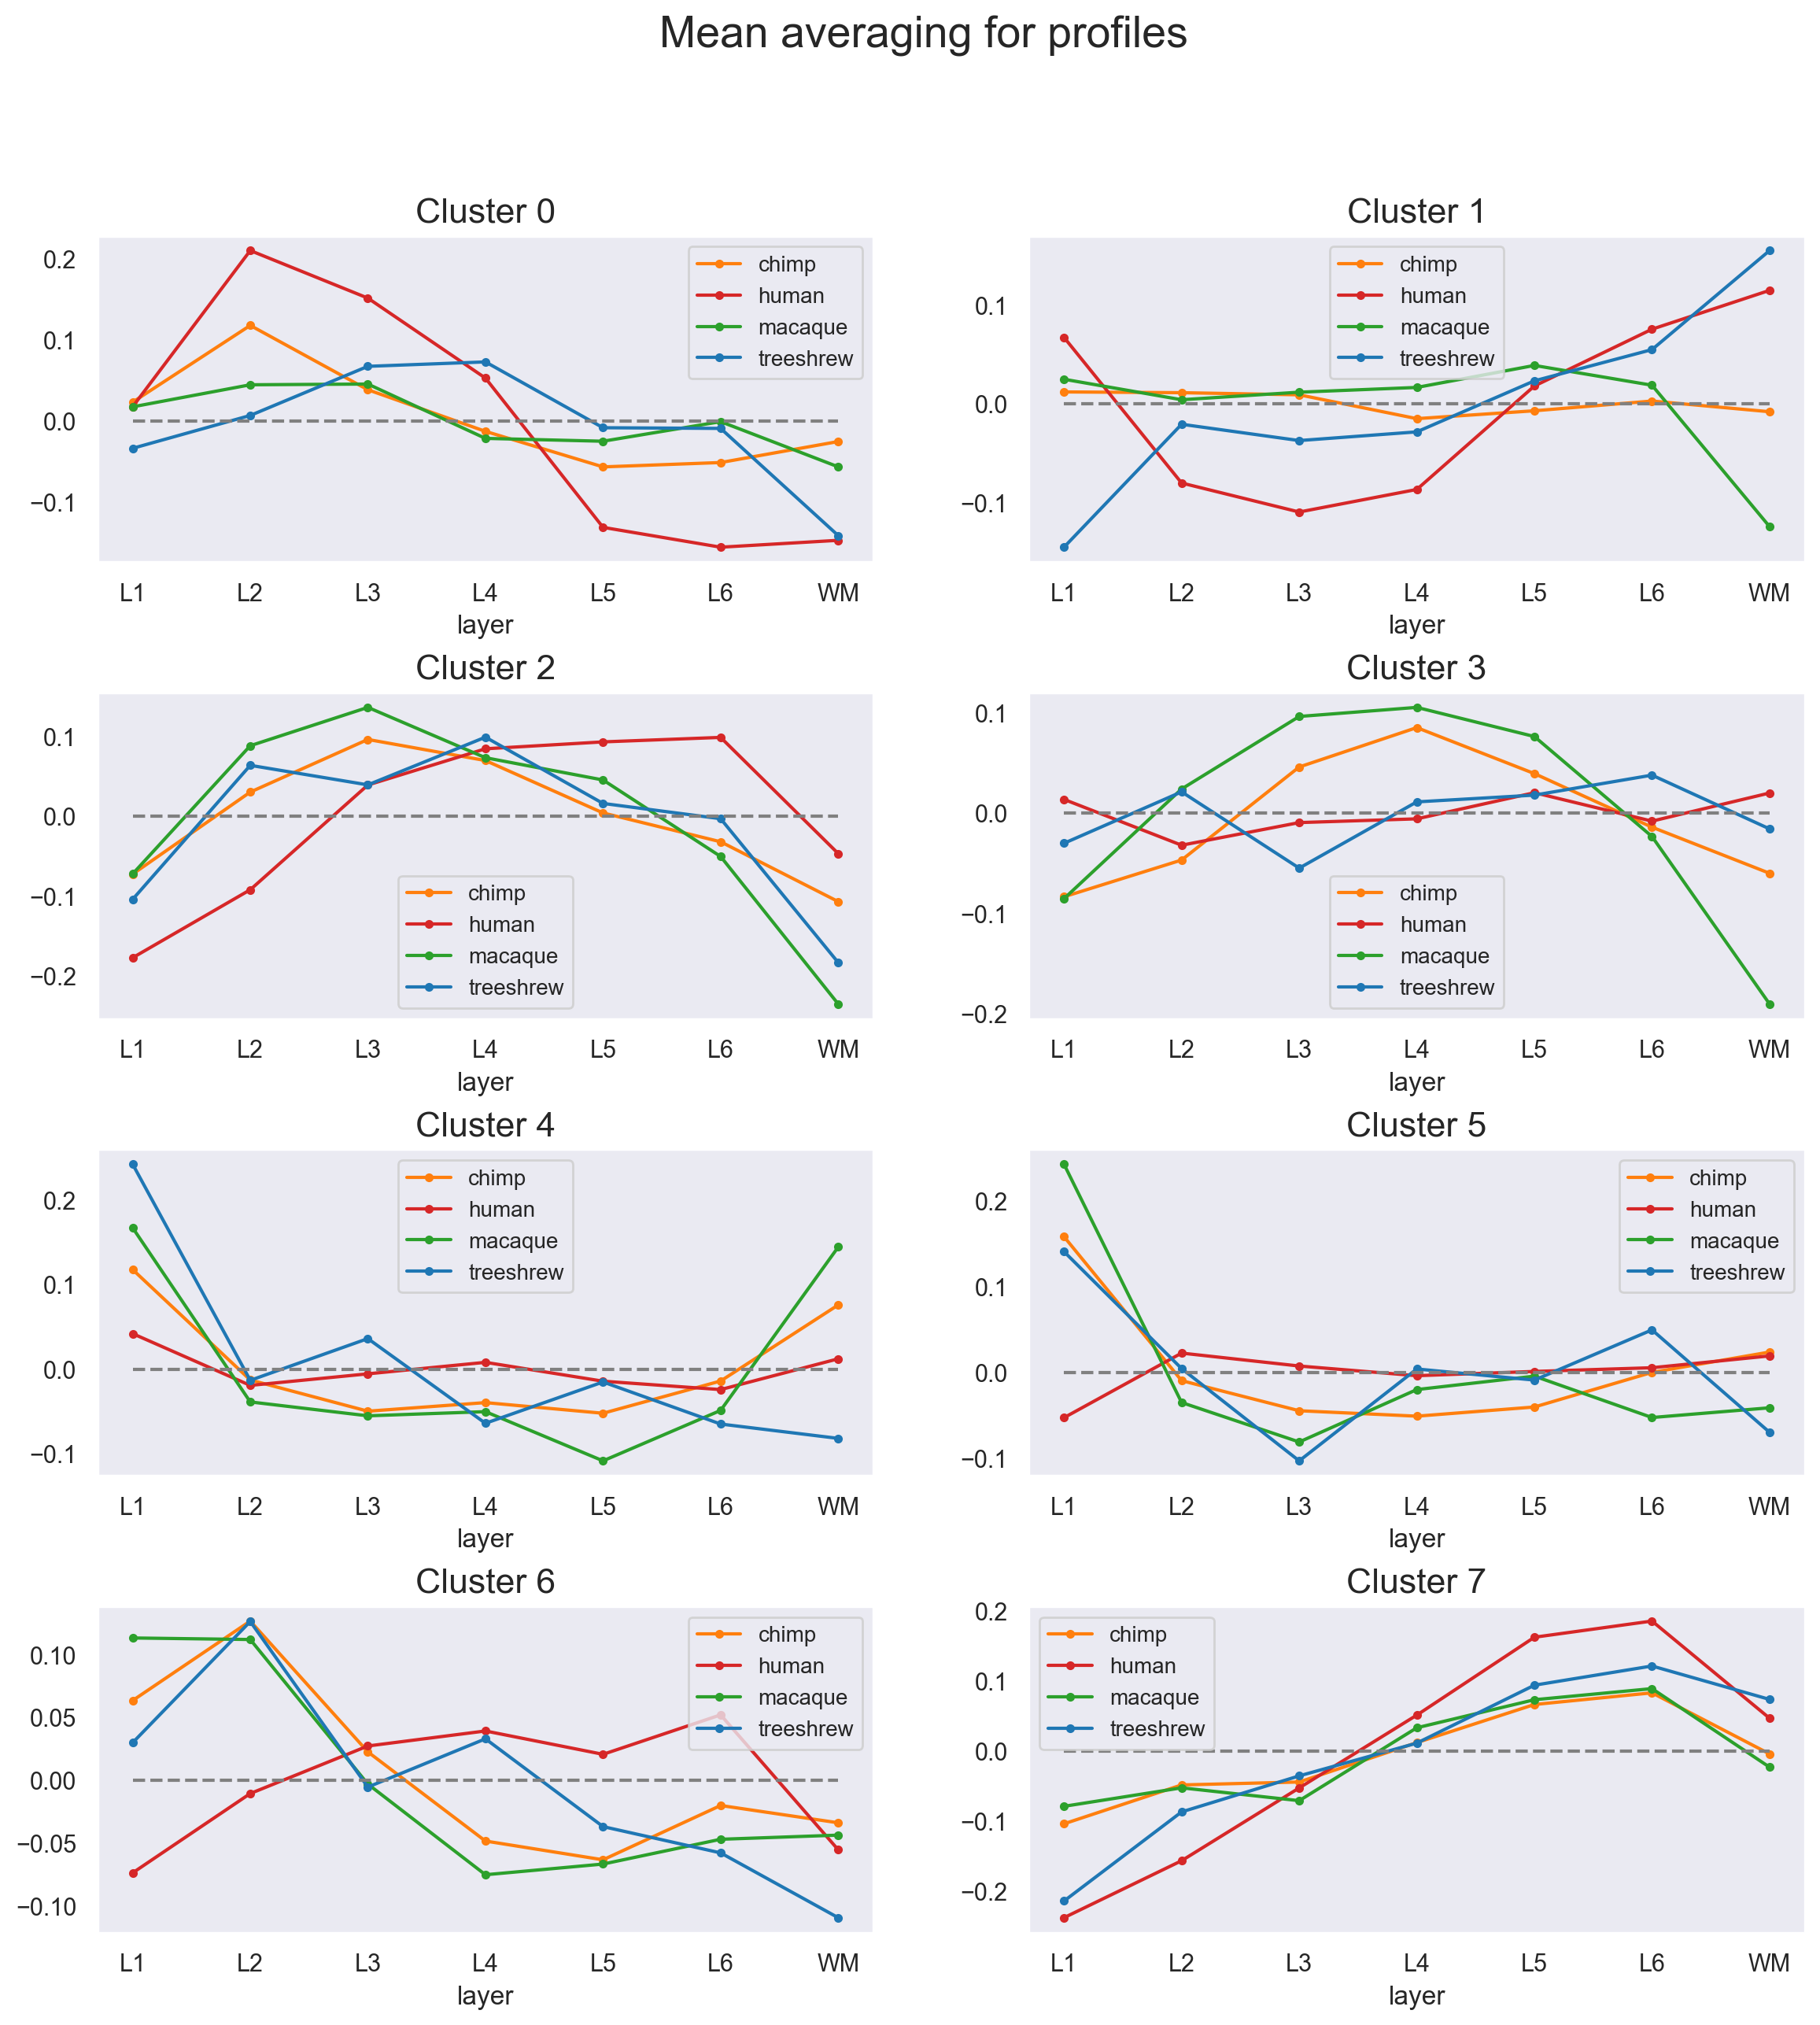

In [47]:
fig, axes = plt.subplots((n_clusters + 1) // 2, 2,  figsize=(14, 3.5 * n_clusters // 2), gridspec_kw={'hspace': 0.4})
sns.set(font_scale=1)
for label, ax in zip(labels.unique(), axes.flatten()):
    genes = labels[labels == label].index.intersection(hs_genes_inter).tolist()

    (
        layer_mean[genes]
        .mean(axis=1)
        .reorder_levels(['layer', 'condition'])
        .unstack().loc[layers]
        .plot
        .line(color={'human': 'tab:red', 'chimp': 'tab:orange', 'macaque': 'tab:green', 'treeshrew': 'tab:blue'}, ax=ax, marker='.')
    )
    ax.legend(fontsize=10)
    ax.set_title(f'Cluster {label}', fontsize=16)
    ax.grid(False)
    ax.hlines(0, xmin=0, xmax=6, colors='gray', linestyles='dashed')

fig.suptitle('Mean averaging for profiles', fontsize=20)

## Cluster profiles (Median)

Text(0.5, 0.98, 'Median averaging for profiles')

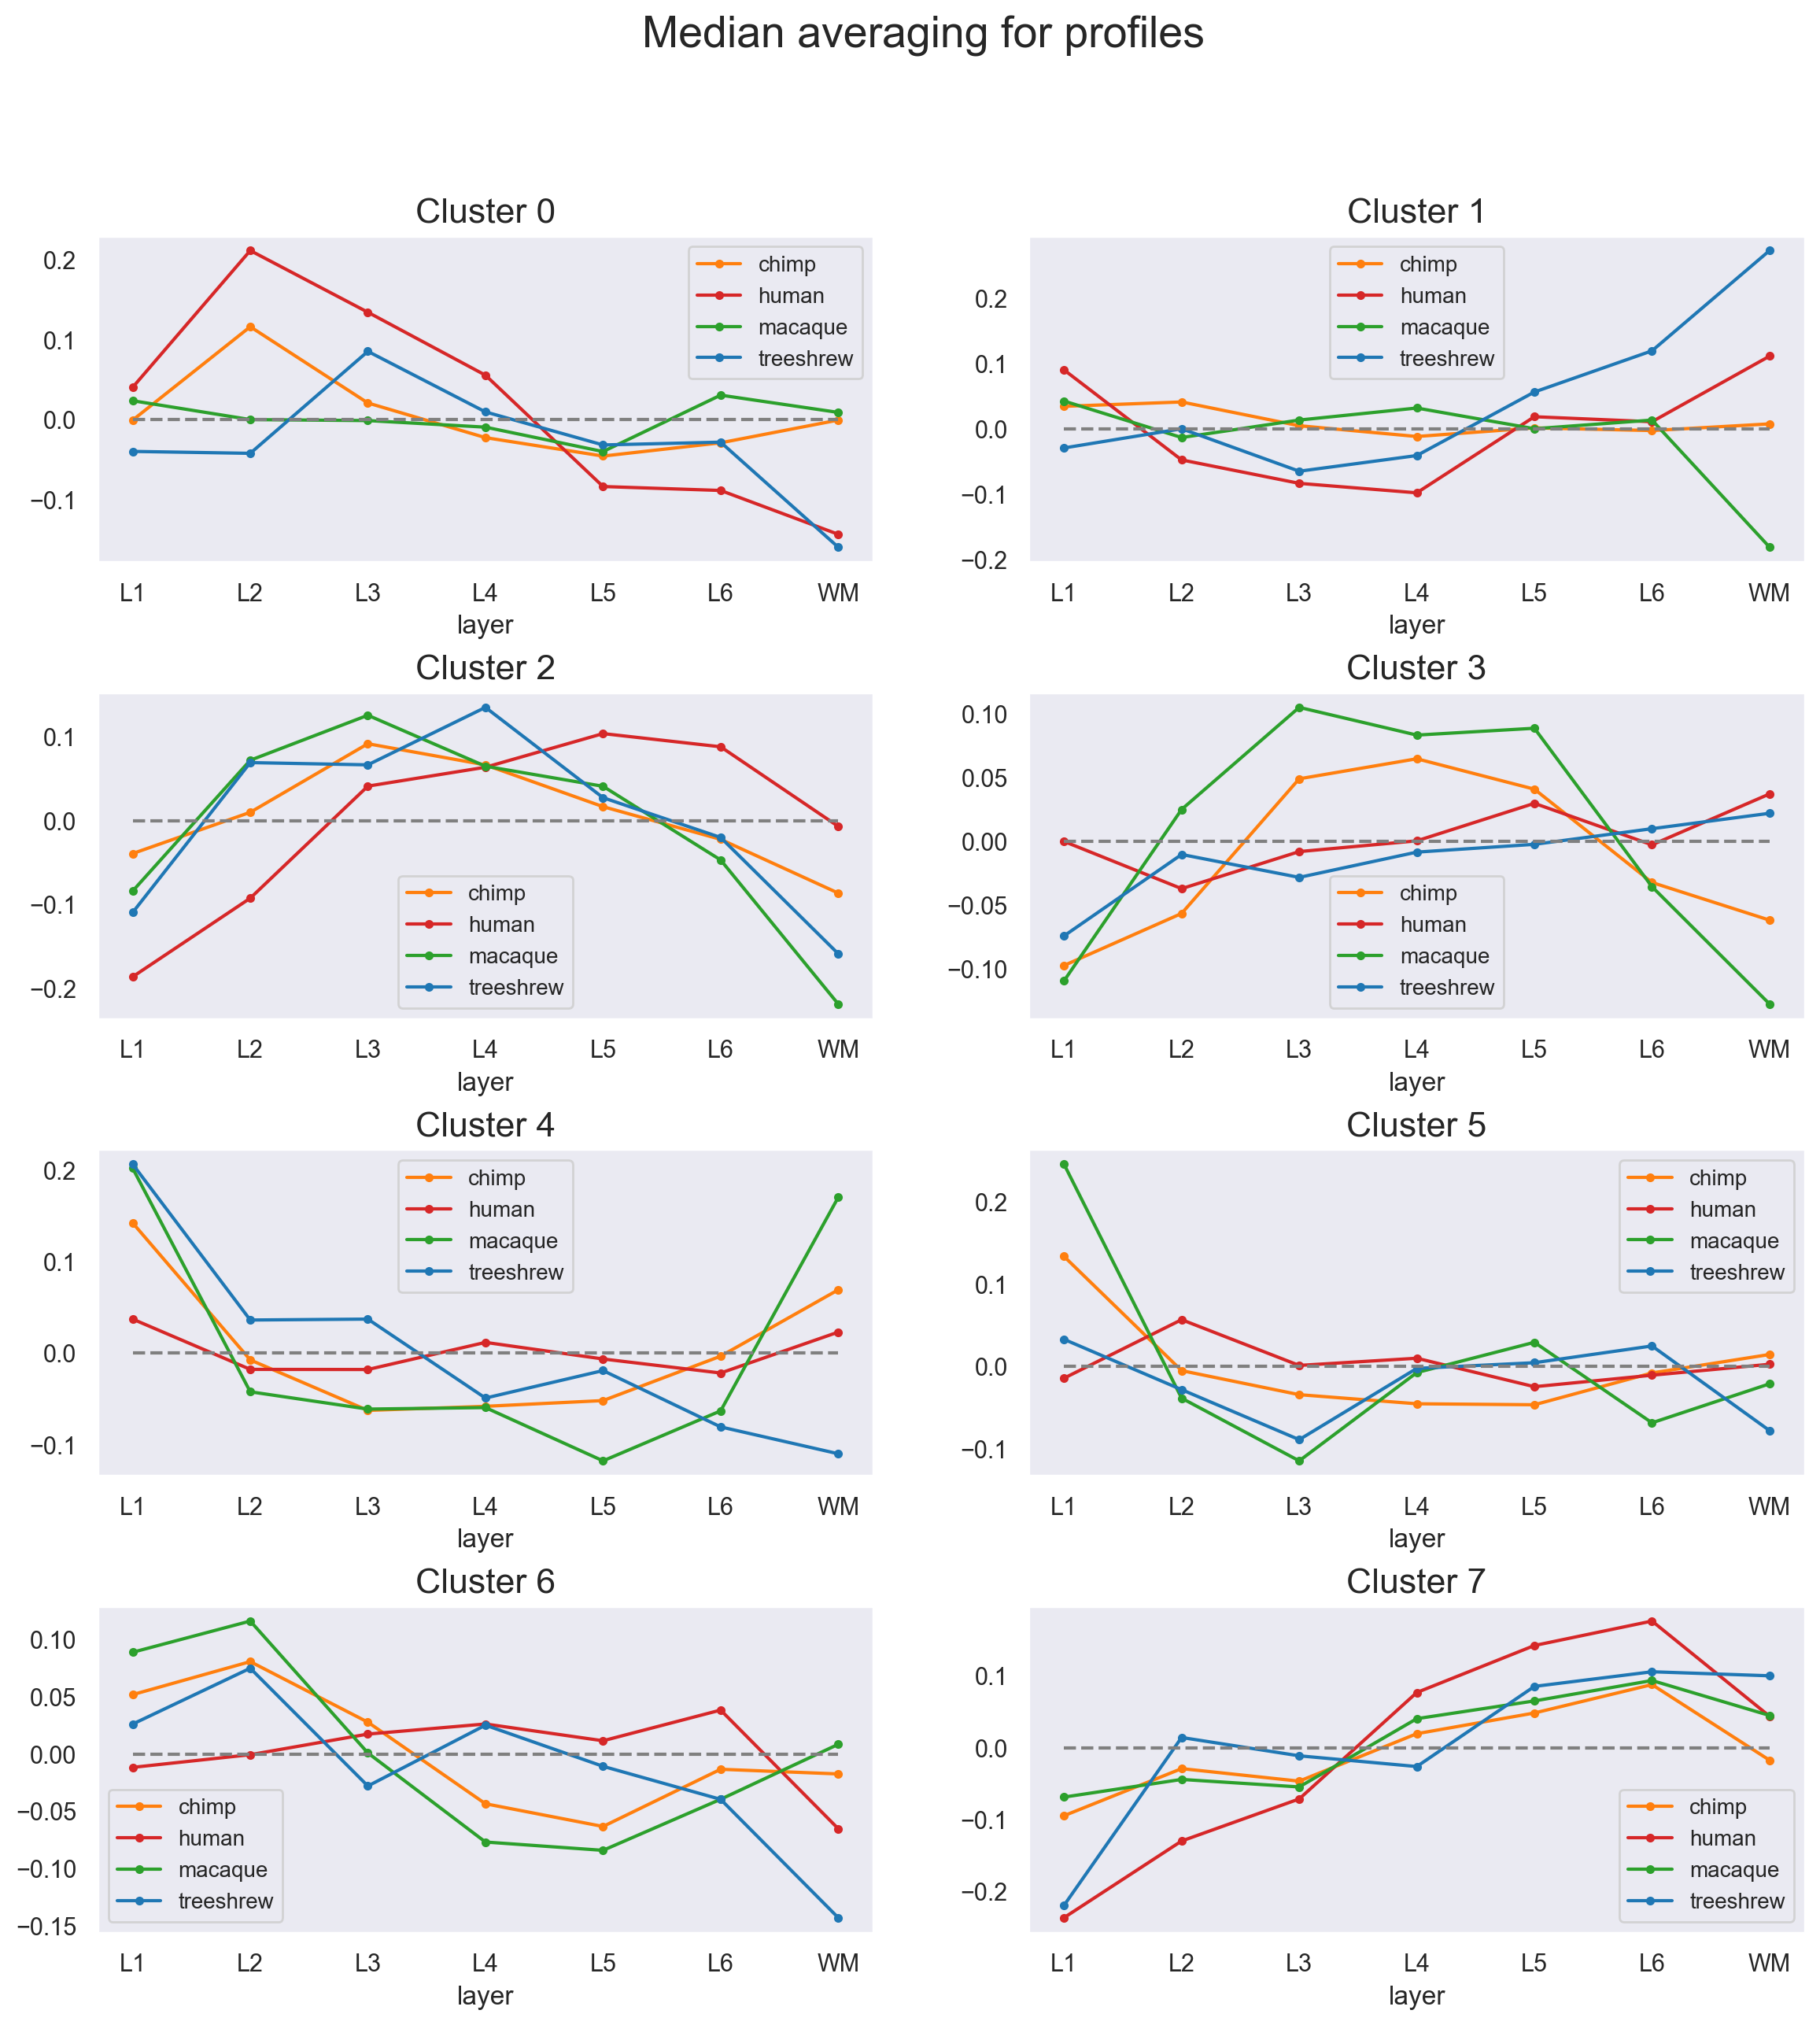

In [48]:
fig, axes = plt.subplots((n_clusters + 1) // 2, 2,  figsize=(14, 3.5 * n_clusters // 2), gridspec_kw={'hspace': 0.4})
sns.set(font_scale=1)
for label, ax in zip(labels.unique(), axes.flatten()):
    genes = labels[labels == label].index.intersection(hs_genes_inter).tolist()

    (
        layer_mean[genes]
        .median(axis=1)
        .reorder_levels(['layer', 'condition'])
        .unstack().loc[layers]
        .plot
        .line(color={'human': 'tab:red', 'chimp': 'tab:orange', 'macaque': 'tab:green', 'treeshrew': 'tab:blue'}, ax=ax, marker='.')
    )
    ax.legend(fontsize=10)
    ax.set_title(f'Cluster {label}', fontsize=16)
    ax.grid(False)
    ax.hlines(0, xmin=0, xmax=6, colors='gray', linestyles='dashed')

fig.suptitle('Median averaging for profiles', fontsize=20)

In [49]:
# sns.set(font_scale=1)
# label = 3
# genes = hs_genes_inter.tolist()
# fig, axes = plt.subplots((len(genes) + 1) // 2, 2,  figsize=(14, 3.5 * len(genes) // 2), gridspec_kw={'hspace': 0.4})

# for gene, ax in zip(genes, axes.flatten()):
#     (
#         layer_mean[gene]
#         .reorder_levels(['layer', 'condition'])
#         .unstack().loc[layers]
#         .plot
#         .line(color={'human': 'tab:red', 'chimp': 'tab:orange', 'macaque': 'tab:green', 'treeshrew': 'tab:blue'}, ax=ax, marker='.')
#     )
#     ax.legend(fontsize=10)
#     ax.set_title(f'{gene}', fontsize=16)
#     ax.grid(False)
#     ax.hlines(0, xmin=0, xmax=6, colors='gray', linestyles='dashed')
# plt.savefig('hs_genes_profiles.pdf')

In [50]:
cs_genes = sign_genes['chimp-macaque'].intersection(sign_genes['human-chimp']).difference(sign_genes['human-macaque'])
cs_genes, cs_genes.size

(Index(['ACTN2', 'ANK3', 'AZIN2', 'CALB2', 'DIPK2A', 'DNAJB6', 'FAU', 'KXD1',
        'MASP1', 'MIF', 'MRPL23', 'MYCBP2', 'NUAK1', 'NUP93', 'PQBP1', 'RIPOR2',
        'RPL26', 'RPL35A', 'SEMA3A', 'SEPTIN7', 'SERINC1', 'SGTB', 'SORL1',
        'SRI', 'SULF1', 'THBS1', 'TMEM259', 'TMEM70', 'TPD52L1', 'TSPAN3',
        'USP11', 'WLS'],
       dtype='object'),
 32)

In [51]:
cs_genes_inter = df_4spe.columns.intersection(cs_genes)
cs_genes_inter.size

18

In [52]:
df_4spe_cs = df_4spe[cs_genes_inter]

In [53]:
df_annotation = df_4spe_cs.copy()
df_annotation['layer'] = adata_pb_4spe.obs.layer
df_annotation['condition'] = adata_pb_4spe.obs.condition

In [54]:
layer_mean = df_annotation.groupby(['condition', 'layer']).mean()
layer_mean.head()

gene_name           AZIN2       WLS    DIPK2A      SGTB   SERINC1   TPD52L1  \
condition layer                                                               
chimp     6a          NaN       NaN       NaN       NaN       NaN       NaN   
          L1    -0.024870  0.160677  0.039857 -0.204995 -0.047715  0.052663   
          L2    -0.028452 -0.048604 -0.117550 -0.099180  0.106312  0.110099   
          L3     0.008705 -0.151951  0.009027  0.146068  0.076599 -0.034727   
          L4     0.011918 -0.048296  0.017044  0.110791  0.057703 -0.028150   

gene_name          SEMA3A     USP11     SULF1    TMEM70     SORL1      ANK3  \
condition layer                                                               
chimp     6a          NaN       NaN       NaN       NaN       NaN       NaN   
          L1    -0.161038  0.033495 -0.128867 -0.090638 -0.025362 -0.242198   
          L2    -0.140664 -0.023828 -0.241896 -0.115463  0.068469  0.029233   
          L3     0.005594  0.008553 -0.232210 -0.007174  0.168666  0.104636   
          L4     0.095570 -0.020148 -0.218902 -0.012771  0.058791  0.072445   

gene_name           NUAK1    MYCBP2     THBS1    TSPAN3     NUP93   TMEM259  
condition layer                                                              
chimp     6a          NaN       NaN       NaN       NaN       NaN       NaN  
          L1    -0.240461  0.074888  0.037758  0.106345  0.118650 -0.031654  
          L2    -0.198876 -0.056972  0.471778 -0.007965  0.011037 -0.020200  
          L3    -0.099823 -0.071916  0.514841 -0.054059  0.038760  0.003608  
          L4    -0.055705 -0.089579  0.272352 -0.022184 -0.023170 -0.025835

In [55]:
# sns.set(font_scale=1)
# label = 3
# genes = cs_genes_inter.tolist()
# fig, axes = plt.subplots((len(genes) + 1) // 2, 2,  figsize=(14, 3.5 * len(genes) // 2), gridspec_kw={'hspace': 0.4})

# for gene, ax in zip(genes, axes.flatten()):
#     (
#         layer_mean[gene]
#         .reorder_levels(['layer', 'condition'])
#         .unstack().loc[layers]
#         .plot
#         .line(color={'human': 'tab:red', 'chimp': 'tab:orange', 'macaque': 'tab:green', 'treeshrew': 'tab:blue'}, ax=ax, marker='.')
#     )
#     ax.legend(fontsize=10)
#     ax.set_title(f'{gene}', fontsize=16)
#     ax.grid(False)
#     ax.hlines(0, xmin=0, xmax=6, colors='gray', linestyles='dashed')
# plt.savefig('cs_genes_profiles.pdf')

# Intersection with ANOVA clusters

In [56]:
anova_hs_inter = hs_genes.intersection(anova_labels.index)
anova_hs_inter

Index(['ADAM15', 'AKT3', 'ALCAM', 'APLP2', 'ASAH1', 'ASAP2', 'ATAD1', 'BLVRA',
       'CADM3', 'CCSER2', 'CD99L2', 'CNKSR2', 'COTL1', 'CPNE2', 'CPNE6',
       'DAAM1', 'DCLK1', 'DKK3', 'DLC1', 'DNM2', 'DNPEP', 'DPYSL5', 'DYNLL2',
       'EEF1G', 'EIF1B', 'EIF3F', 'EIF4G3', 'ELOC', 'ENC1', 'EPB41L3', 'ETFB',
       'FADS2', 'FAM171B', 'FBXO9', 'FGF9', 'FOXP1', 'GDE1', 'GNAZ', 'GNPTAB',
       'GRM3', 'ID2', 'IGFBP2', 'IGFBP6', 'IGSF21', 'JAM2', 'KHDRBS3',
       'KIF21B', 'KLF6', 'KRT222', 'LINGO1', 'LPL', 'MARCKS', 'MAU2', 'NCAM2',
       'NOL10', 'NRXN1', 'NRXN2', 'OCIAD2', 'OTUD4', 'PCDH9', 'PCGF2', 'PCP4',
       'PDE1A', 'PES1', 'PHACTR3', 'PPP2R2C', 'PTPRK', 'RAB10', 'RALYL',
       'RBM23', 'RNF40', 'RSPH9', 'SCD5', 'SCN3B', 'SEZ6L2', 'SIAH1',
       'SLC17A7', 'SLC25A29', 'SLC38A10', 'SLC38A3', 'SLC39A10', 'SLC9A3R2',
       'SMARCA1', 'SND1', 'SNRPD2', 'STAU2', 'SYNGAP1', 'TECR', 'TMED3',
       'TMEM108', 'TMOD1', 'USP6NL', 'VAT1L', 'WDR7', 'ZBTB18', 'ZBTB46',
       'ZMYND8',

In [57]:
table_to_pivot = pd.concat([anova_labels.loc[anova_hs_inter], labels.loc[anova_hs_inter]], axis=1)
table_to_pivot.columns = ['ANOVA_labels', 'hs_labels']
pivot_labels_inter = table_to_pivot.groupby('ANOVA_labels').value_counts().unstack().fillna(0)
pivot_labels_inter

hs_labels       0    1     2    3    4    5    6     7
ANOVA_labels                                          
0             6.0  0.0   0.0  0.0  1.0  1.0  3.0   0.0
1             0.0  2.0   0.0  3.0  0.0  0.0  0.0   5.0
2             0.0  1.0  12.0  0.0  0.0  3.0  4.0  15.0
3             1.0  1.0   0.0  0.0  3.0  0.0  0.0   0.0
4             0.0  0.0   0.0  4.0  0.0  1.0  1.0   0.0
5             1.0  2.0   8.0  3.0  0.0  0.0  1.0   0.0
6             0.0  3.0   0.0  0.0  7.0  5.0  1.0   0.0

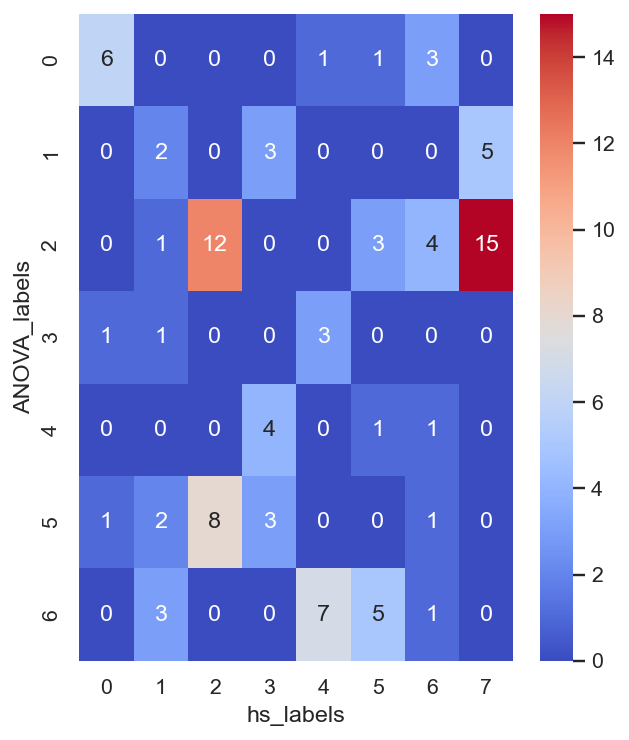

In [58]:
plt.figure(figsize=(5, 6), dpi=70)
sns.set(font_scale=1)
sns.heatmap(pivot_labels_inter, annot=True, cmap = 'coolwarm', fmt=".0f")
plt.grid(False)

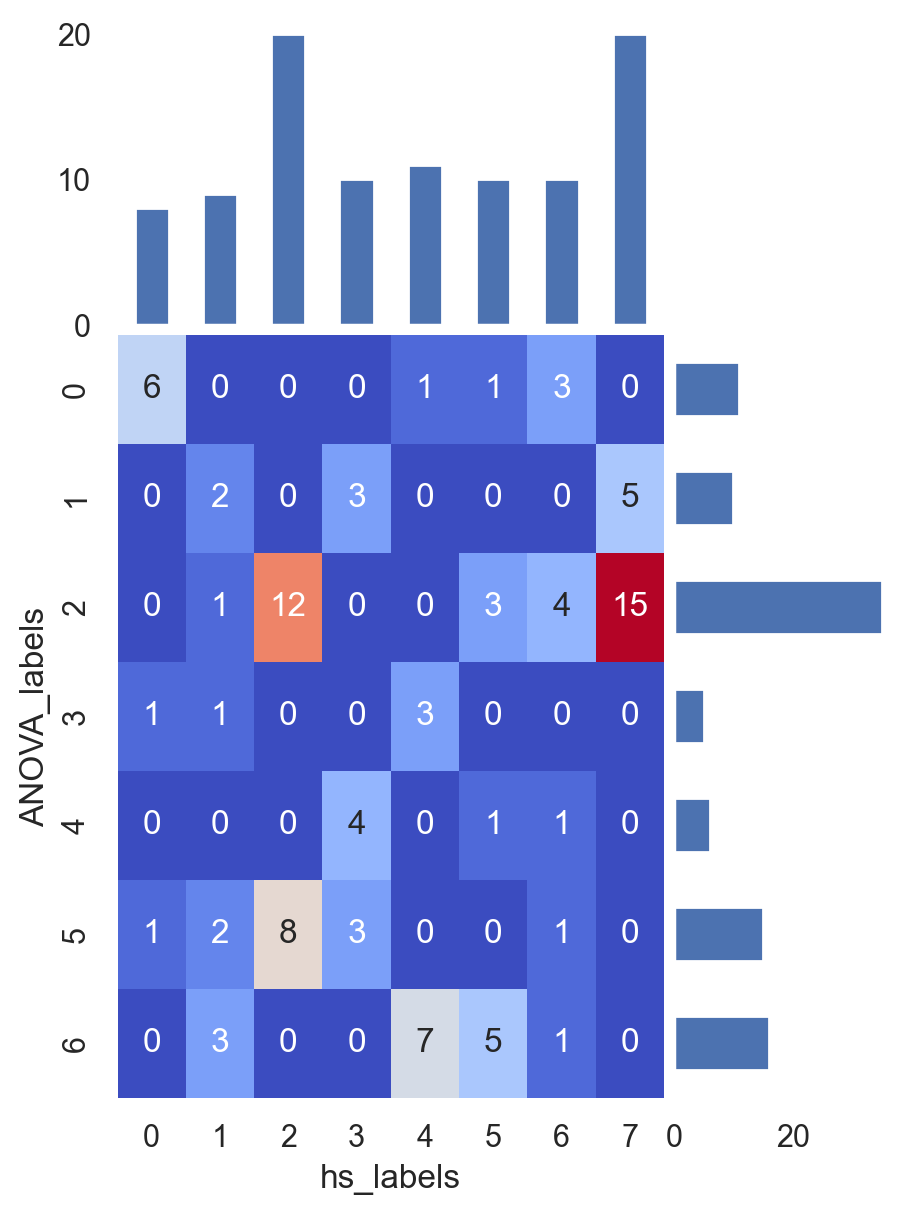

In [59]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(figsize=(5, 7))
sns.heatmap(pivot_labels_inter, annot=True, cmap = 'coolwarm', fmt=".0f", ax=ax, cbar=False)


divider = make_axes_locatable(ax)
cax = divider.append_axes('top', size='40%', pad=0.05)
pivot_labels_inter.sum(axis=0).plot.bar(ax=cax)
cax.set_facecolor(color='white')
cax.get_xaxis().set_visible(False)

cax = divider.append_axes('right', size='40%', pad=0.05)
index_order = pivot_labels_inter.index[::-1]
pivot_labels_inter.sum(axis=1).loc[index_order].plot.barh(ax=cax)
cax.set_facecolor(color='white')
cax.get_yaxis().set_visible(False)

# Functional analysis

In [60]:
import gseapy
#gseapy.get_library_name()

In [61]:
enr_bg = gseapy.enrichr(gene_list=hs_genes.to_list(),
                        gene_sets=['GO_Biological_Process_2021', 'Azimuth_Cell_Types_2021', 'SynGO_2022', 'KEGG_2021_Human'],
                        outdir=None, # don't write to disk
                        background=background_genes
                       ).results

In [62]:
enr_bg[enr_bg['Adjusted P-value'] < 0.05].index.size

4

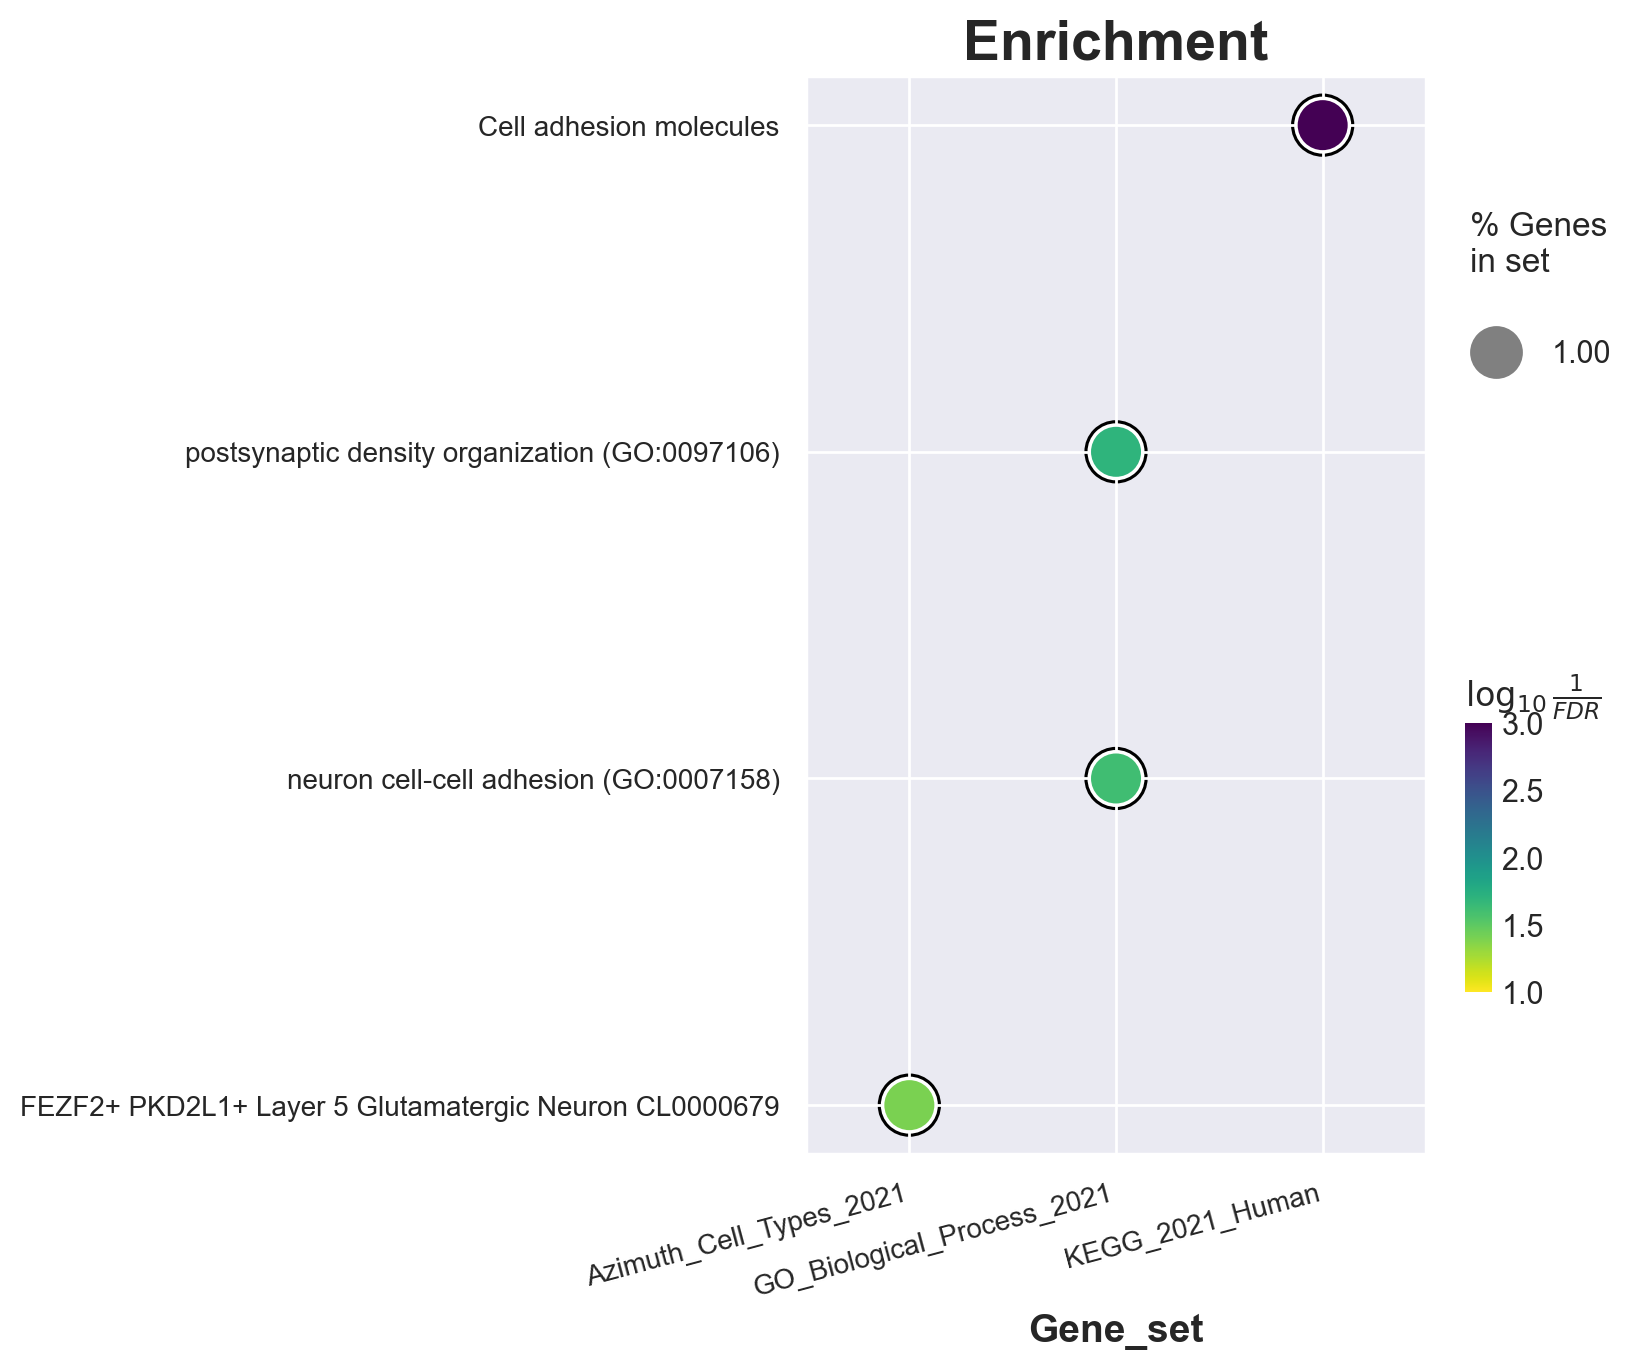

In [63]:
# categorical scatterplot
ax = gseapy.dotplot(enr_bg,
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=3,
              top_term=6,
              figsize=(5,7),
              title = "Enrichment",
              xticklabels_rot=15, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o',
             )

ax.tick_params(axis='both', which='major', labelsize=10)

In [64]:
gene_clust = list()
enrich_results = list()

for label in tqdm(sorted(labels.unique())):
    genes = labels[labels == label].index.tolist()
    descr = f'Genes for spectral clustering ({n_clusters} clusters) of human-specific genes. Cluster label: {label}'
    gene_clust.append(GeneCluster(genes, descr, label, background_genes))
    time.sleep(1)

  0%|          | 0/8 [00:00<?, ?it/s]

## GO_Biological_Process_2021

In [65]:
db_name = 'GO_Biological_Process_2021'
GeneCluster.enrich_geneclusters(gene_clust,db_name )

In [66]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

Rank     p-val  \
Term                                                                 
striated muscle cell development (GO:0055002)          1  0.004447   
fatty acid beta-oxidation using acyl-CoA dehydr...     2  0.005925   
positive regulation of receptor signaling pathw...     3  0.005925   
regulation of translation (GO:0006417)                 4  0.008032   
positive regulation of receptor signaling pathw...     5  0.008876   

                                                       Z-score  \
Term                                                             
striated muscle cell development (GO:0055002)       384.285714   
fatty acid beta-oxidation using acyl-CoA dehydr...  256.142857   
positive regulation of receptor signaling pathw...  256.142857   
regulation of translation (GO:0006417)               18.956989   
positive regulation of receptor signaling pathw...  153.628571   

                                                    Combined score  \
Term                                                                 
striated muscle cell development (GO:0055002)          2081.122420   
fatty acid beta-oxidation using acyl-CoA dehydr...     1313.635373   
positive regulation of receptor signaling pathw...     1313.635373   
regulation of translation (GO:0006417)                   91.453508   
positive regulation of receptor signaling pathw...      725.796409   

                                                   Overlapping genes  \
Term                                                                   
striated muscle cell development (GO:0055002)                [TMOD1]   
fatty acid beta-oxidation using acyl-CoA dehydr...            [ETFB]   
positive regulation of receptor signaling pathw...          [OCIAD2]   
regulation of translation (GO:0006417)                 [ENC1, EIF1B]   
positive regulation of receptor signaling pathw...          [OCIAD2]   

                                                    Adjusted P-value  \
Term                                                                   
striated muscle cell development (GO:0055002)               0.050825   
fatty acid beta-oxidation using acyl-CoA dehydr...          0.050825   
positive regulation of receptor signaling pathw...          0.050825   
regulation of translation (GO:0006417)                      0.050825   
positive regulation of receptor signaling pathw...          0.050825   

                                                    Old p-value  \
Term                                                              
striated muscle cell development (GO:0055002)                 0   
fatty acid beta-oxidation using acyl-CoA dehydr...            0   
positive regulation of receptor signaling pathw...            0   
regulation of translation (GO:0006417)                        0   
positive regulation of receptor signaling pathw...            0   

                                                    Old adjusted p-value  \
Term                                                                       
striated muscle cell development (GO:0055002)                          0   
fatty acid beta-oxidation using acyl-CoA dehydr...                     0   
positive regulation of receptor signaling pathw...                     0   
regulation of translation (GO:0006417)                                 0   
positive regulation of receptor signaling pathw...                     0   

                                                    num_overlap_genes  \
Term                                                                    
striated muscle cell development (GO:0055002)                       1   
fatty acid beta-oxidation using acyl-CoA dehydr...                  1   
positive regulation of receptor signaling pathw...                  1   
regulation of translation (GO:0006417)                              2   
positive regulation of receptor signaling pathw...                  1   

                                                    neg_log10(p_adj)  \
Term      

In [67]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05) & (enrich_res.Rank < 10)].index.unique()
terms.size

39

In [68]:
enrich_res[enrich_res.cluster_label == 5]

Rank     p-val  \
Term                                                                 
positive regulation of execution phase of apopt...     1  0.001855   
hematopoietic stem cell migration (GO:0035701)         2  0.001855   
negative regulation of myelination (GO:0031642)        3  0.003707   
regulation of execution phase of apoptosis (GO:...     4  0.003707   
negative regulation of cellular process (GO:004...     5  0.004244   
...                                                  ...       ...   
cellular protein metabolic process (GO:0044267)      111  0.329461   
negative regulation of transcription by RNA pol...   112  0.338477   
protein ubiquitination (GO:0016567)                  113  0.366107   
negative regulation of transcription, DNA-templ...   114  0.451591   
regulation of transcription by RNA polymerase I...   115  0.668516   

                                                       Z-score  \
Term                                                             
positive regulation of execution phase of apopt...         inf   
hematopoietic stem cell migration (GO:0035701)             inf   
negative regulation of myelination (GO:0031642)     597.666667   
regulation of execution phase of apoptosis (GO:...  597.666667   
negative regulation of cellular process (GO:004...   11.967742   
...                                                        ...   
cellular protein metabolic process (GO:0044267)       2.735450   
negative regulation of transcription by RNA pol...    2.643625   
protein ubiquitination (GO:0016567)                   2.390051   
negative regulation of transcription, DNA-templ...    1.798722   
regulation of transcription by RNA polymerase I...    0.952550   

                                                    Combined score  \
Term                                                                 
positive regulation of execution phase of apopt...             inf   
hematopoietic stem cell migration (GO:0035701)                 inf   
negative regulation of myelination (GO:0031642)        3345.390618   
regulation of execution phase of apoptosis (GO:...     3345.390618   
negative regulation of cellular process (GO:004...       65.371539   
...                                                            ...   
cellular protein metabolic process (GO:0044267)           3.037161   
negative regulation of transcription by RNA pol...        2.863836   
protein ubiquitination (GO:0016567)                       2.401593   
negative regulation of transcription, DNA-templ...        1.429944   
regulation of transcription by RNA polymerase I...        0.383588   

                                                       Overlapping genes  \
Term                                                                       
positive regulation of execution phase of apopt...                [DLC1]   
hematopoietic stem cell migration (GO:0035701)                    [JAM2]   
negative regulation of myelination (GO:0031642)                   [JAM2]   
regulation of execution phase of apoptosis (GO:...                [DLC1]   
negative regulation of cellular process (GO:004...  [DLC1, IGFBP6, JAM2]   
...                                                                  ...   
cellular protein metabolic process (GO:0044267)                 [IGFBP6]   
negative regulation of transcription by RNA pol...               [PCGF2]   
protein ubiquitination (GO:0016567)                              [RNF40]   
negative regulation of transcription, DNA-templ...               [PCGF2]   
regulation of transcription by RNA polymerase I...               [PCGF2]   

                                                    Adjusted P-value  \
Term                                                                   
positive regulation of execution phase of apopt...          0.047294   
hematopoietic stem cell migration (GO:0035701)              0.047294   
negative regulation of myelination (GO:0031642)             0.047294   
regulation of executio

In [69]:
from pandas.api.types import CategoricalDtype
enrich_res_plot = enrich_res.loc[terms].copy()
cat_type = CategoricalDtype(categories=['No significance', 'p < 0.05', 'p < 0.01', 'p < 0.001'], ordered=True)
enrich_res_plot['p-value'] = enrich_res_plot['Adjusted P-value'].apply(p_val_group).astype(cat_type)
enrich_results.append(enrich_res_plot)

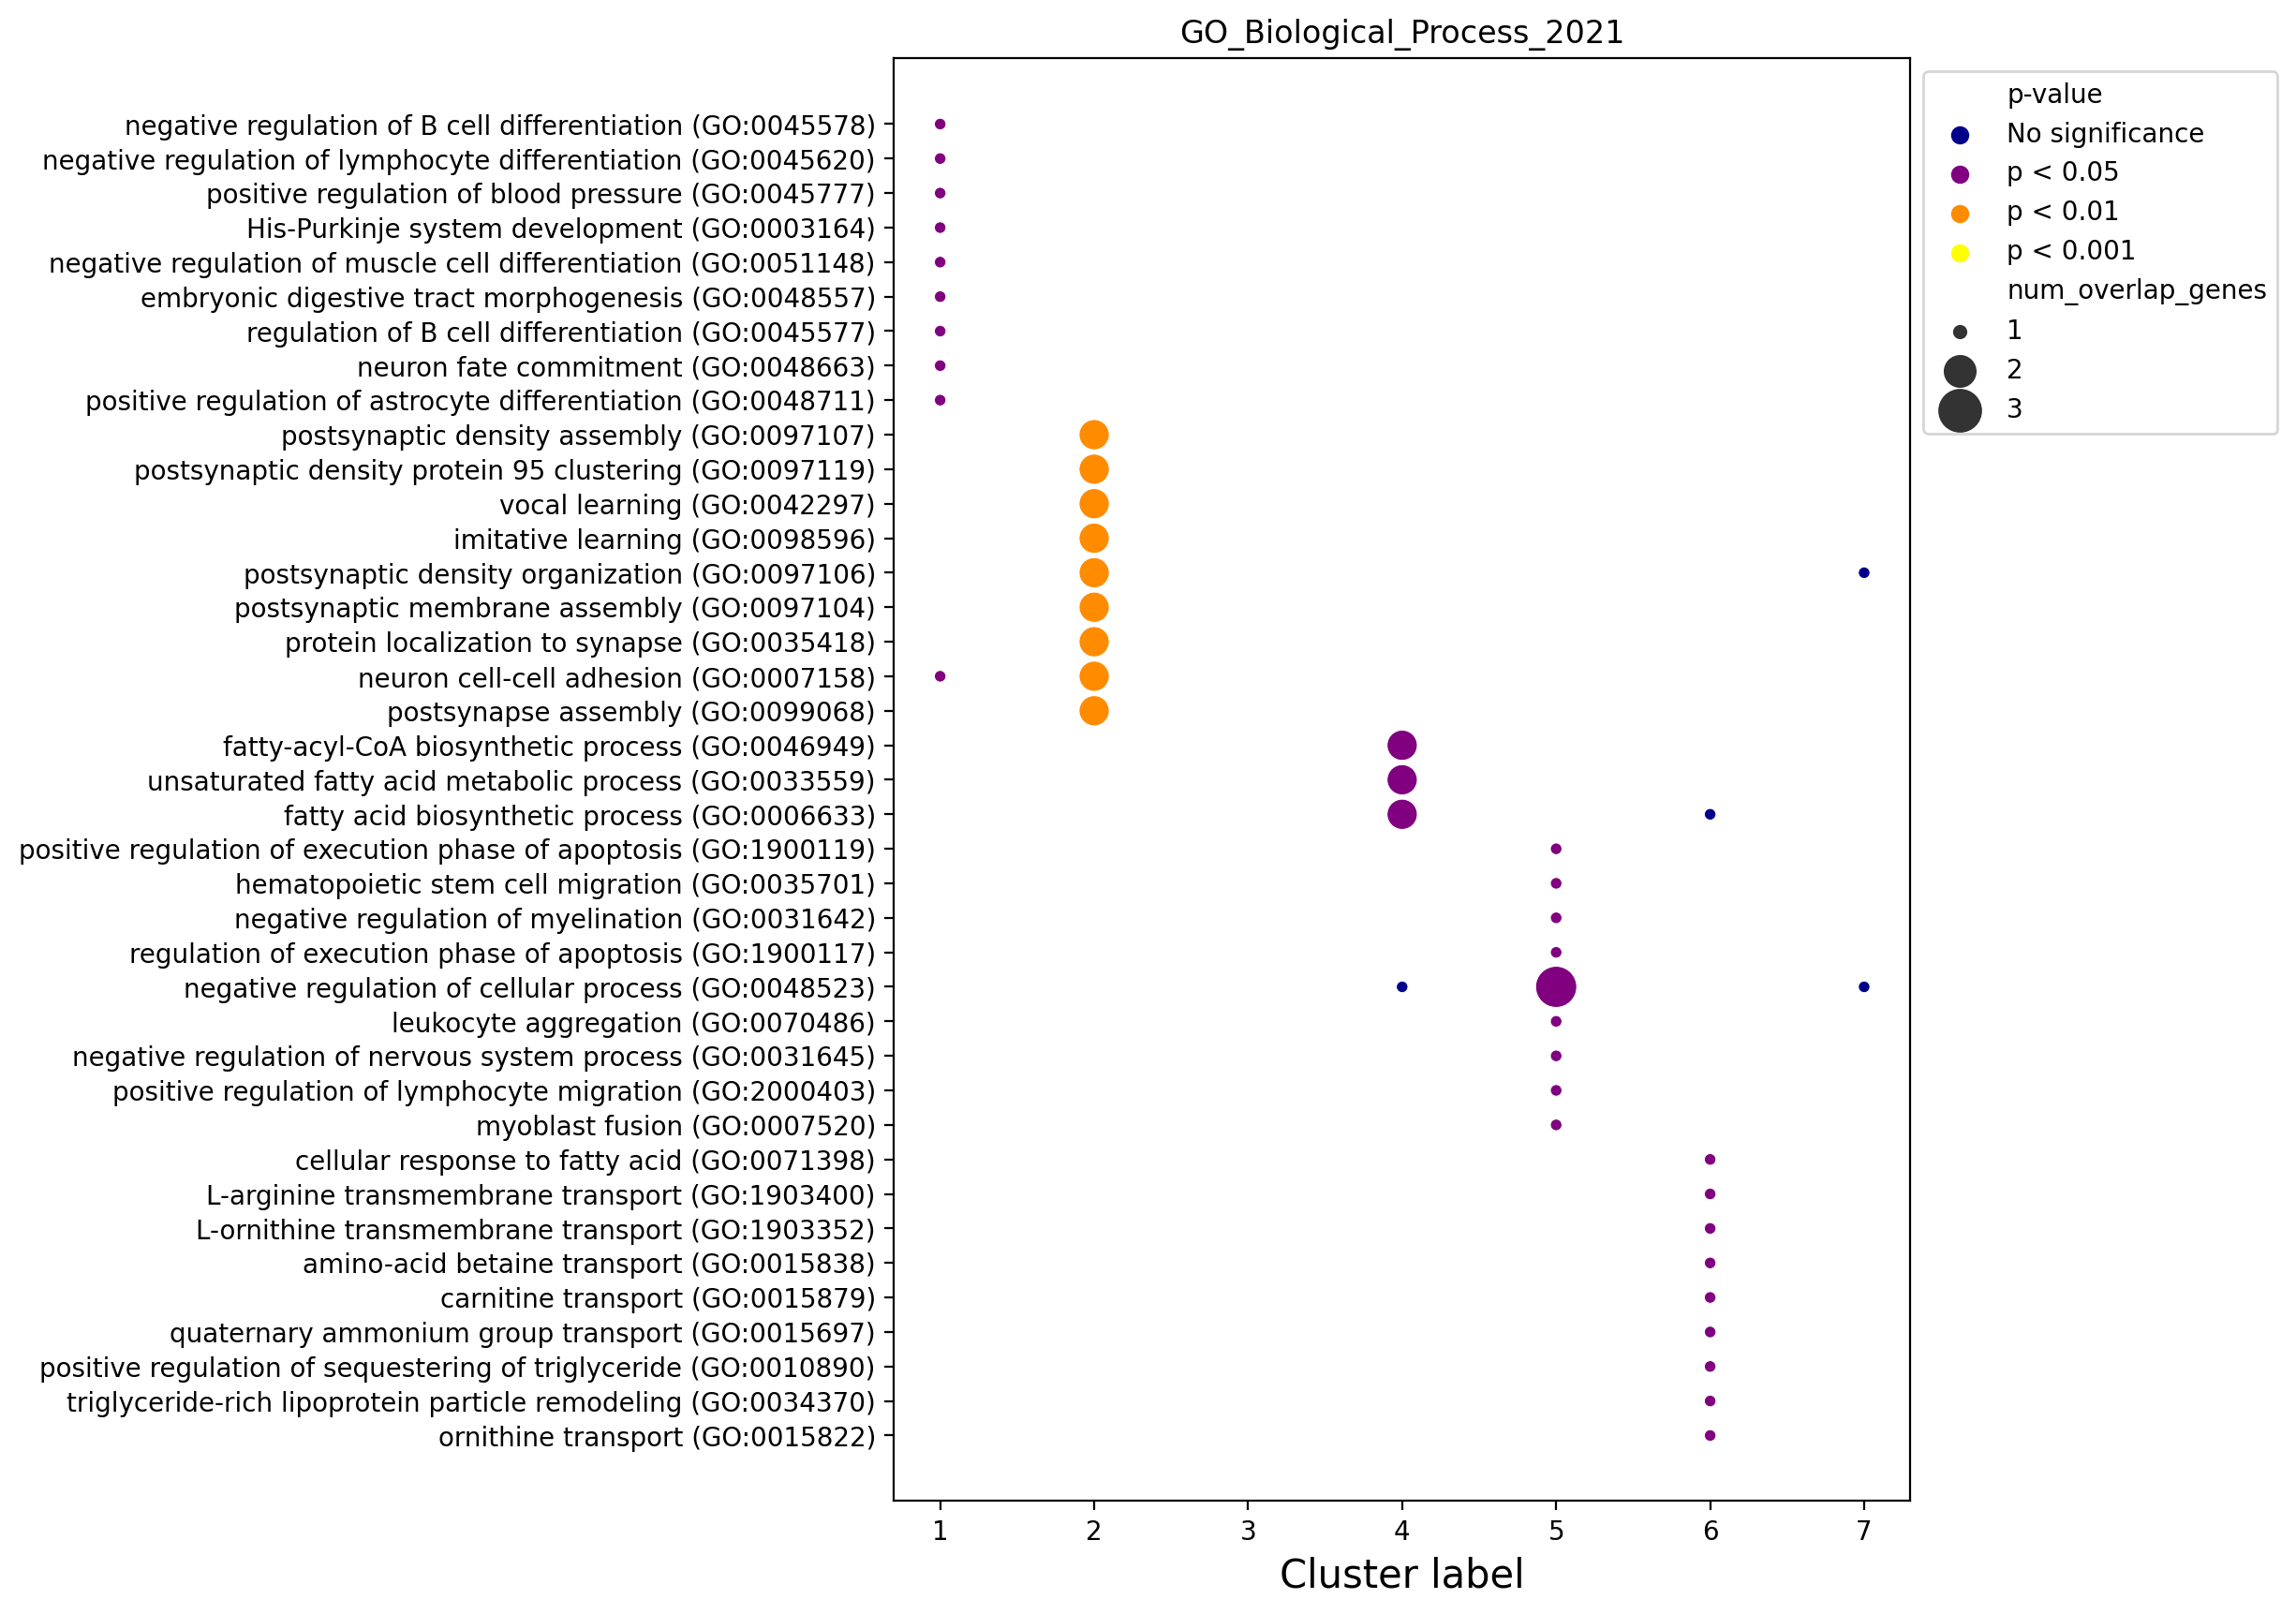

In [70]:
mpl.rcdefaults()
fig = plt.figure(figsize=(7, 10), dpi=100)

ax = sns.scatterplot(
    data=enrich_res_plot.reset_index(),
    x='cluster_label',
    y='Term',
    size='num_overlap_genes',
    sizes=(20, 250),
    hue='p-value',
    palette=color_discrete_map
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## Azimuth Cell Types 2021


In [71]:
db_name = 'Azimuth_Cell_Types_2021'
GeneCluster.enrich_geneclusters(gene_clust, db_name)

In [72]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

Rank     p-val     Z-score  \
Term                                                                            
LINC00507+ GLRA3+ Layer 2 Glutamatergic Neuron ...    1  0.002966  768.714286   
Layer 2-3 Glutamatergic Neuron, Intratelencepha...    2  0.004447  384.285714   
Gamma Islet Cell CL0002275                            1  0.003337  672.500000   
RORB+ OTOGL+ Layer 3 Glutamatergic Neuron CL000...    2  0.003337  672.500000   
VIP+ TAC3+ Layer 3-5 GABAergic Neuron CL0000617       3  0.005002  336.187500   

                                                    Combined score  \
Term                                                                 
LINC00507+ GLRA3+ Layer 2 Glutamatergic Neuron ...     4474.207582   
Layer 2-3 Glutamatergic Neuron, Intratelencepha...     2081.122420   
Gamma Islet Cell CL0002275                             3835.057003   
RORB+ OTOGL+ Layer 3 Glutamatergic Neuron CL000...     3835.057003   
VIP+ TAC3+ Layer 3-5 GABAergic Neuron CL0000617        1781.108678   

                                                   Overlapping genes  \
Term                                                                   
LINC00507+ GLRA3+ Layer 2 Glutamatergic Neuron ...            [ENC1]   
Layer 2-3 Glutamatergic Neuron, Intratelencepha...            [ENC1]   
Gamma Islet Cell CL0002275                                     [ID2]   
RORB+ OTOGL+ Layer 3 Glutamatergic Neuron CL000...           [NCAM2]   
VIP+ TAC3+ Layer 3-5 GABAergic Neuron CL0000617              [NCAM2]   

                                                    Adjusted P-value  \
Term                                                                   
LINC00507+ GLRA3+ Layer 2 Glutamatergic Neuron ...          0.004447   
Layer 2-3 Glutamatergic Neuron, Intratelencepha...          0.004447   
Gamma Islet Cell CL0002275                                  0.006669   
RORB+ OTOGL+ Layer 3 Glutamatergic Neuron CL000...          0.006669   
VIP+ TAC3+ Layer 3-5 GABAergic Neuron CL0000617             0.006669   

                                                   Old p-value  \
Term                                                             
LINC00507+ GLRA3+ Layer 2 Glutamatergic Neuron ...           0   
Layer 2-3 Glutamatergic Neuron, Intratelencepha...           0   
Gamma Islet Cell CL0002275                                   0   
RORB+ OTOGL+ Layer 3 Glutamatergic Neuron CL000...           0   
VIP+ TAC3+ Layer 3-5 GABAergic Neuron CL0000617              0   

                                                   Old adjusted p-value  \
Term                                                                      
LINC00507+ GLRA3+ Layer 2 Glutamatergic Neuron ...                    0   
Layer 2-3 Glutamatergic Neuron, Intratelencepha...                    0   
Gamma Islet Cell CL0002275                                            0   
RORB+ OTOGL+ Layer 3 Glutamatergic Neuron CL000...                    0   
VIP+ TAC3+ Layer 3-5 GABAergic Neuron CL0000617                       0   

                                                   num_overlap_genes  \
Term                                                                   
LINC00507+ GLRA3+ Layer 2 Glutamatergic Neuron ...                 1   
Layer 2-3 Glutamatergic Neuron, Intratelencepha...                 1   
Gamma Islet Cell CL0002275                                         1   
RORB+ OTOGL+ Layer 3 Glutamatergic Neuron CL000...                 1   
VIP+ TAC3+ Layer 3-5 GABAergic Neuron CL0000617                    1   

                                                    neg_log10(p_adj)  \
Term                                                                   
LINC00507+ GLRA3+ Layer 2 Glutamatergic Neuron ...          2.351948   
Layer 2-3 Glutamatergic Neuron, Intratelencepha...          2.351948   
Gamma Islet Cell CL0002275                                  2.175937   
RORB+ OTOGL+ Layer 3 Glutamatergic Neuron CL000...          2.175937   
VIP+ TAC3+ Layer 3-5 GABAergic Neuron CL0000617         

In [73]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05) & (enrich_res.Rank < 10)].index.unique()
terms.size

27

In [74]:
from pandas.api.types import CategoricalDtype
enrich_res_plot = enrich_res.loc[terms].copy()
cat_type = CategoricalDtype(categories=['No significance', 'p < 0.05', 'p < 0.01', 'p < 0.001'], ordered=True)
enrich_res_plot['p-value'] = enrich_res_plot['Adjusted P-value'].apply(p_val_group).astype(cat_type)
enrich_results.append(enrich_res_plot)

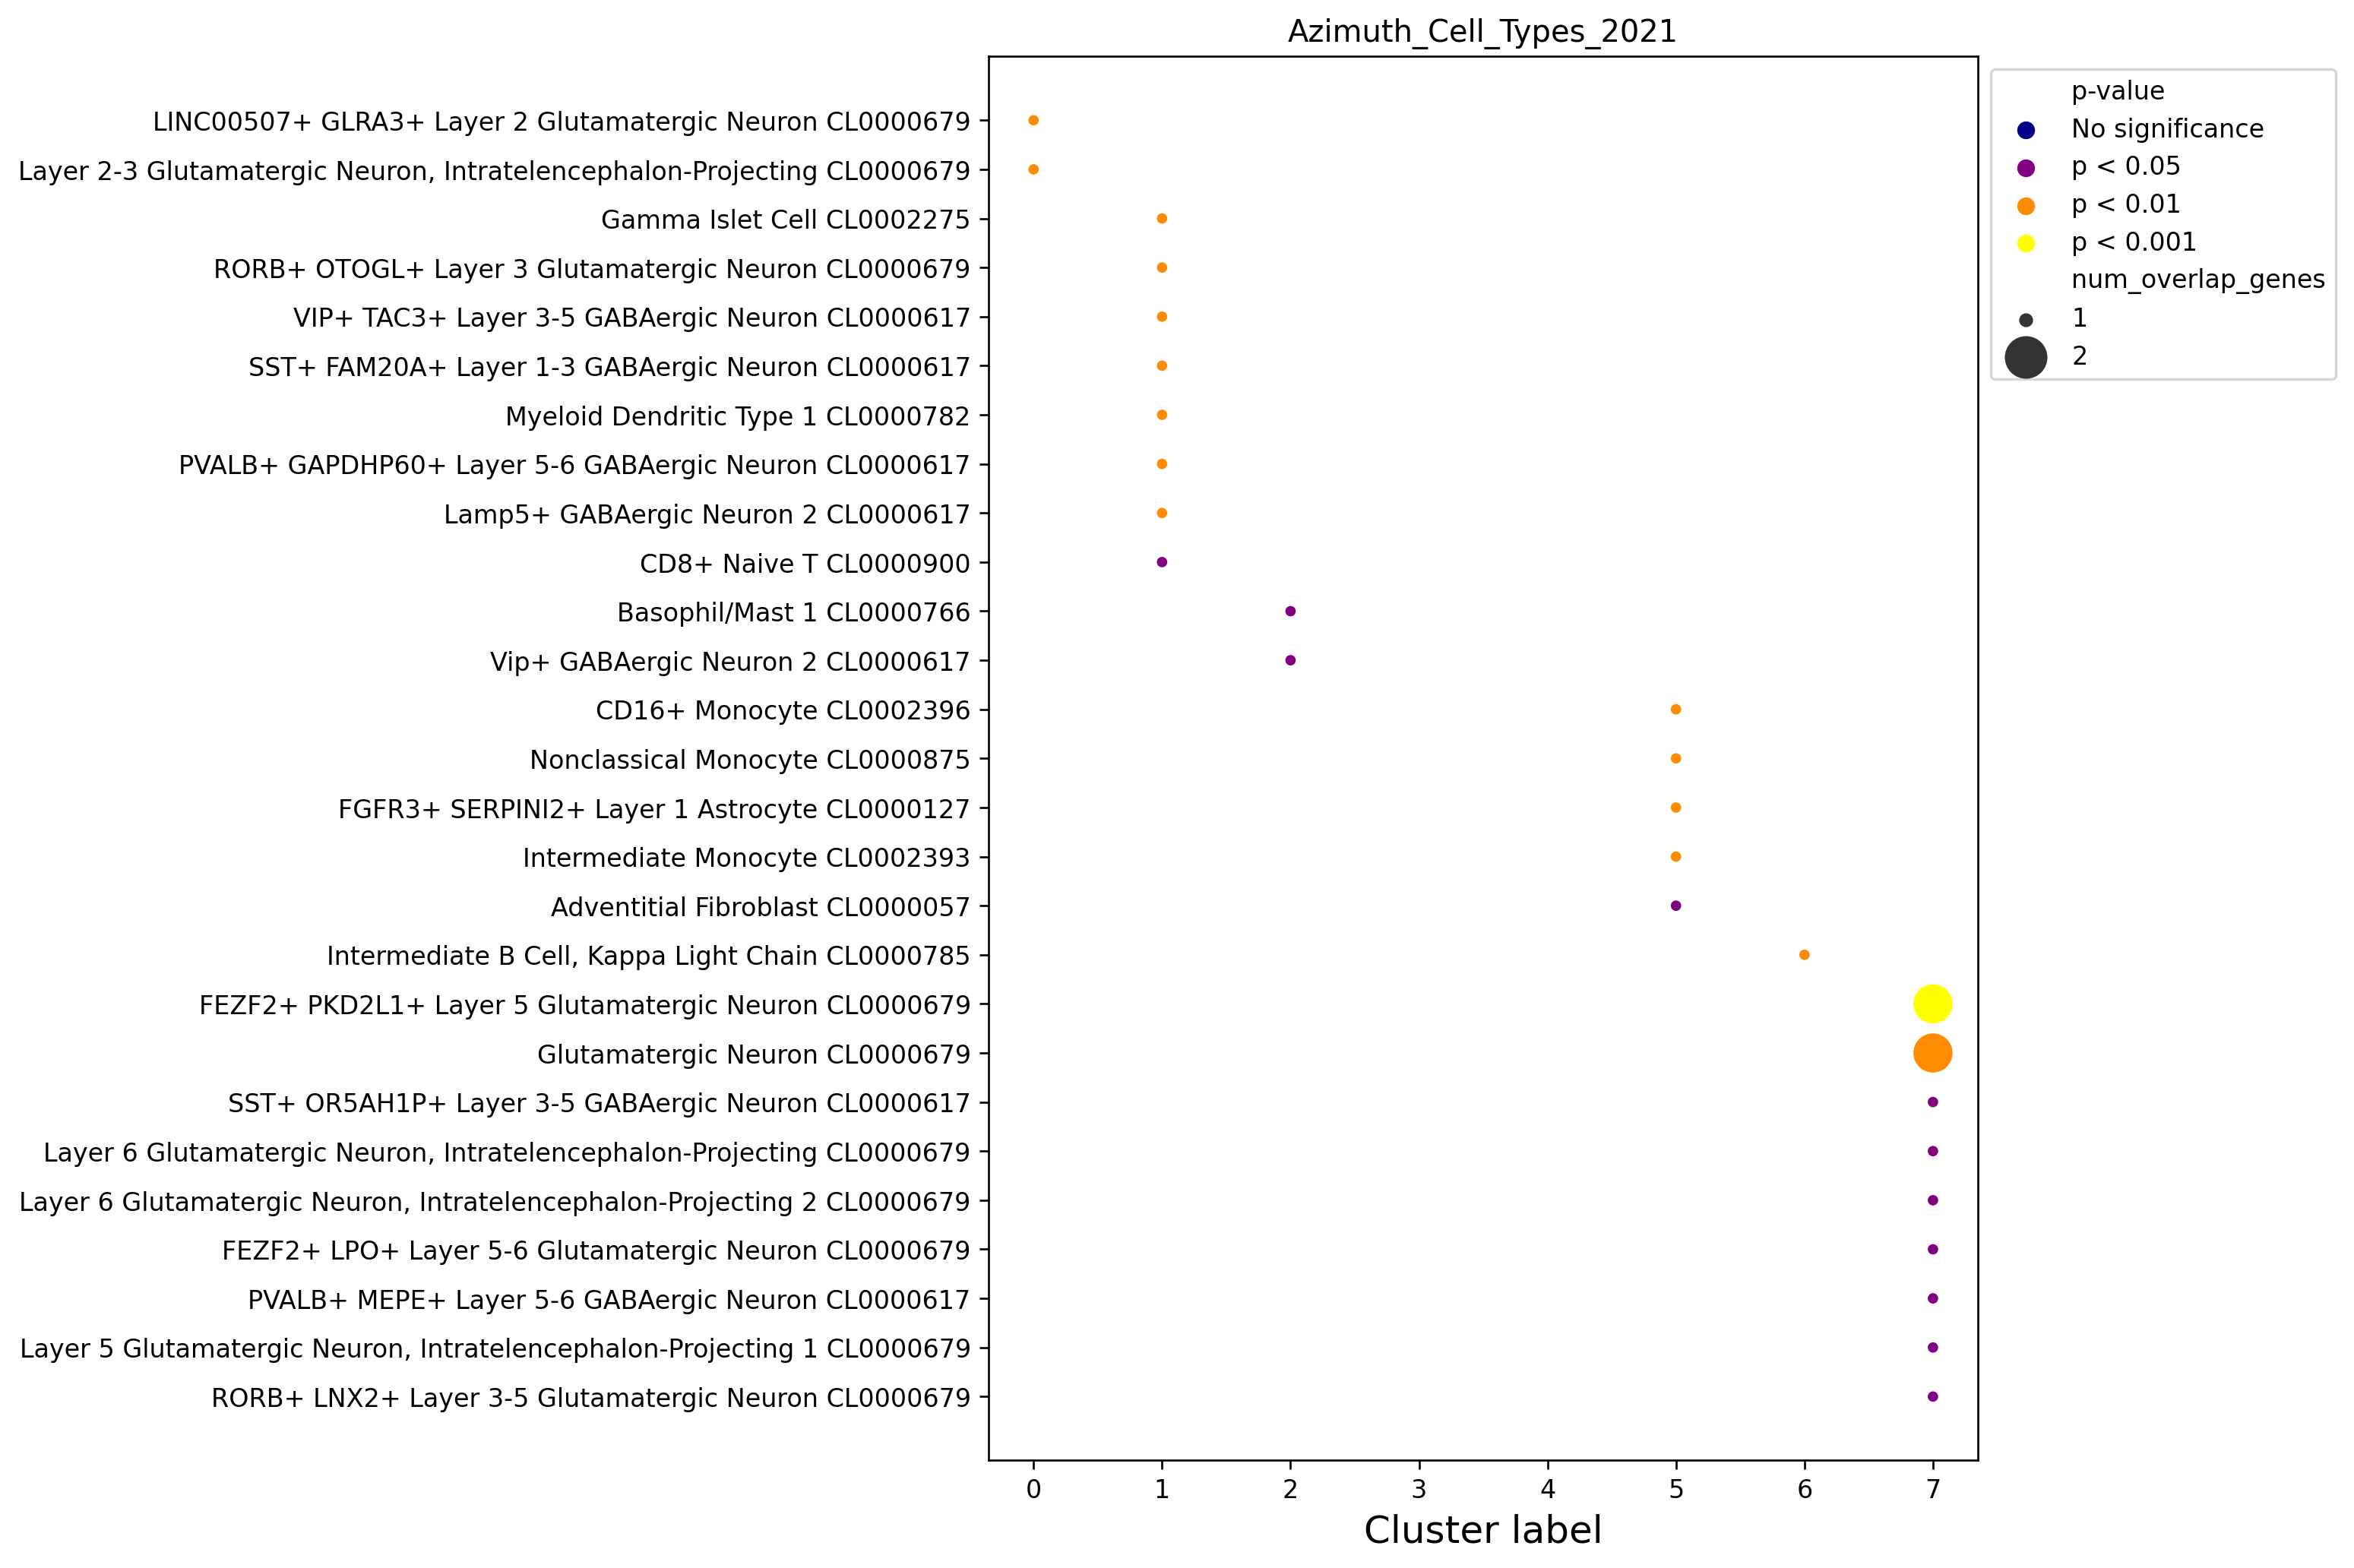

In [75]:
mpl.rcdefaults()
fig = plt.figure(figsize=(7, 10), dpi=120)

ax = sns.scatterplot(
    data=enrich_res_plot.reset_index(),
    x='cluster_label',
    y='Term',
    size='num_overlap_genes',
    sizes=(20, 250),
    hue='p-value',
    palette=color_discrete_map
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## Cell types from MTG

In [76]:
# load celltypes from DOI: 10.1126/science.ade9516
cell_types_df = pd.read_csv('results/celltypes.csv')
# Replace incorrect cell-type name
cell_types_df.cluster.replace({'L5/6 IT Car3': 'L6 IT Car3'}, inplace=True)

In [77]:
# load celltype information from DOI: 10.1126/science.ade9516
cell_type_colors = pd.read_csv('results/colors.csv', index_col=2)
cell_type_colors = cell_type_colors['subclass_color']
cell_type_colors.index = cell_type_colors.index.map(lambda x: x[:-2])
cell_type_colors.drop_duplicates(inplace=True)
# replace all non-matching symbols
#cell_type_colors.index = cell_type_colors.index.str.replace(' ', '').str.replace('_', '').str.replace('/', '').str.replace('-', '')

In [78]:
cell_types_df.head()

species cluster   gene  avg_log2FC  pct.1  pct.2          p_val  \
0   chimp   Astro  A2ML1    0.497248  0.147  0.043   4.130000e-64   
1   chimp   Astro   AACS   -0.423567  0.085  0.552  8.730000e-148   
2   chimp   Astro   AAK1   -0.806894  0.604  0.963  3.430000e-191   
3   chimp   Astro   AASS    1.180879  0.413  0.055   0.000000e+00   
4   chimp   Astro   AATK   -0.439741  0.068  0.548  1.590000e-160   

       p_val_adj  
0   2.350000e-59  
1  4.970000e-143  
2  1.950000e-186  
3   0.000000e+00  
4  9.070000e-156

In [79]:
# filter genes
pct_tr = 0.3
lfc_tr = 1.5
rank_tr = 70

filter = ((cell_types_df.species == 'human') & (cell_types_df.avg_log2FC.abs() > lfc_tr) & (cell_types_df['pct.1'] > pct_tr) & (cell_types_df['pct.2'] > pct_tr))
cell_types_df_hum = cell_types_df[filter].copy()
cell_types_df_hum['lfc_abs'] = cell_types_df_hum.avg_log2FC.abs()
cell_types_df_hum['rank'] = cell_types_df_hum.groupby('cluster').lfc_abs.rank()
#cell_types_df_hum[cell_types_df_hum['rank'] < 40].groupby('cluster').gene.count()
marker_gene_count = cell_types_df_hum.groupby('cluster').gene.count().to_frame(name='marker gene count')

cell_types_df_hum = cell_types_df_hum[cell_types_df_hum['rank'] <= rank_tr]
marker_gene_count['after treashold'] =  cell_types_df_hum.groupby('cluster').gene.count()
marker_gene_count

marker gene count  after treashold
cluster                                       
Astro                     132               70
Chandelier                 60               60
Endo                      133               70
L2/3 IT                    27               27
L4 IT                      23               23
L5 ET                      54               54
L5 IT                      34               34
L5/6 NP                    49               49
L6 CT                      50               50
L6 IT                      26               26
L6 IT Car3                 55               55
L6b                        41               41
Lamp5                      58               58
Lamp5_Lhx6                 74               70
Micro-PVM                 135               70
OPC                       100               70
Oligo                     158               70
Pax6                       43               43
Pvalb                      23               23
Sncg                       38               38
Sst                        27               27
Sst Chodl                  38               38
VLMC                       95               70
Vip                        25               25

<Axes: xlabel='count', ylabel='cluster'>

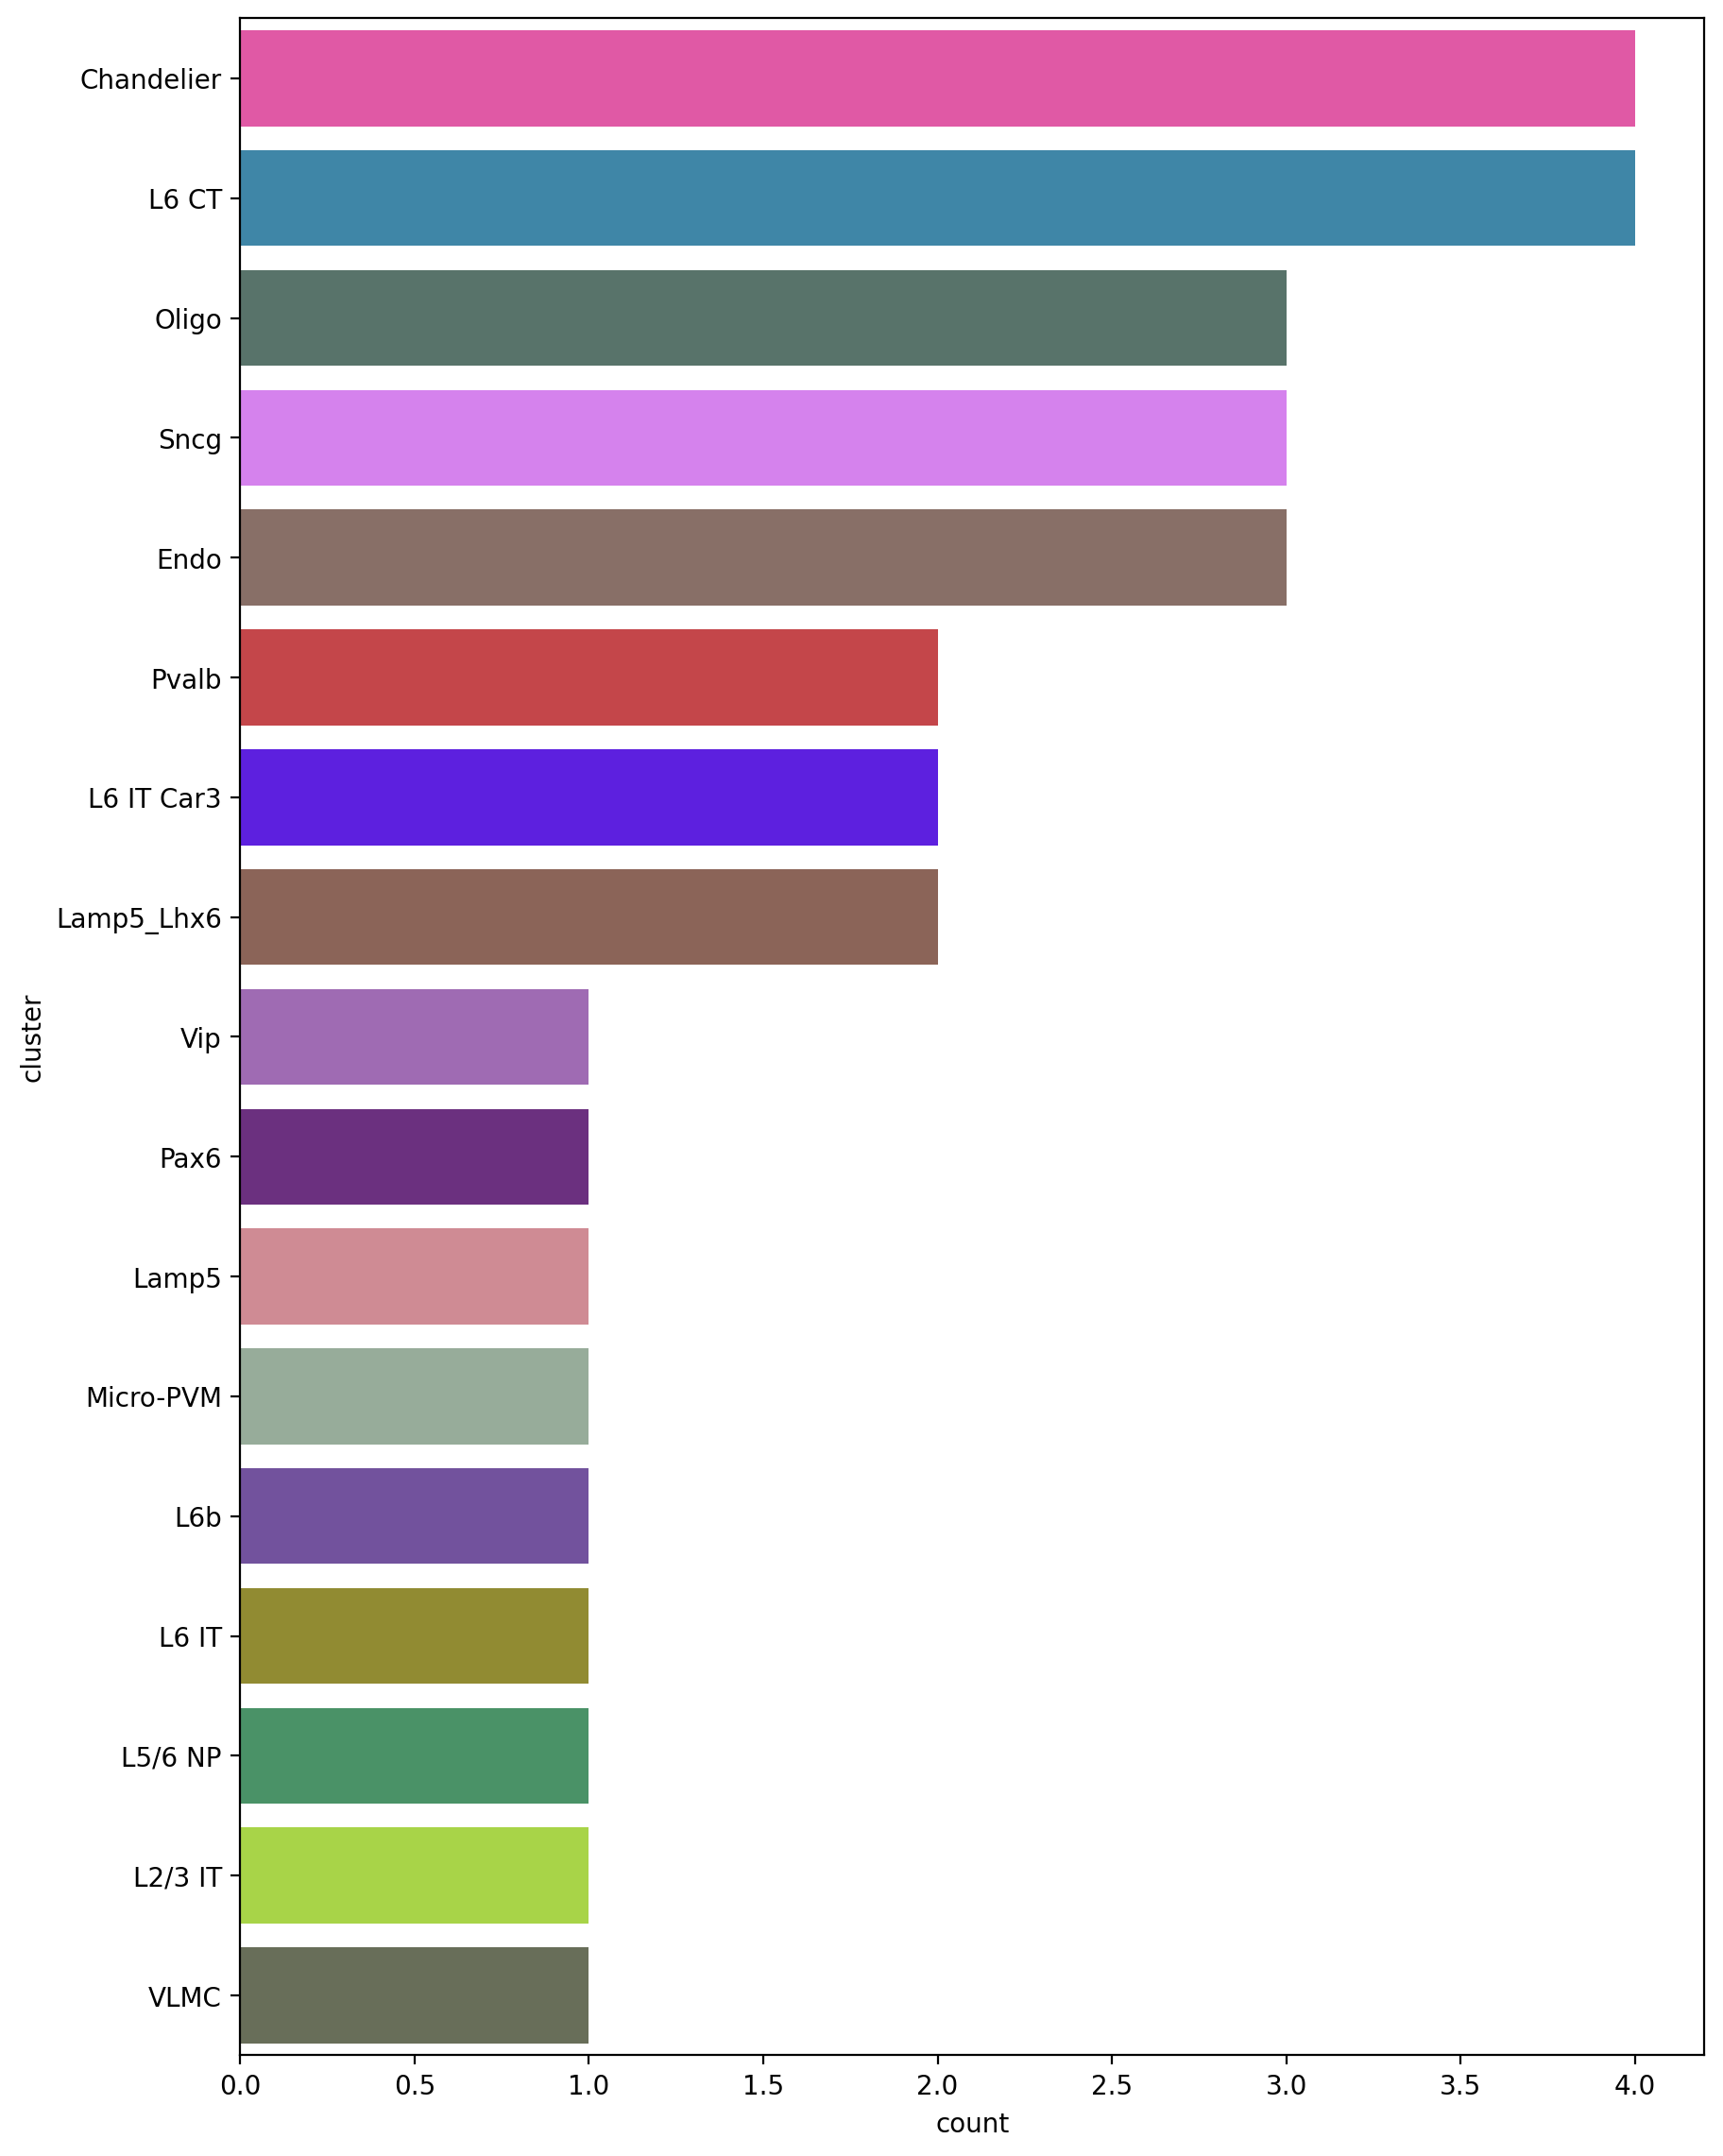

In [80]:
fig, axes = plt.subplots(figsize=(10, 14))

cell_type_colors_pal = cell_type_colors.to_dict()
count_df = cell_types_df_hum[cell_types_df_hum.gene.isin(hs_genes)].cluster.value_counts()
sns.barplot(count_df.to_frame().reset_index(), y='cluster', x='count', ax=axes, palette=cell_type_colors_pal)

In [81]:
index = cell_types_df_hum.cluster.unique()
cluster_celltype = pd.DataFrame(index=index)

for label in sorted(labels.unique()):
    genes = labels[labels == label].index.tolist()
    counts = cell_types_df_hum[cell_types_df_hum.gene.isin(genes)].cluster.value_counts(sort=False)
    cluster_celltype[f'cluster {label}'] = 0
    cluster_celltype.loc[counts.index, f'cluster {label}'] = counts
cluster_celltype.head()

cluster 0  cluster 1  cluster 2  cluster 3  cluster 4  cluster 5  \
Astro               0          0          0          0          0          0   
Chandelier          0          1          1          0          0          0   
Endo                0          0          1          0          0          0   
L2/3 IT             1          0          0          0          0          0   
L4 IT               0          0          0          0          0          0   

            cluster 6  cluster 7  
Astro               0          0  
Chandelier          0          2  
Endo                0          2  
L2/3 IT             0          0  
L4 IT               0          0

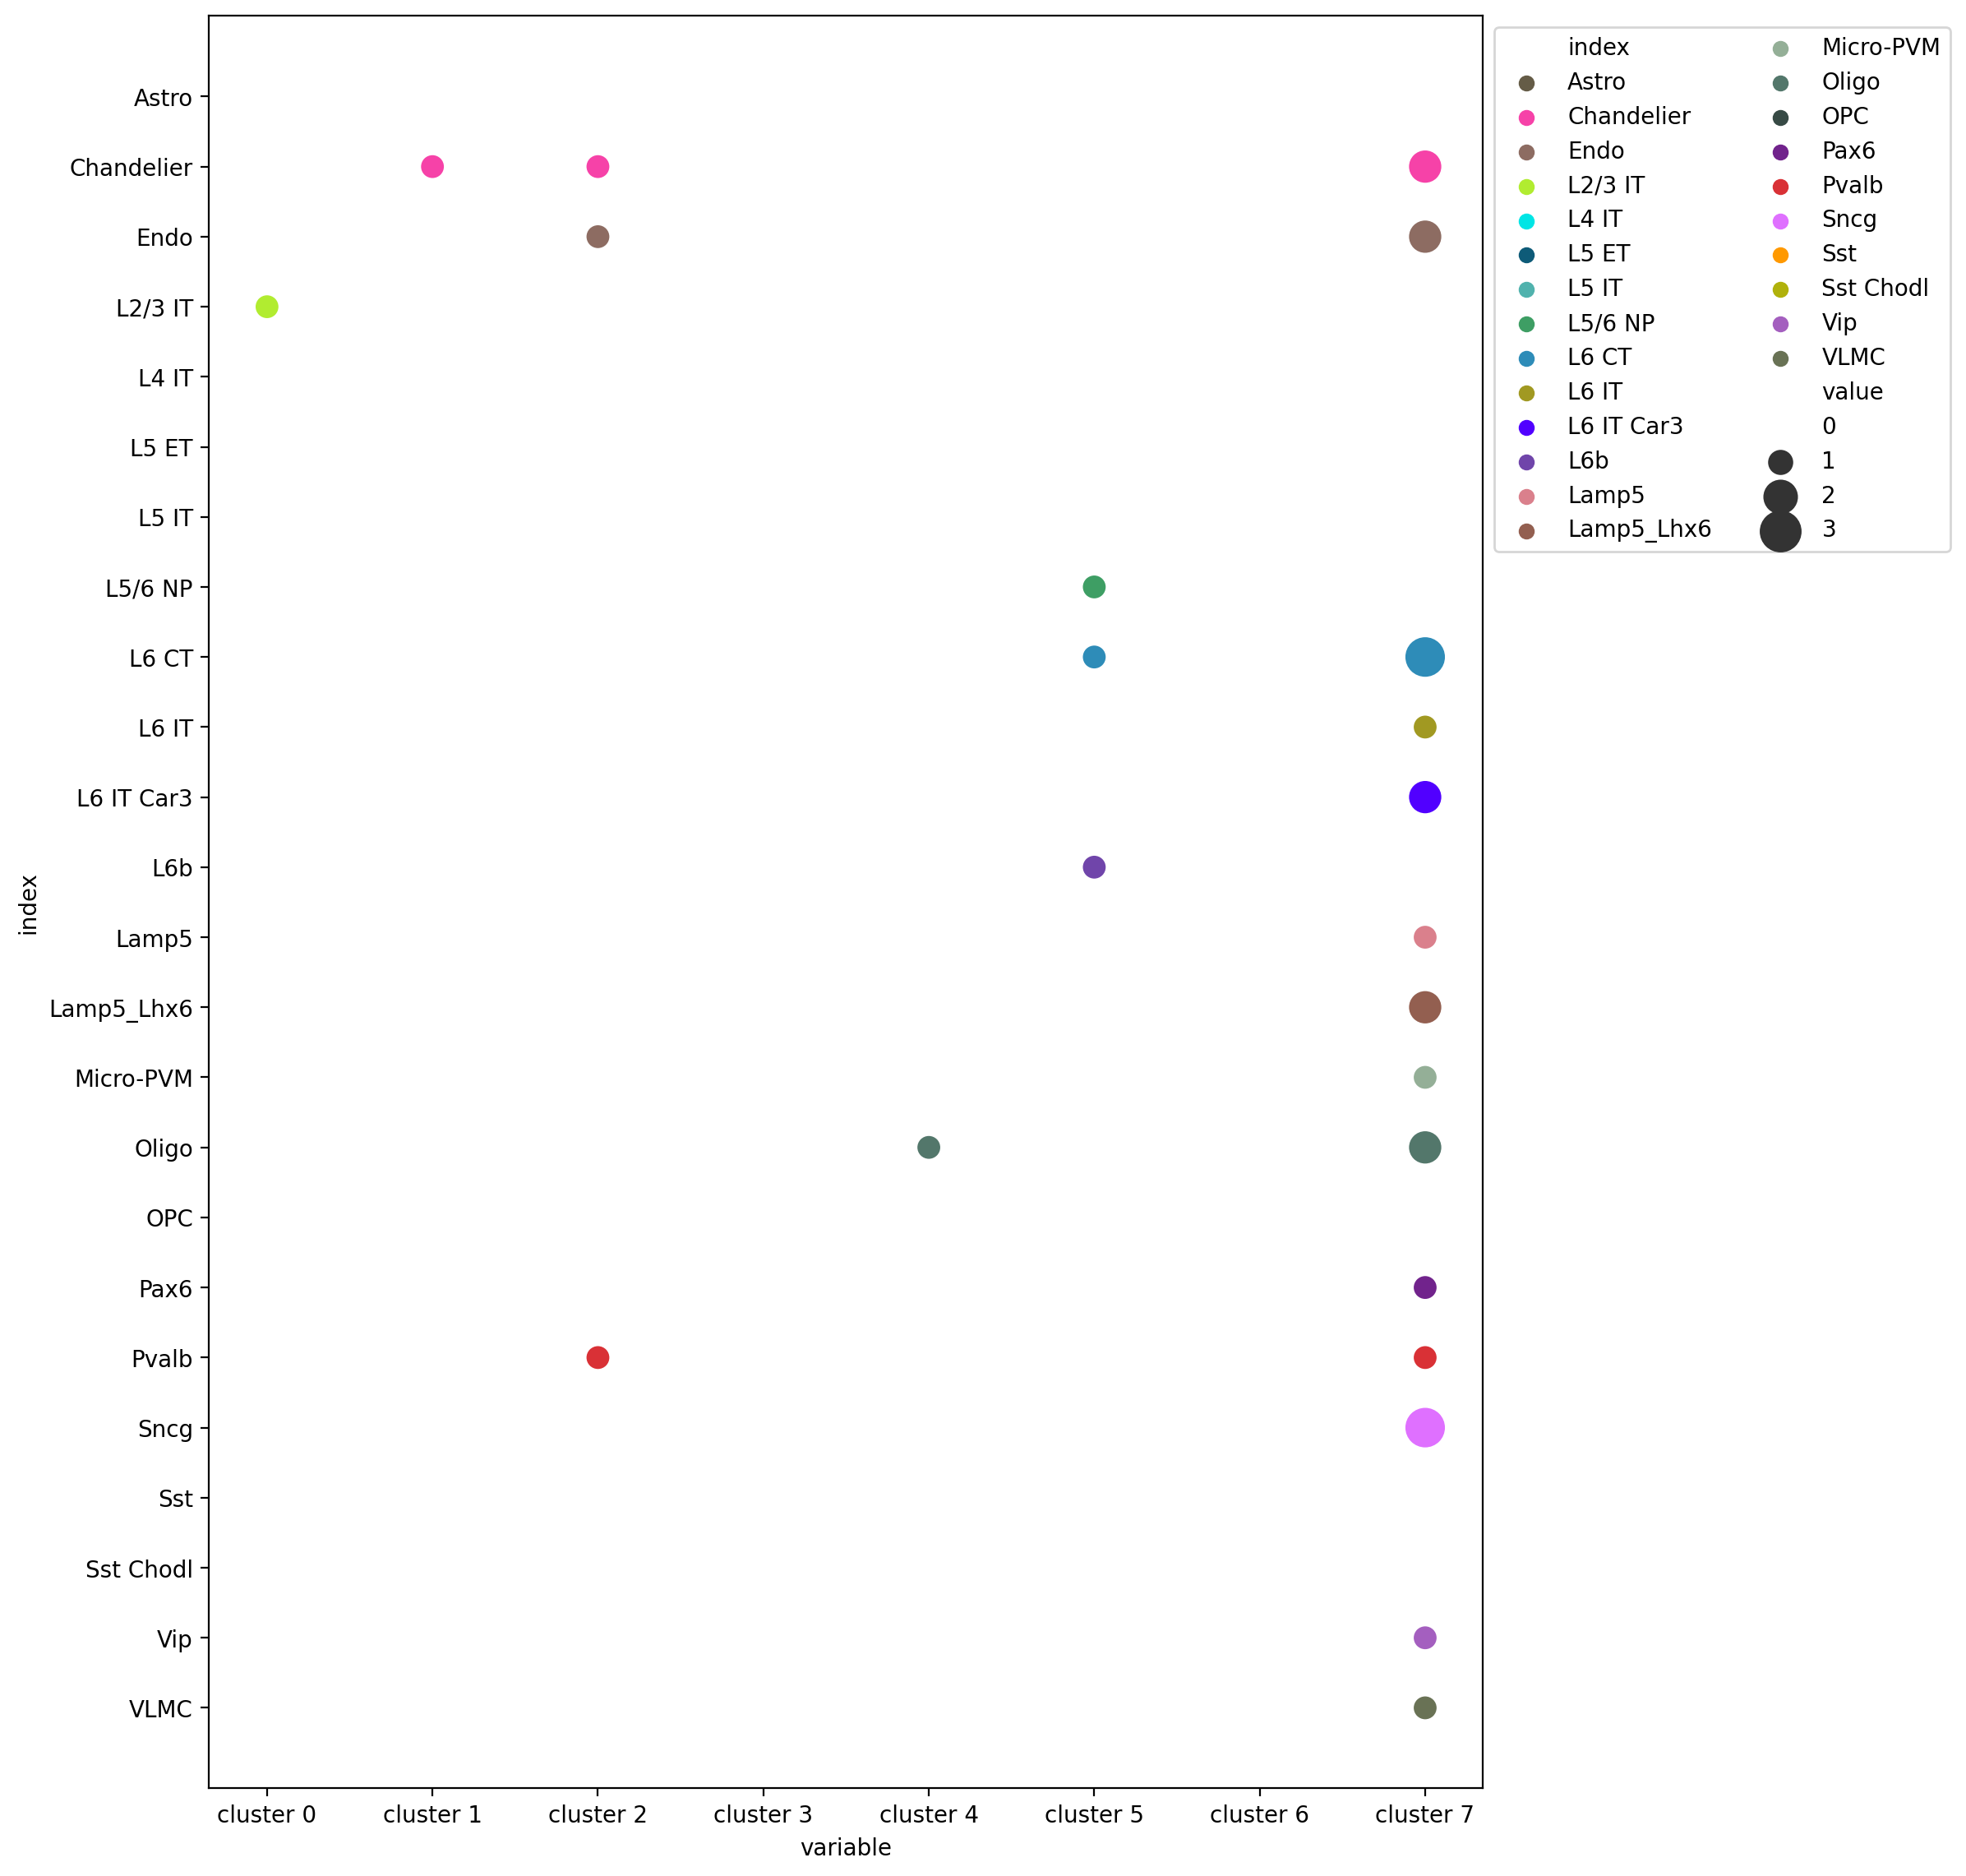

In [82]:
fig, axes = plt.subplots(figsize=(10, 14))
cell_type_count = cluster_celltype.reset_index().melt(id_vars=['index'], value_vars=cluster_celltype.columns)
sns.scatterplot(cell_type_count,
                y='index',
                x='variable',
                size='value',
                palette=cell_type_colors_pal,
                hue='index',
                sizes=(0, 300))
axes.legend(ncols=2, loc="upper left", bbox_to_anchor=(1, 1))
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [83]:
def enrich_genes(gene_list, gene_sets, label):
    results = gseapy.enrich(gene_list=gene_list, # or gene_list=glist
                           gene_sets=gene_sets, # kegg is a dict object
                           background=background_genes, # or "hsapiens_gene_ensembl", or int, or text file, or a list of genes
                           outdir=None,
                           verbose=True).results
    results[f'cluster_label'] = label
    results['num_overlap_genes'] = results.Overlap.apply(lambda x: x.split('/')[0]).astype(int)
    return results

In [84]:
cell_types_genes = cell_types_df_hum.groupby('cluster').gene.apply(lambda x: list(x)).to_dict()

# check if calculated correctly
assert(cell_types_genes['Astro'] == cell_types_df_hum[cell_types_df_hum.cluster == 'Astro'].gene.to_list())

In [85]:
results = gseapy.enrich(gene_list=labels.index.to_list(), # or gene_list=glist
                           gene_sets=cell_types_genes, # kegg is a dict object
                           background=background_genes, # or "hsapiens_gene_ensembl", or int, or text file, or a list of genes
                           outdir=None,
                           verbose=True).results

2023-12-07 22:18:16,129 [INFO] Input dict object named with gs_ind_0
2023-12-07 22:18:16,130 [INFO] Run: gs_ind_0 
2023-12-07 22:18:16,144 [INFO] Done.


<Axes: title={'center': 'Cell types'}, xlabel='Combined Score'>

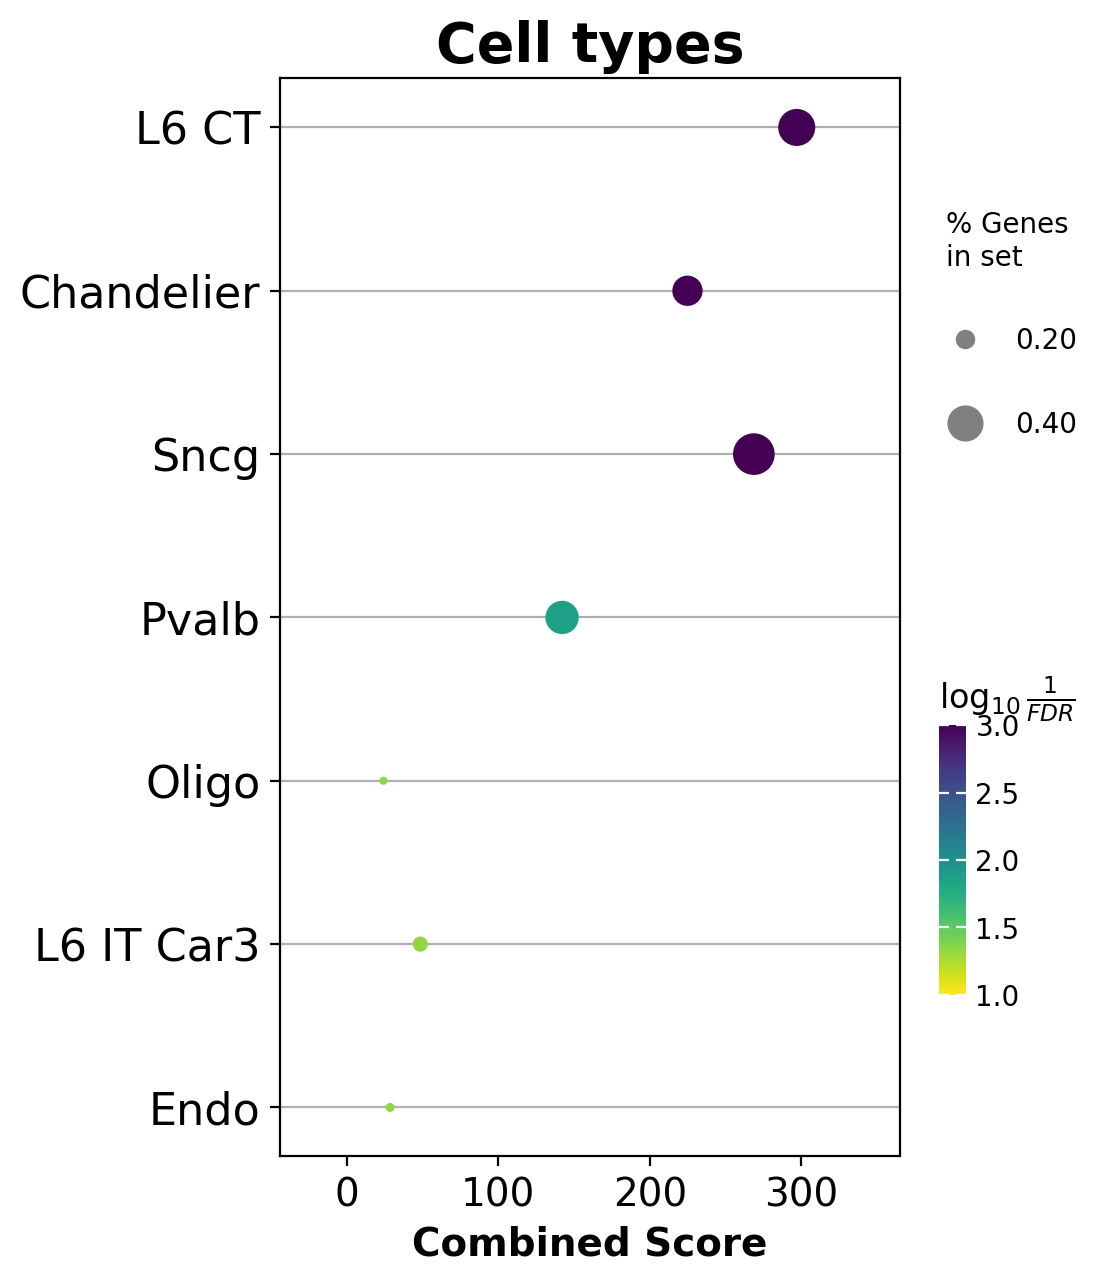

In [86]:
gseapy.dotplot(results, title='Cell types',cmap='viridis_r', size=5, figsize=(5, 7))

In [87]:
enrich_res_list = []
for label in range(n_clusters):
    try:
        enrich_res_list.append(enrich_genes(labels[labels == label].index.tolist(), cell_types_genes, label))
    except:
        print(f'No terms for label {label}')

2023-12-07 22:18:16,554 [INFO] Input dict object named with gs_ind_0
2023-12-07 22:18:16,555 [INFO] Run: gs_ind_0 
2023-12-07 22:18:16,557 [INFO] Done.
2023-12-07 22:18:16,560 [INFO] Input dict object named with gs_ind_0
2023-12-07 22:18:16,561 [INFO] Run: gs_ind_0 
2023-12-07 22:18:16,566 [INFO] Done.
2023-12-07 22:18:16,569 [INFO] Input dict object named with gs_ind_0
2023-12-07 22:18:16,571 [INFO] Run: gs_ind_0 
2023-12-07 22:18:16,576 [INFO] Done.
2023-12-07 22:18:16,578 [INFO] Input dict object named with gs_ind_0
2023-12-07 22:18:16,579 [INFO] Run: gs_ind_0 
2023-12-07 22:18:16,580 [INFO] No hits return, for gene set: Custom2267584556864
2023-12-07 22:18:16,581 [INFO] Input dict object named with gs_ind_0
2023-12-07 22:18:16,582 [INFO] Run: gs_ind_0 
2023-12-07 22:18:16,585 [INFO] Done.
2023-12-07 22:18:16,586 [INFO] Input dict object named with gs_ind_0
2023-12-07 22:18:16,587 [INFO] Run: gs_ind_0 
2023-12-07 22:18:16,595 [INFO] Done.
2023-12-07 22:18:16,596 [INFO] Input dict ob

No terms for label 3
No terms for label 6


In [88]:
#enrich_res_list = [enrich_genes(labels[labels == label].index.tolist(), cell_types_genes, label) for label in range(n_clusters)]
enrich_res = pd.concat(enrich_res_list)
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

Gene_set Overlap   P-value  Adjusted P-value  Odds Ratio  \
Term                                                                   
L2/3 IT     gs_ind_0     1/6  0.008877          0.008877  165.676923   
Chandelier  gs_ind_0    1/11  0.018232          0.018232   82.549872   
Chandelier  gs_ind_0    1/11  0.042070          0.063105   34.227996   
Endo        gs_ind_0    1/28  0.103789          0.103789   13.767651   
Pvalb       gs_ind_0     1/5  0.019336          0.058009   71.647450   

            Combined Score  Genes  cluster_label  num_overlap_genes  
Term                                                                 
L2/3 IT         782.715351   ENC1              0                  1  
Chandelier      330.579378  NCAM2              1                  1  
Chandelier      108.448493  NRXN1              2                  1  
Endo             31.189193  FOXP1              2                  1  
Pvalb           282.703944  NRXN1              2                  1

In [89]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05)].index.unique()
terms.size

14

In [90]:
from pandas.api.types import CategoricalDtype
enrich_res_plot = enrich_res.loc[terms].copy()
cat_type = CategoricalDtype(categories=['No significance', 'p < 0.05', 'p < 0.01', 'p < 0.001'], ordered=True)
enrich_res_plot['p-value'] = enrich_res_plot['Adjusted P-value'].apply(p_val_group).astype(cat_type)
enrich_results.append(enrich_res_plot)

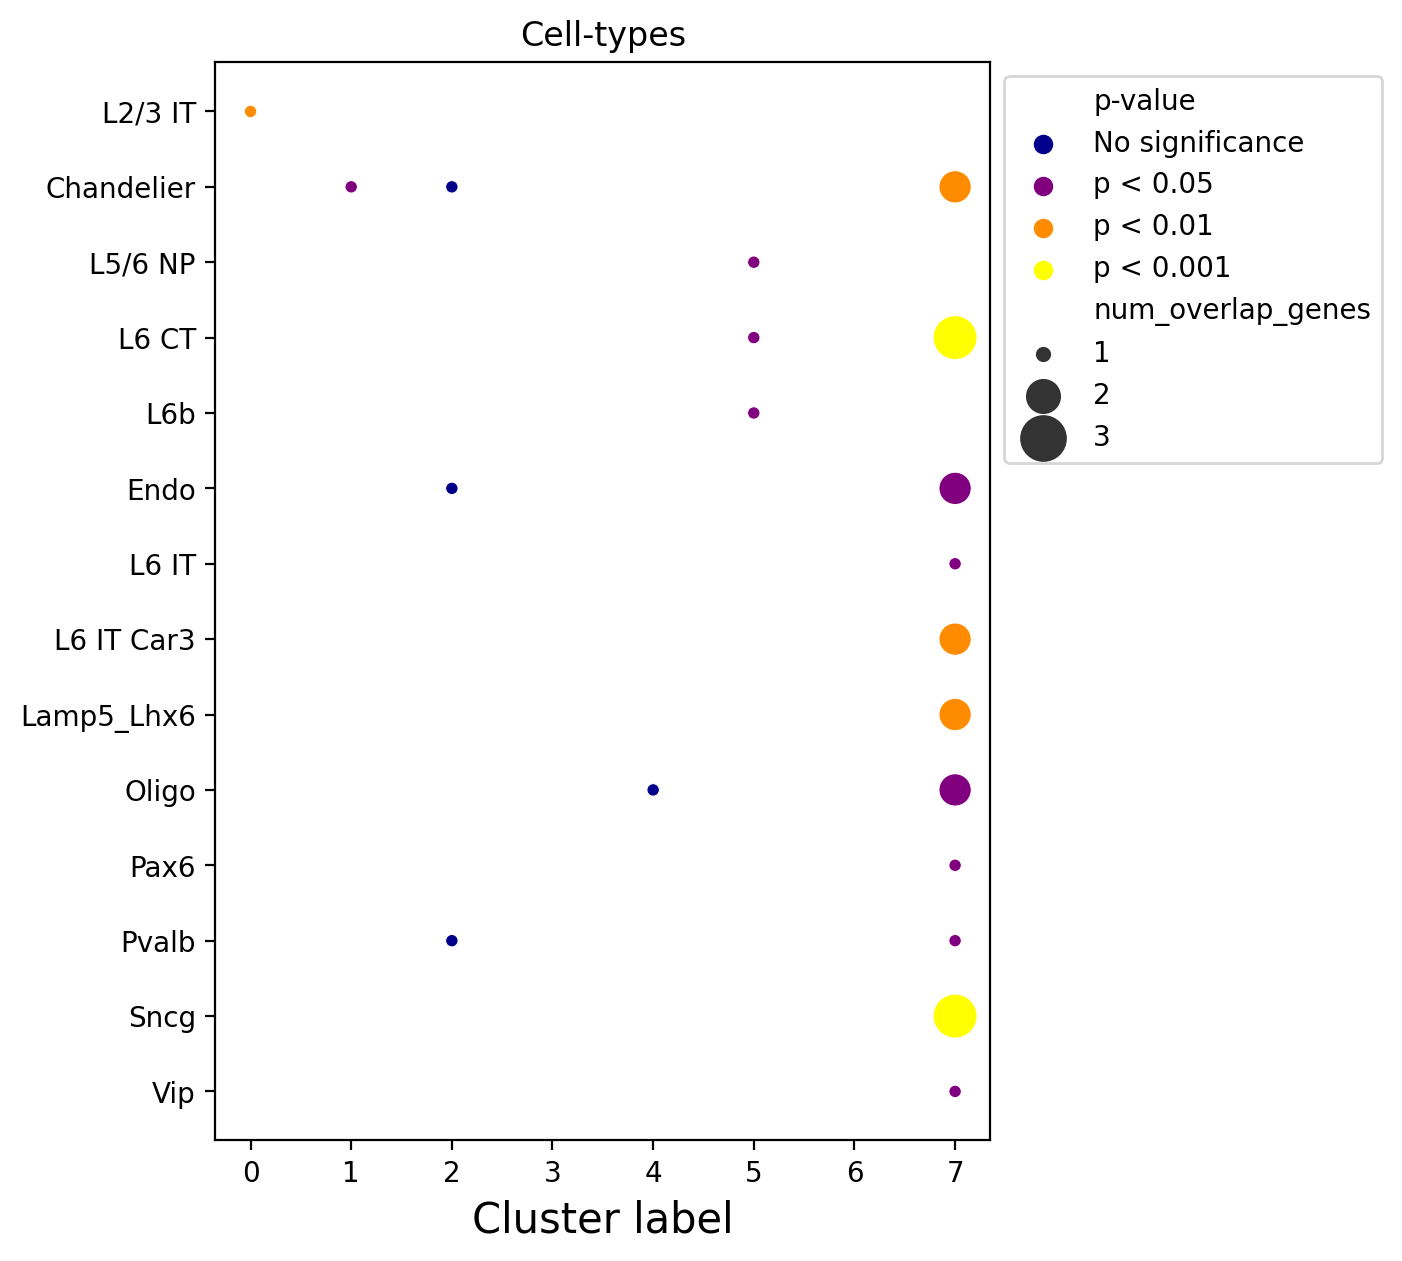

In [91]:
mpl.rcdefaults()
fig = plt.figure(figsize=(5, 7), dpi=100)

ax = sns.scatterplot(
    data=enrich_res_plot.reset_index(),
    x='cluster_label',
    y='Term',
    size='num_overlap_genes',
    sizes=(20, 250),
    hue='p-value',
    palette=color_discrete_map
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
ax.set_title('Cell-types')

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [92]:
enrich_res[(enrich_res['Adjusted P-value'] < 0.05) & (enrich_res.cluster_label == 7)]

Gene_set Overlap       P-value  Adjusted P-value  Odds Ratio  \
Term                                                                       
Chandelier  gs_ind_0    2/11  7.052438e-04          0.002468   63.213866   
Endo        gs_ind_0    2/28  4.667096e-03          0.010890   25.426743   
L6 CT       gs_ind_0     3/9  3.619398e-06          0.000025  113.294737   
L6 IT       gs_ind_0     1/4  1.476398e-02          0.025837   92.076923   
L6 IT Car3  gs_ind_0    2/11  7.052438e-04          0.002468   63.213866   
Lamp5_Lhx6  gs_ind_0    2/18  1.931529e-03          0.005408   39.243974   
Oligo       gs_ind_0    2/31  5.703142e-03          0.011406   22.992278   
Pax6        gs_ind_0     1/6  2.206809e-02          0.030895   63.721893   
Pvalb       gs_ind_0     1/5  1.842249e-02          0.028657   75.321678   
Sncg        gs_ind_0     3/6  8.679091e-07          0.000012  165.676923   
Vip         gs_ind_0     1/8  2.932073e-02          0.037317   48.710407   

            Combined Score                Genes  cluster_label  \
Term                                                             
Chandelier      458.740936          DCLK1;RALYL              7   
Endo            136.470877         DCLK1;USP6NL              7   
L6 CT          1419.492739  RALYL;PDE1A;KHDRBS3              7   
L6 IT           388.156234                PTPRK              7   
L6 IT Car3      458.740936        PDE1A;TMEM108              7   
Lamp5_Lhx6      245.252987        KHDRBS3;PCDH9              7   
Oligo           118.795079          PTPRK;ALCAM              7   
Pax6            243.011261              KHDRBS3              7   
Pvalb           300.848580                RALYL              7   
Sncg           2312.382440  RALYL;KHDRBS3;PCDH9              7   
Vip             171.921454                RALYL              7   

            num_overlap_genes  
Term                           
Chandelier                  2  
Endo                        2  
L6 CT                       3  
L6 IT                       1  
L6 IT Car3                  2  
Lamp5_Lhx6                  2  
Oligo                       2  
Pax6                        1  
Pvalb                       1  
Sncg                        3  
Vip                         1

## Reactome_2022

In [93]:
db_name = 'Reactome_2022'
GeneCluster.enrich_geneclusters(gene_clust, db_name)

In [94]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

Rank     p-val     Z-score  \
Term                                                                       
Striated Muscle Contraction R-HSA-390522         1  0.010349  128.000000   
Cohesin Loading Onto Chromatin R-HSA-2470946     2  0.013289   95.964286   
Mitotic Telophase/Cytokinesis R-HSA-68884        3  0.013289   95.964286   
Protein Methylation R-HSA-8876725                4  0.016221   76.742857   
Metabolism Of Non-Coding RNA R-HSA-194441        5  0.036532   31.892857   

                                              Combined score  \
Term                                                           
Striated Muscle Contraction R-HSA-390522          585.069605   
Cohesin Loading Onto Chromatin R-HSA-2470946      414.646268   
Mitotic Telophase/Cytokinesis R-HSA-68884         414.646268   
Protein Methylation R-HSA-8876725                 316.293098   
Metabolism Of Non-Coding RNA R-HSA-194441         105.551467   

                                             Overlapping genes  \
Term                                                             
Striated Muscle Contraction R-HSA-390522               [TMOD1]   
Cohesin Loading Onto Chromatin R-HSA-2470946            [MAU2]   
Mitotic Telophase/Cytokinesis R-HSA-68884               [MAU2]   
Protein Methylation R-HSA-8876725                       [ETFB]   
Metabolism Of Non-Coding RNA R-HSA-194441             [SNRPD2]   

                                              Adjusted P-value  Old p-value  \
Term                                                                          
Striated Muscle Contraction R-HSA-390522              0.158152            0   
Cohesin Loading Onto Chromatin R-HSA-2470946          0.158152            0   
Mitotic Telophase/Cytokinesis R-HSA-68884             0.158152            0   
Protein Methylation R-HSA-8876725                     0.158152            0   
Metabolism Of Non-Coding RNA R-HSA-194441             0.207883            0   

                                              Old adjusted p-value  \
Term                                                                 
Striated Muscle Contraction R-HSA-390522                         0   
Cohesin Loading Onto Chromatin R-HSA-2470946                     0   
Mitotic Telophase/Cytokinesis R-HSA-68884                        0   
Protein Methylation R-HSA-8876725                                0   
Metabolism Of Non-Coding RNA R-HSA-194441                        0   

                                              num_overlap_genes  \
Term                                                              
Striated Muscle Contraction R-HSA-390522                      1   
Cohesin Loading Onto Chromatin R-HSA-2470946                  1   
Mitotic Telophase/Cytokinesis R-HSA-68884                     1   
Protein Methylation R-HSA-8876725                             1   
Metabolism Of Non-Coding RNA R-HSA-194441                     1   

                                              neg_log10(p_adj)  cluster_label  
Term                                                                           
Striated Muscle Contraction R-HSA-390522              0.800925              0  
Cohesin Loading Onto Chromatin R-HSA-2470946          0.800925              0  
Mitotic Telophase/Cytokinesis R-HSA-68884             0.800925              0  
Protein Methylation R-HSA-8876725                     0.800925              0  
Metabolism Of Non-Coding RNA R-HSA-194441             0.682181              0

In [95]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05)].index.unique()
terms.size

2

In [96]:
from pandas.api.types import CategoricalDtype
enrich_res_plot = enrich_res.loc[terms].copy()
cat_type = CategoricalDtype(categories=['No significance', 'p < 0.05', 'p < 0.01', 'p < 0.001'], ordered=True)
enrich_res_plot['p-value'] = enrich_res_plot['Adjusted P-value'].apply(p_val_group).astype(cat_type)
enrich_results.append(enrich_res_plot)

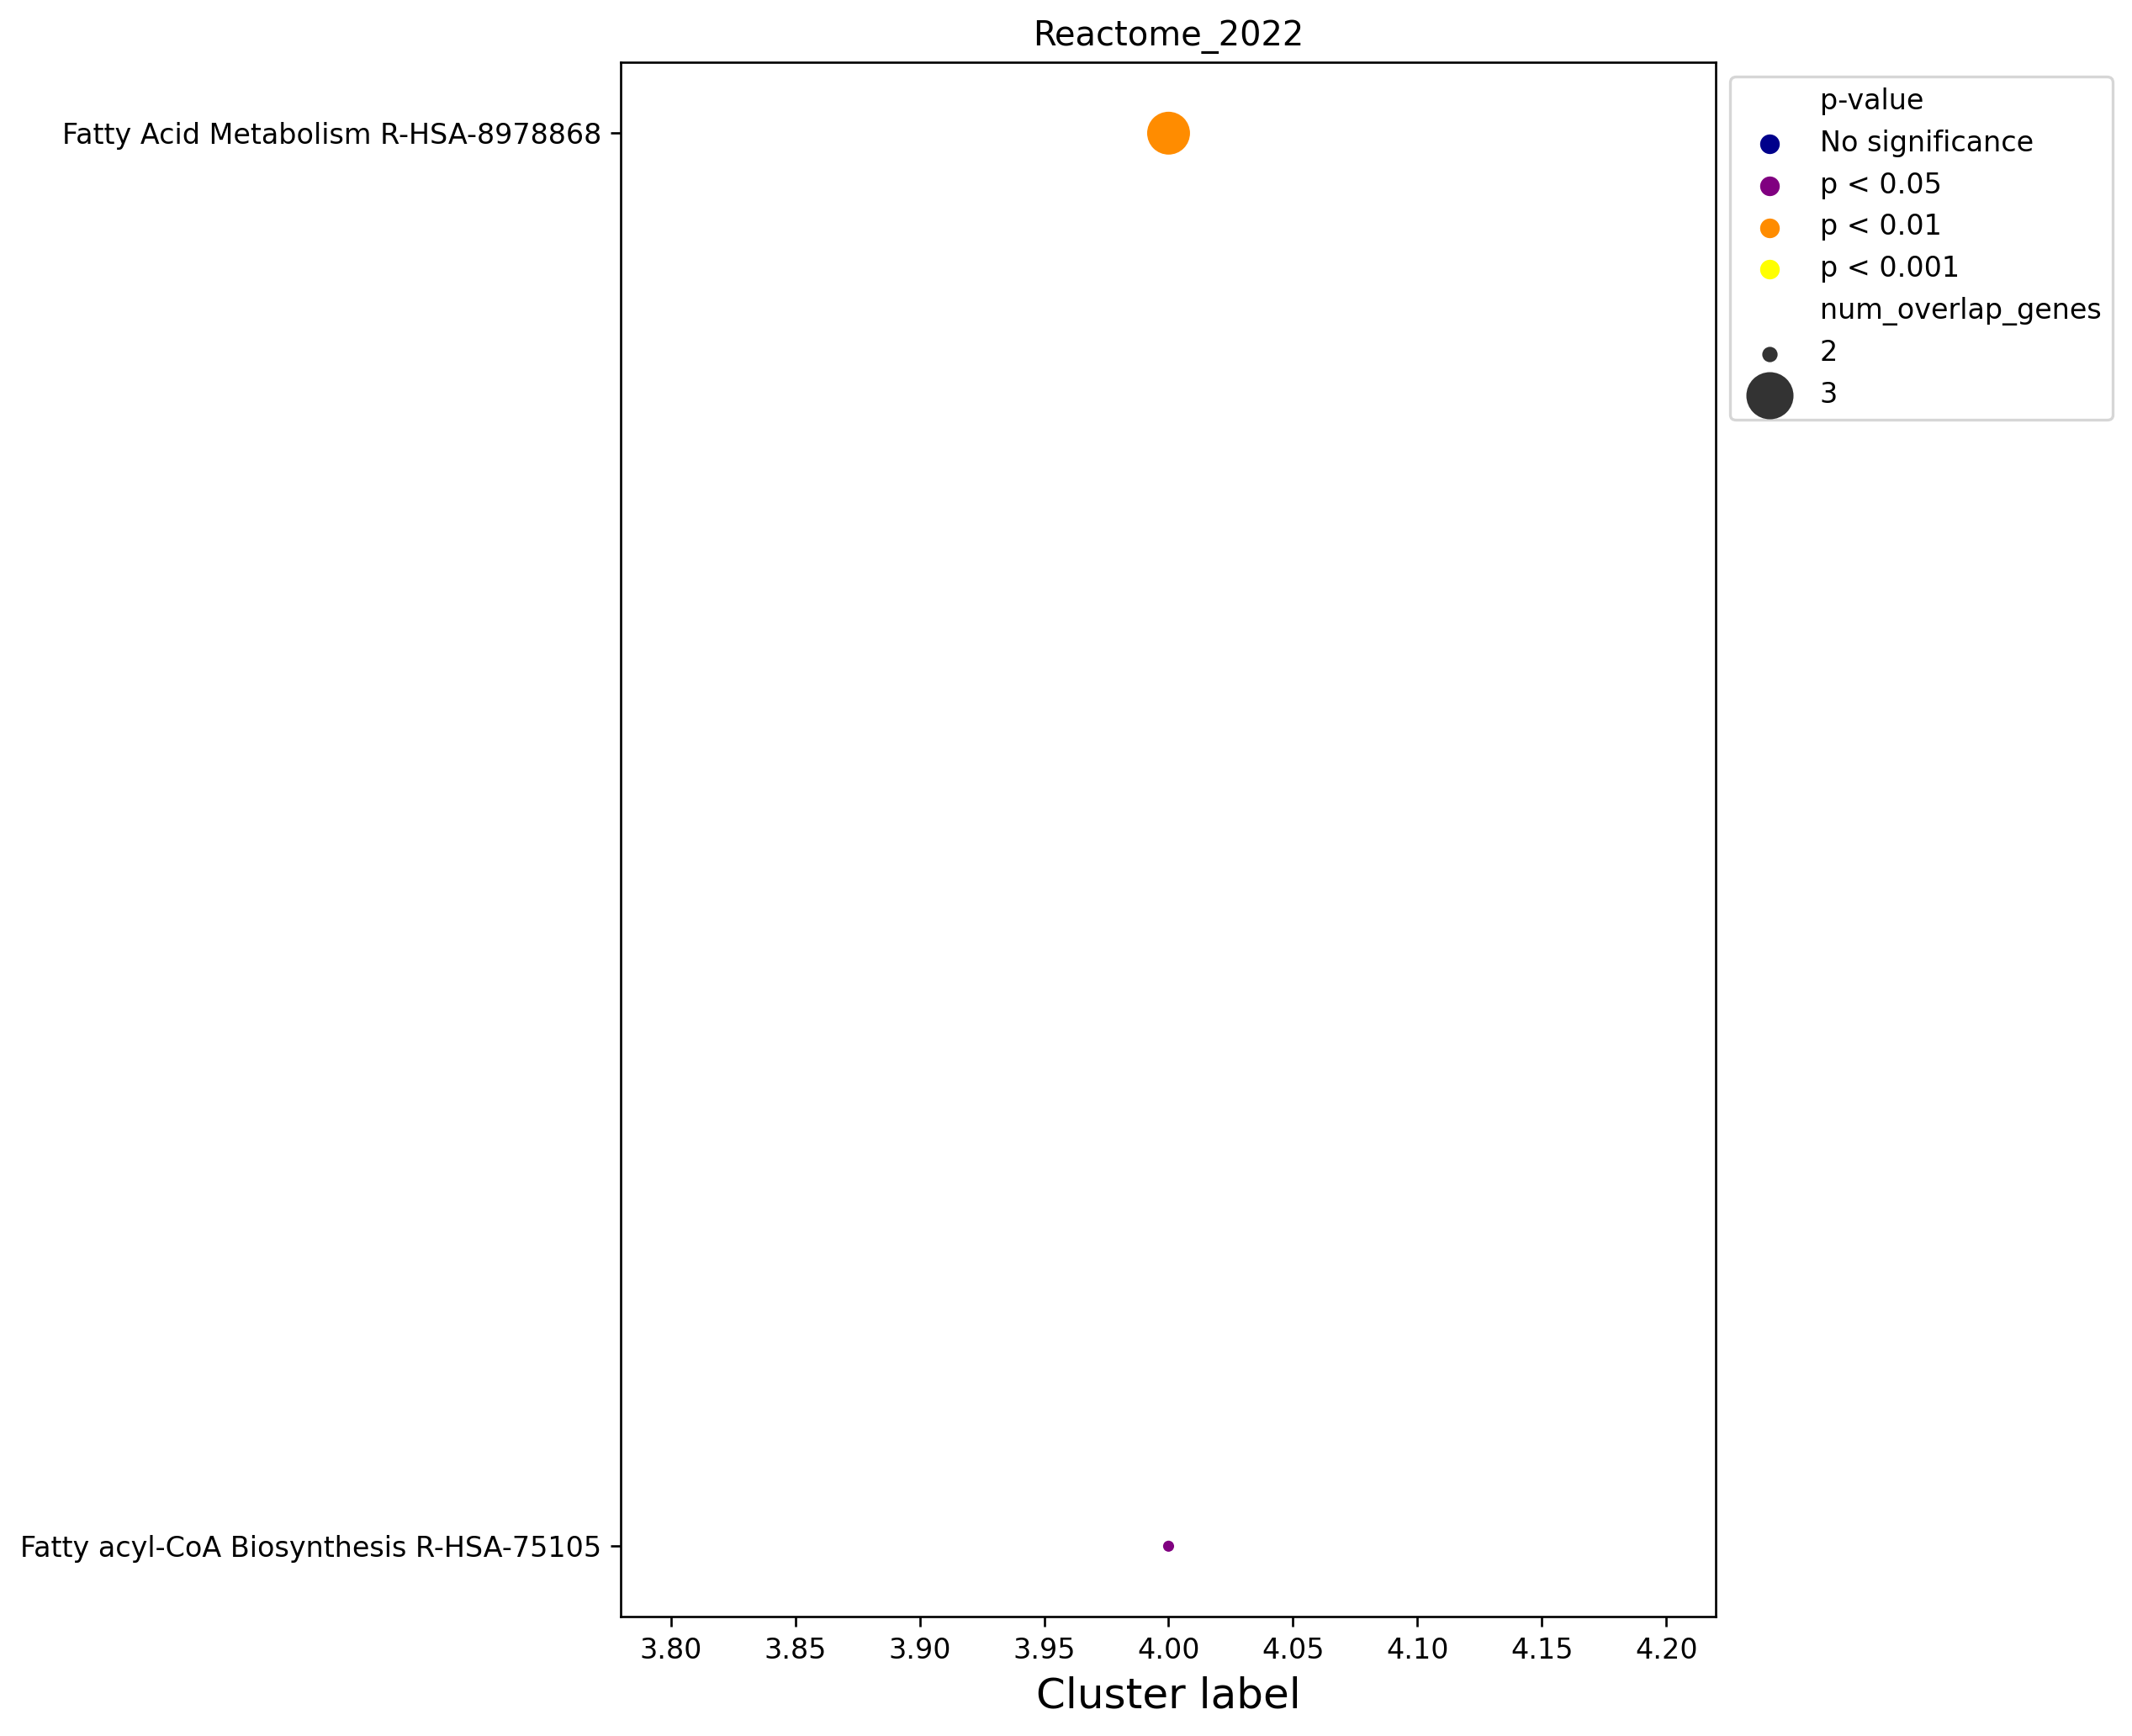

In [97]:
fig = plt.figure(figsize=(7, 10), dpi=120)

ax = sns.scatterplot(
    data=enrich_res_plot.reset_index(),
    x='cluster_label',
    y='Term',
    size='num_overlap_genes',
    sizes=(20, 250),
    hue='p-value',
    palette=color_discrete_map
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## SynGO_2022

In [98]:
db_name = 'SynGO_2022'
GeneCluster.enrich_geneclusters(gene_clust, db_name)

In [99]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

Rank     p-val     Z-score  \
Term                                                                            
Spine Apparatus (GO:0097444) CC                       1  0.001670         inf   
Synapse Assembly (GO:0007416) BP                      1  0.003896         inf   
Integral Component Of Presynaptic Membrane (GO:...    2  0.008411   16.517028   
Maintenance Of Postsynaptic Specialization Stru...    3  0.011645  134.175000   
Regulation Of Postsynaptic Specialization Assem...    4  0.011645  134.175000   

                                                    Combined score  \
Term                                                                 
Spine Apparatus (GO:0097444) CC                                inf   
Synapse Assembly (GO:0007416) BP                               inf   
Integral Component Of Presynaptic Membrane (GO:...       78.922790   
Maintenance Of Postsynaptic Specialization Stru...      597.466427   
Regulation Of Postsynaptic Specialization Assem...      597.466427   

                                                   Overlapping genes  \
Term                                                                   
Spine Apparatus (GO:0097444) CC                              [APLP2]   
Synapse Assembly (GO:0007416) BP                             [NRXN1]   
Integral Component Of Presynaptic Membrane (GO:...    [CADM3, NRXN1]   
Maintenance Of Postsynaptic Specialization Stru...         [SYNGAP1]   
Regulation Of Postsynaptic Specialization Assem...           [NRXN1]   

                                                    Adjusted P-value  \
Term                                                                   
Spine Apparatus (GO:0097444) CC                             0.001670   
Synapse Assembly (GO:0007416) BP                            0.049491   
Integral Component Of Presynaptic Membrane (GO:...          0.049491   
Maintenance Of Postsynaptic Specialization Stru...          0.049491   
Regulation Of Postsynaptic Specialization Assem...          0.049491   

                                                   Old p-value  \
Term                                                             
Spine Apparatus (GO:0097444) CC                              0   
Synapse Assembly (GO:0007416) BP                             0   
Integral Component Of Presynaptic Membrane (GO:...           0   
Maintenance Of Postsynaptic Specialization Stru...           0   
Regulation Of Postsynaptic Specialization Assem...           0   

                                                   Old adjusted p-value  \
Term                                                                      
Spine Apparatus (GO:0097444) CC                                       0   
Synapse Assembly (GO:0007416) BP                                      0   
Integral Component Of Presynaptic Membrane (GO:...                    0   
Maintenance Of Postsynaptic Specialization Stru...                    0   
Regulation Of Postsynaptic Specialization Assem...                    0   

                                                   num_overlap_genes  \
Term                                                                   
Spine Apparatus (GO:0097444) CC                                    1   
Synapse Assembly (GO:0007416) BP                                   1   
Integral Component Of Presynaptic Membrane (GO:...                 2   
Maintenance Of Postsynaptic Specialization Stru...                 1   
Regulation Of Postsynaptic Specialization Assem...                 1   

                                                    neg_log10(p_adj)  \
Term                                                                   
Spine Apparatus (GO:0097444) CC                             2.777355   
Synapse Assembly (GO:0007416) BP                            1.305476   
Integral Component Of Presynaptic Membrane (GO:...          1.305476   
Maintenance Of Postsynaptic Specialization Stru...          1.305476   
Regulation Of Postsynaptic Specialization Assem...      

In [100]:
enrich_res[enrich_res.cluster_label == 2]

Rank     p-val     Z-score  \
Term                                                                            
Synapse Assembly (GO:0007416) BP                      1  0.003896         inf   
Integral Component Of Presynaptic Membrane (GO:...    2  0.008411   16.517028   
Maintenance Of Postsynaptic Specialization Stru...    3  0.011645  134.175000   
Regulation Of Postsynaptic Specialization Assem...    4  0.011645  134.175000   
Presynapse Assembly (GO:0099054) BP                   5  0.023161   53.640000   
Regulation Of Postsynaptic Density Assembly (GO...    6  0.026971   44.691667   
Regulation Of Postsynaptic Neurotransmitter Rec...    7  0.030767   38.300000   
Regulation Of Postsynaptic Neurotransmitter Rec...    8  0.038316   29.777778   
Synapse Adhesion Between Pre- And Post-Synapse ...    9  0.042070   26.795000   
Regulation Of Presynapse Assembly (GO:1905606) BP    10  0.042070   26.795000   
Postsynapse (GO:0098794) CC                          11  0.044346    6.543653   
Integral Component Of Presynaptic Active Zone M...   12  0.049536   22.320833   
Regulation Of Synaptic Vesicle Cycle (GO:009869...   13  0.053248   20.600000   
Postsynaptic Actin Cytoskeleton Organization (G...   14  0.056946   19.125000   
Postsynaptic Density, Intracellular Component (...   15  0.078848   13.372500   
Modulation Of Chemical Synaptic Transmission (G...   16  0.151753    6.497561   
Postsynaptic Density (GO:0014069) CC                 17  0.197267    4.830909   

                                                    Combined score  \
Term                                                                 
Synapse Assembly (GO:0007416) BP                               inf   
Integral Component Of Presynaptic Membrane (GO:...       78.922790   
Maintenance Of Postsynaptic Specialization Stru...      597.466427   
Regulation Of Postsynaptic Specialization Assem...      597.466427   
Presynapse Assembly (GO:0099054) BP                     201.970872   
Regulation Of Postsynaptic Density Assembly (GO...      161.471211   
Regulation Of Postsynaptic Neurotransmitter Rec...      133.334744   
Regulation Of Postsynaptic Neurotransmitter Rec...       97.131584   
Synapse Adhesion Between Pre- And Post-Synapse ...       84.897818   
Regulation Of Presynapse Assembly (GO:1905606) BP        84.897818   
Postsynapse (GO:0098794) CC                              20.388347   
Integral Component Of Presynaptic Active Zone M...       67.075464   
Regulation Of Synaptic Vesicle Cycle (GO:009869...       60.415659   
Postsynaptic Actin Cytoskeleton Organization (G...       54.805581   
Postsynaptic Density, Intracellular Component (...       33.969235   
Modulation Of Chemical Synaptic Transmission (G...       12.251153   
Postsynaptic Density (GO:0014069) CC                      7.841526   

                                                   Overlapping genes  \
Term                                                                   
Synapse Assembly (GO:0007416) BP                             [NRXN1]   
Integral Component Of Presynaptic Membrane (GO:...    [CADM3, NRXN1]   
Maintenance Of Postsynaptic Specialization Stru...         [SYNGAP1]   
Regulation Of Postsynaptic Specialization Assem...           [NRXN1]   
Presynapse Assembly (GO:0099054) BP                          [NRXN1]   
Regulation Of Postsynaptic Density Assembly (GO...           [NRXN1]   
Regulation Of Postsynaptic Neurotransmitter Rec...           [NRXN2]   
Regulation Of Postsynaptic Neurotransmitter Rec...           [ATAD1]   
Synapse Adhesion Between Pre- And Post-Synapse ...           [NRXN1]   
Regulation Of Presynapse Assembly (GO:1905606) BP            [NRXN1]   
Postsynapse (GO:0098794) CC                          [ATAD1, DYNLL2]   
Integral Component Of Presynaptic Active Zone M...           [NRXN1]   
Regulation Of Synaptic Vesicle Cycle (GO:009869...           [NRXN1]   
Postsynaptic Actin Cytoskeleton Organization (G...           [CPNE6]   
Postsynaptic Density, Intrac

In [101]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05)].index.unique()
terms.size

14

In [102]:
from pandas.api.types import CategoricalDtype
enrich_res_plot = enrich_res.loc[terms].copy()
cat_type = CategoricalDtype(categories=['No significance', 'p < 0.05', 'p < 0.01', 'p < 0.001'], ordered=True)
enrich_res_plot['p-value'] = enrich_res_plot['Adjusted P-value'].apply(p_val_group).astype(cat_type)
enrich_results.append(enrich_res_plot)

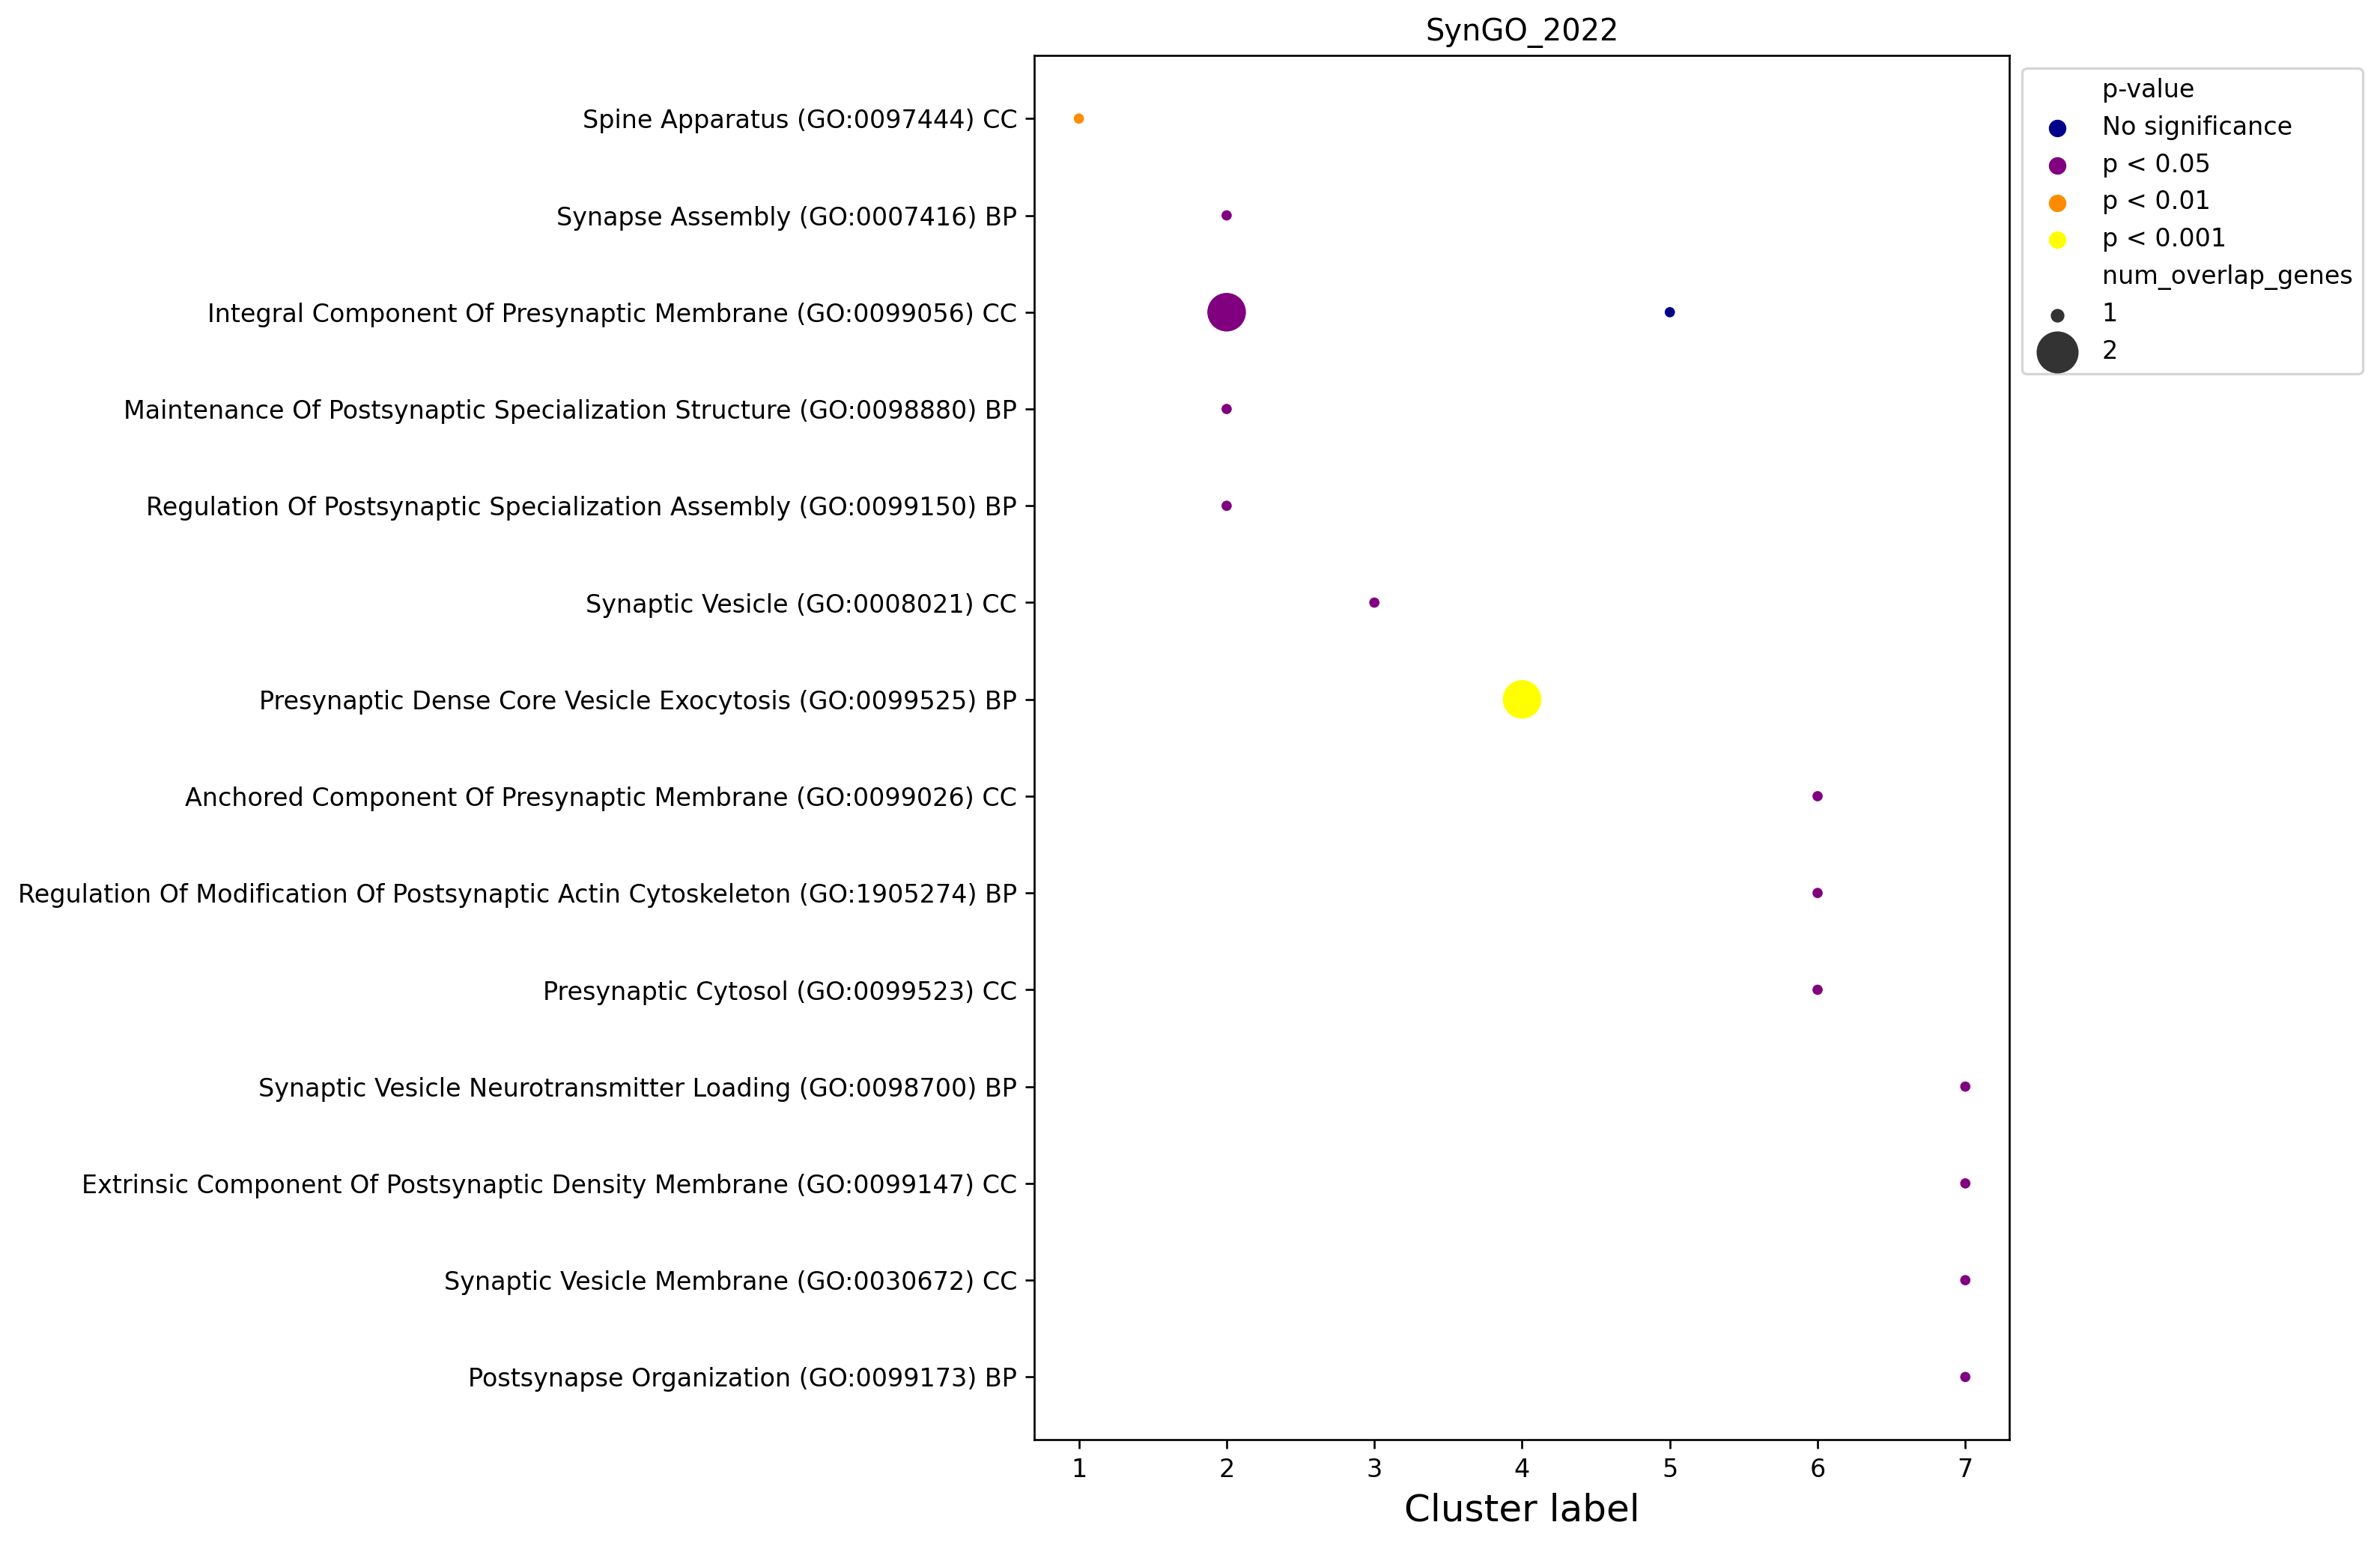

In [103]:
mpl.rcdefaults()
fig = plt.figure(figsize=(7, 10), dpi=120)

ax = sns.scatterplot(
    data=enrich_res_plot.reset_index(),
    x='cluster_label',
    y='Term',
    size='num_overlap_genes',
    sizes=(20, 250),
    hue='p-value',
    palette=color_discrete_map
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## MGI_Mammalian_Phenotype_Level_4_2021

In [104]:
db_name = 'MGI_Mammalian_Phenotype_Level_4_2021'
GeneCluster.enrich_geneclusters(gene_clust, db_name)

In [105]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

Rank     p-val  \
Term                                                                 
abnormal sarcomere morphology MP:0004090               1  0.000259   
pericardial effusion MP:0005312                        2  0.000439   
abnormal fetal atrioventricular canal morpholog...     3  0.001484   
absent myocardial trabeculae MP:0000293                4  0.004447   
abnormal fibroblast physiology MP:0020414              5  0.005925   

                                                       Z-score  \
Term                                                             
abnormal sarcomere morphology MP:0004090            119.266667   
pericardial effusion MP:0005312                      89.366667   
abnormal fetal atrioventricular canal morpholog...         inf   
absent myocardial trabeculae MP:0000293             384.285714   
abnormal fibroblast physiology MP:0020414           256.142857   

                                                    Combined score  \
Term                                                                 
abnormal sarcomere morphology MP:0004090                984.854716   
pericardial effusion MP:0005312                         690.941523   
abnormal fetal atrioventricular canal morpholog...             inf   
absent myocardial trabeculae MP:0000293                2081.122420   
abnormal fibroblast physiology MP:0020414              1313.635373   

                                                   Overlapping genes  \
Term                                                                   
abnormal sarcomere morphology MP:0004090              [TMOD1, DAAM1]   
pericardial effusion MP:0005312                       [TMOD1, DAAM1]   
abnormal fetal atrioventricular canal morpholog...           [TMOD1]   
absent myocardial trabeculae MP:0000293                      [TMOD1]   
abnormal fibroblast physiology MP:0020414                    [DAAM1]   

                                                    Adjusted P-value  \
Term                                                                   
abnormal sarcomere morphology MP:0004090                    0.012944   
pericardial effusion MP:0005312                             0.012944   
abnormal fetal atrioventricular canal morpholog...          0.029189   
absent myocardial trabeculae MP:0000293                     0.054588   
abnormal fibroblast physiology MP:0020414                   0.054588   

                                                    Old p-value  \
Term                                                              
abnormal sarcomere morphology MP:0004090                      0   
pericardial effusion MP:0005312                               0   
abnormal fetal atrioventricular canal morpholog...            0   
absent myocardial trabeculae MP:0000293                       0   
abnormal fibroblast physiology MP:0020414                     0   

                                                    Old adjusted p-value  \
Term                                                                       
abnormal sarcomere morphology MP:0004090                               0   
pericardial effusion MP:0005312                                        0   
abnormal fetal atrioventricular canal morpholog...                     0   
absent myocardial trabeculae MP:0000293                                0   
abnormal fibroblast physiology MP:0020414                              0   

                                                    num_overlap_genes  \
Term                                                                    
abnormal sarcomere morphology MP:0004090                            2   
pericardial effusion MP:0005312                                     2   
abnormal fetal atrioventricular canal morpholog...                  1   
absent myocardial trabeculae MP:0000293                             1   
abnormal fibroblast physiology MP:0020414                           1   

                                                    neg_log10(p_adj)  \
Term      

In [106]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05) & (enrich_res.Rank < 10)].index.unique()
terms.size

24

In [107]:
from pandas.api.types import CategoricalDtype
enrich_res_plot = enrich_res.loc[terms].copy()
cat_type = CategoricalDtype(categories=['No significance', 'p < 0.05', 'p < 0.01', 'p < 0.001'], ordered=True)
enrich_res_plot['p-value'] = enrich_res_plot['Adjusted P-value'].apply(p_val_group).astype(cat_type)
enrich_results.append(enrich_res_plot)

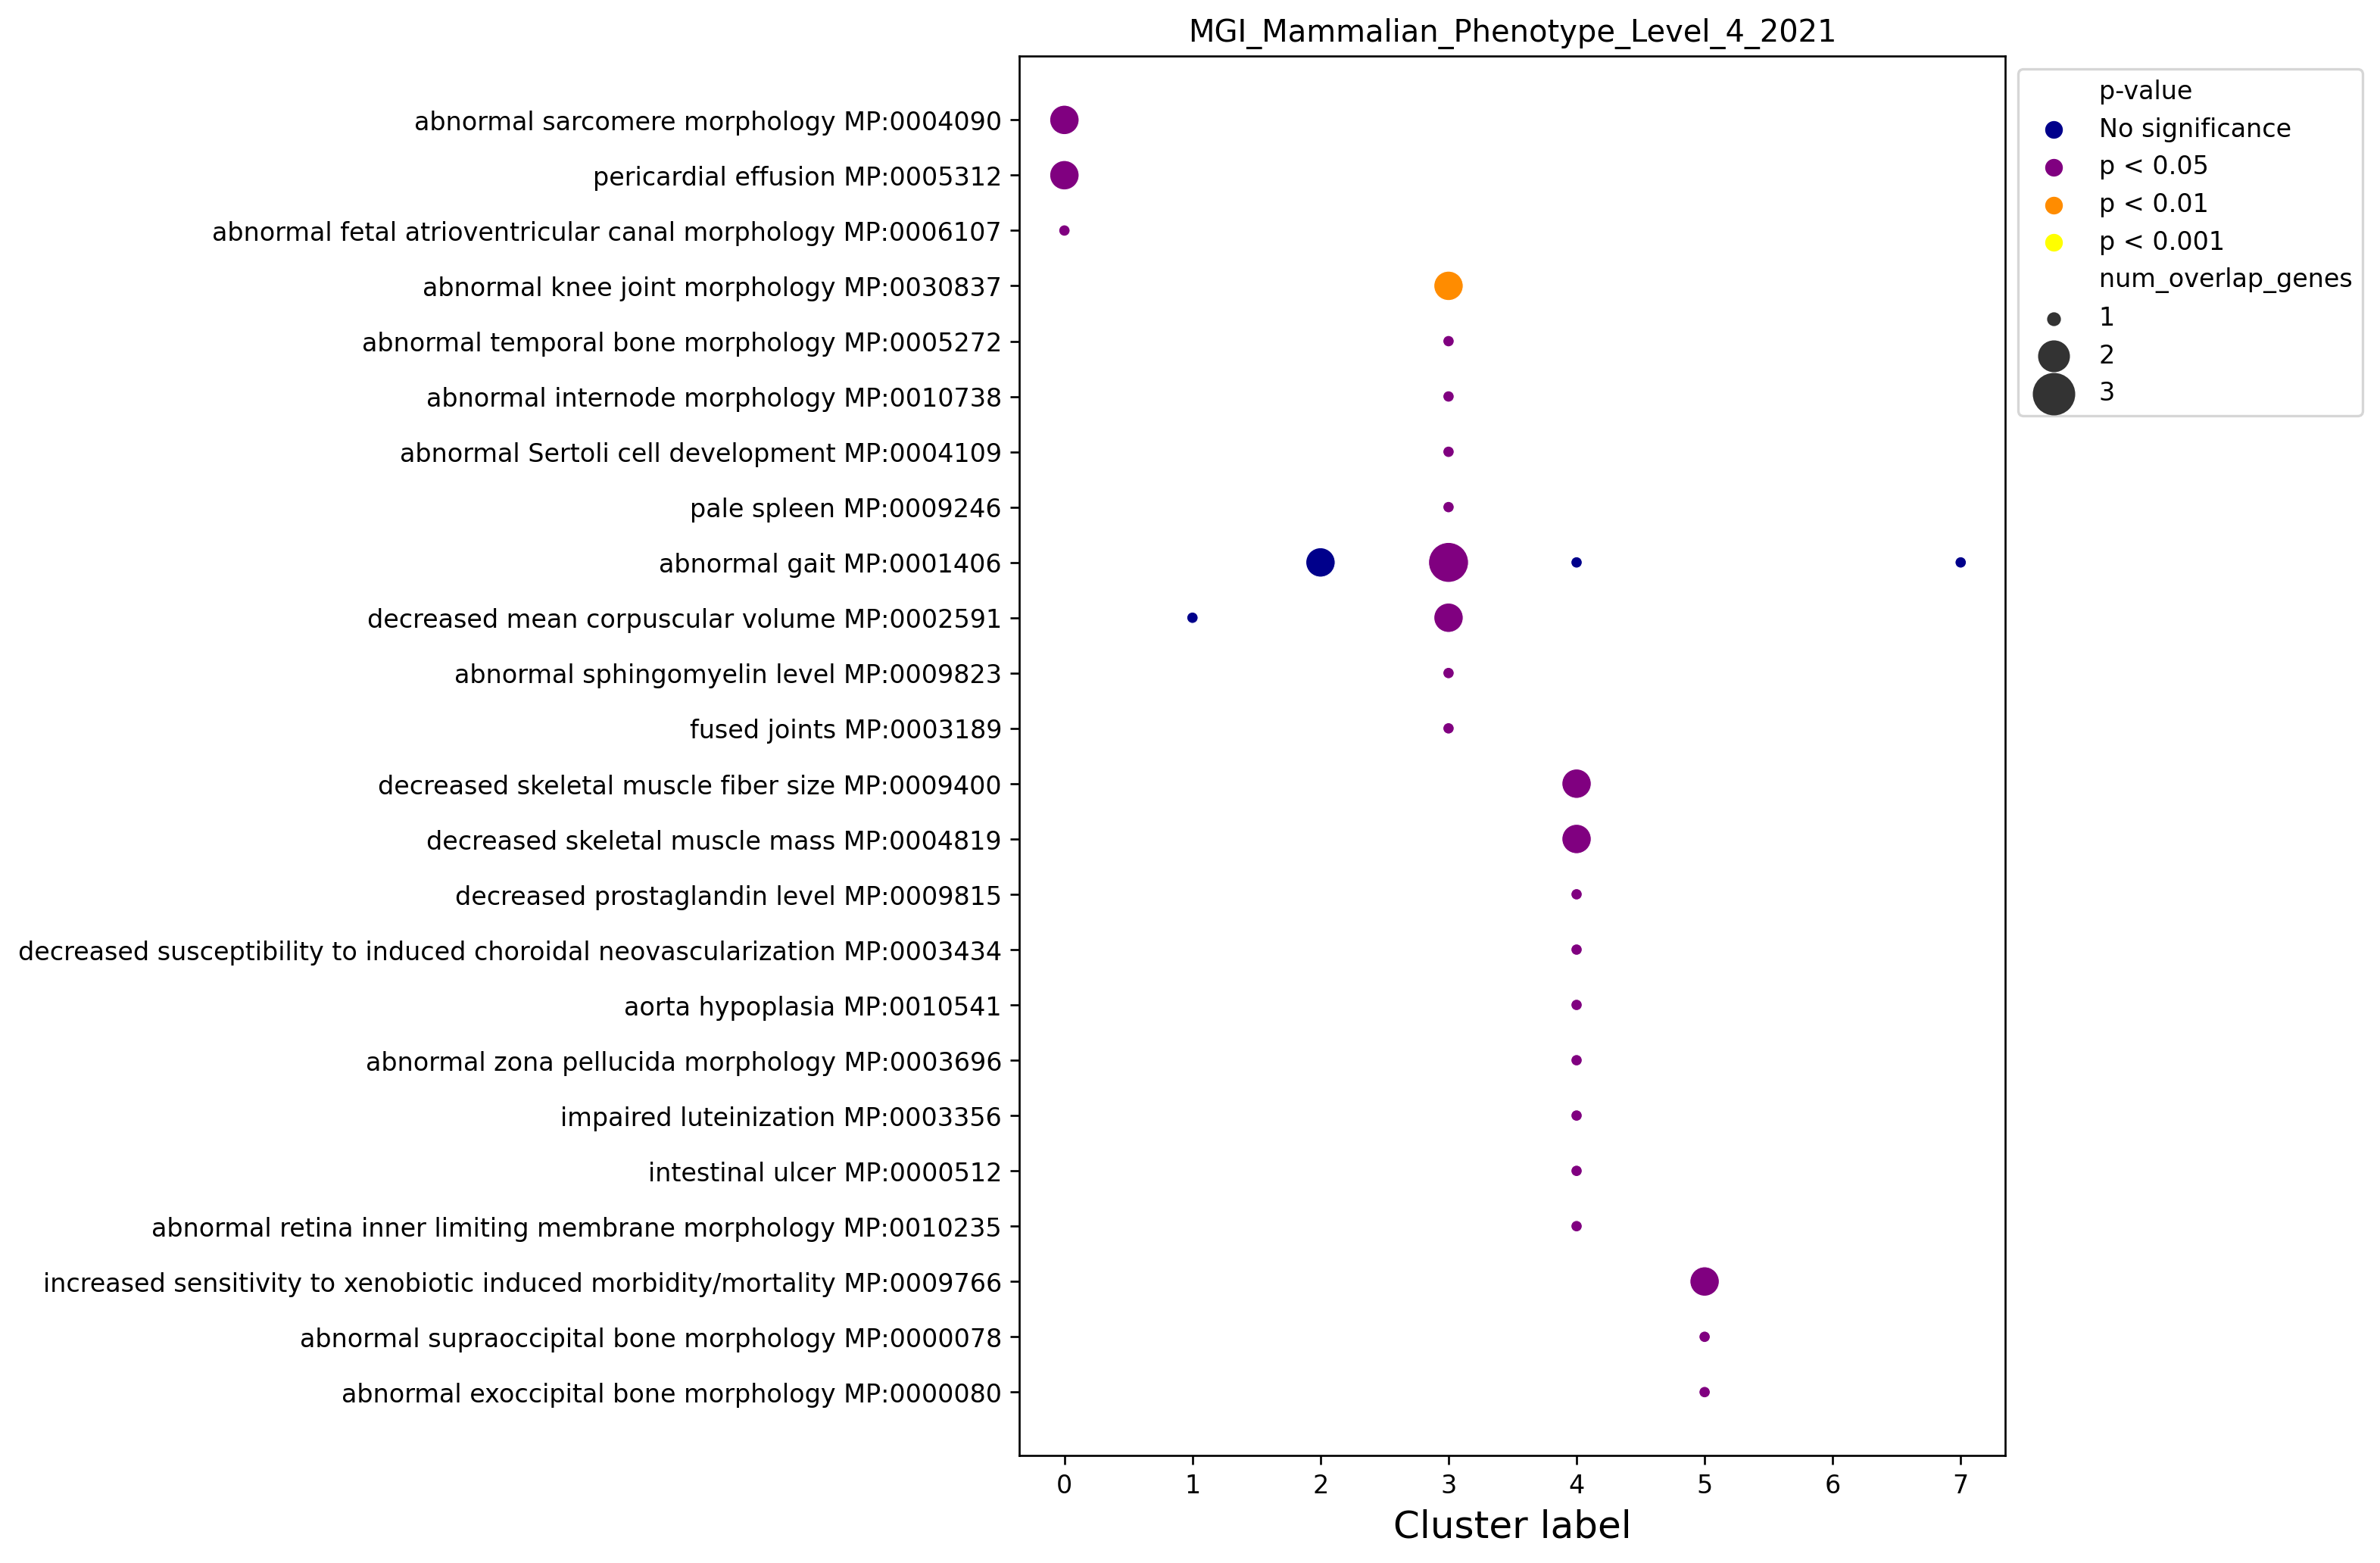

In [108]:
fig = plt.figure(figsize=(7, 10), dpi=120)

ax = sns.scatterplot(
    data=enrich_res_plot.reset_index(),
    x='cluster_label',
    y='Term',
    size='num_overlap_genes',
    sizes=(20, 250),
    hue='p-value',
    palette=color_discrete_map
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

## KEGG_2021_Human

In [109]:
db_name = 'KEGG_2021_Human'
GeneCluster.enrich_geneclusters(gene_clust, db_name)

In [110]:
enrich_res = pd.concat([gc.enrichment_res[db_name] for gc in gene_clust])
enrich_res = enrich_res.set_index(['Term'])
enrich_res.head()

Rank     p-val    Z-score  Combined score  \
Term                                                                    
Wnt signaling pathway          1  0.071891  15.548105       40.931977   
RNA transport                  2  0.124785   8.594156       17.885814   
Spliceosome                    3  0.137915   7.702624       15.259784   
Cell adhesion molecules        1  0.001274  49.308756      328.669917   
TGF-beta signaling pathway     2  0.045827  24.787037       76.415765   

                           Overlapping genes  Adjusted P-value  Old p-value  \
Term                                                                          
Wnt signaling pathway                [DAAM1]          0.137915            0   
RNA transport                        [EIF1B]          0.137915            0   
Spliceosome                         [SNRPD2]          0.137915            0   
Cell adhesion molecules      [CD99L2, NCAM2]          0.011467            0   
TGF-beta signaling pathway             [ID2]          0.103517            0   

                            Old adjusted p-value  num_overlap_genes  \
Term                                                                  
Wnt signaling pathway                          0                  1   
RNA transport                                  0                  1   
Spliceosome                                    0                  1   
Cell adhesion molecules                        0                  2   
TGF-beta signaling pathway                     0                  1   

                            neg_log10(p_adj)  cluster_label  
Term                                                         
Wnt signaling pathway               0.860387              0  
RNA transport                       0.860387              0  
Spliceosome                         0.860387              0  
Cell adhesion molecules             1.940569              1  
TGF-beta signaling pathway          0.984987              1

In [111]:
terms = enrich_res[(enrich_res['Adjusted P-value'] < 0.05)].index.unique()
terms.size

5

In [112]:
from pandas.api.types import CategoricalDtype
enrich_res_plot = enrich_res.loc[terms].copy()
cat_type = CategoricalDtype(categories=['No significance', 'p < 0.05', 'p < 0.01', 'p < 0.001'], ordered=True)
enrich_res_plot['p-value'] = enrich_res_plot['Adjusted P-value'].apply(p_val_group).astype(cat_type)
enrich_results.append(enrich_res_plot)

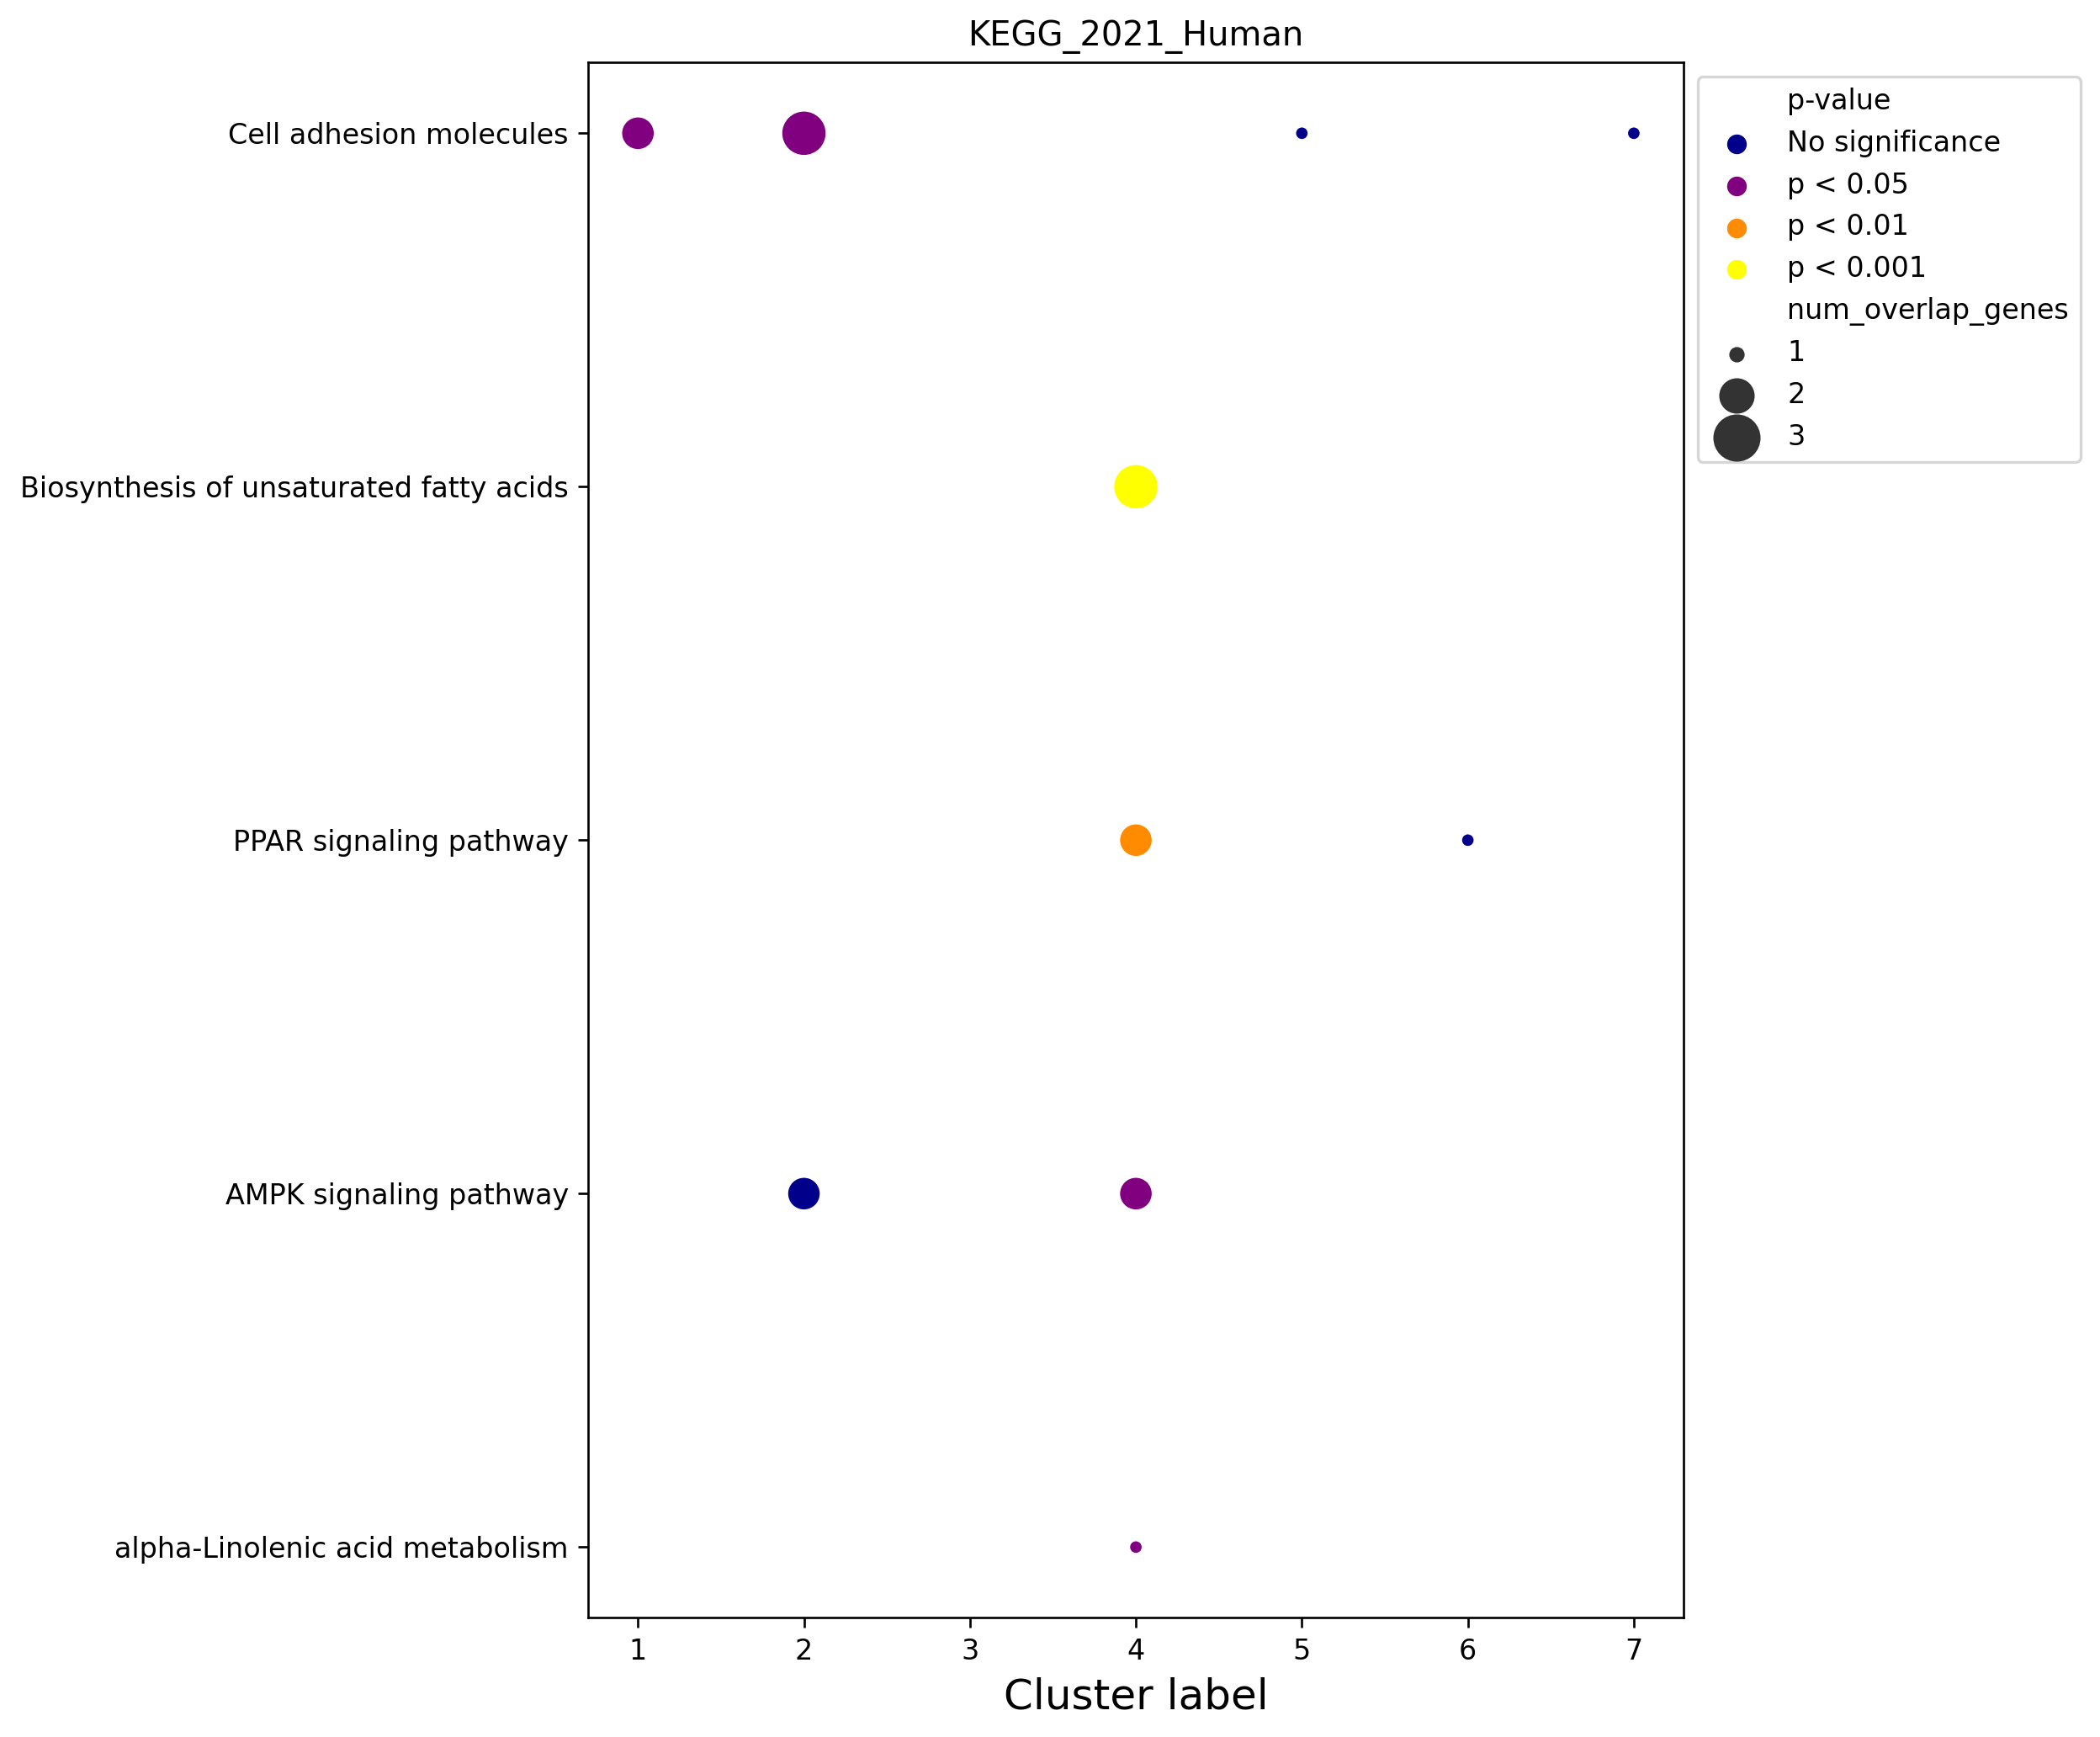

In [113]:
mpl.rcdefaults()
fig = plt.figure(figsize=(7, 10), dpi=120)

ax = sns.scatterplot(
    data=enrich_res_plot.reset_index(),
    x='cluster_label',
    y='Term',
    size='num_overlap_genes',
    sizes=(20, 250),
    hue='p-value',
    palette=color_discrete_map
)

ax.tick_params(labelsize=10)
ax.legend(fontsize=15)
ax.set_xlabel("Cluster label",fontsize=15)
ax.set_ylabel("", fontsize=10)
ax.grid(False)
ax.set_title(db_name)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))